In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#load data from the csv file into a dataframe
df = pd.read_csv("xcData.csv")

In [17]:
print(df)

           date           athlete      time gender
0    2021-08-21    Anna Mehendale  19:56.20   girl
1    2021-08-21        Mari Pizem  20:38.60   girl
2    2021-08-21       Carly Jones  21:51.20   girl
3    2021-08-21     Kendall Brown  21:57.30   girl
4    2021-08-21       Kate Butler  22:29.70   girl
...         ...               ...       ...    ...
4304 2011-11-05       Rob Scanlon  16:06.16    boy
4305 2011-11-05      David Ryland  16:11.03    boy
4306 2011-11-13       Rob Scanlon  16:38.90    boy
4307 2011-11-13      David Ryland  17:11.70    boy
4308 2011-11-13  Matthew Dietrich  17:16.30    boy

[4309 rows x 4 columns]


In [299]:
df['date']= pd.to_datetime(df['date'])

In [301]:
#convert the dates to datetime objects
def changedate(i):
    x = i.replace(" ", "/")
    x = x.replace(",", "")

    if "Aug" in x:
        x = x.replace("Aug", "8")
    elif "Sep" in x:
        x = x.replace("Sep", "9")
    elif "Oct" in x:
        x = x.replace("Oct", "10")
    elif "Nov" in x:
        x = x.replace("Nov", "11")
    return x
df["date"] = df["date"].apply(changedate)

SyntaxError: invalid syntax (Temp/ipykernel_8896/1829055116.py, line 2)

In [147]:
unique_athletes = []
for i in df["athlete"]:
    if i not in unique_athletes:
        unique_athletes.append(i)
unique_athletes.sort()

306


C:\Users\natha\AppData\Local\Temp/ipykernel_8896/1785031111.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


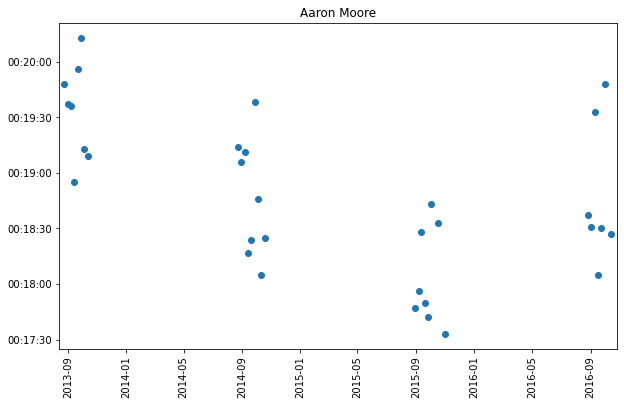

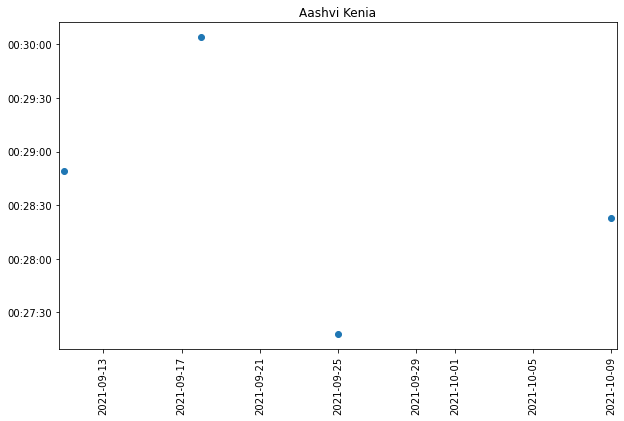

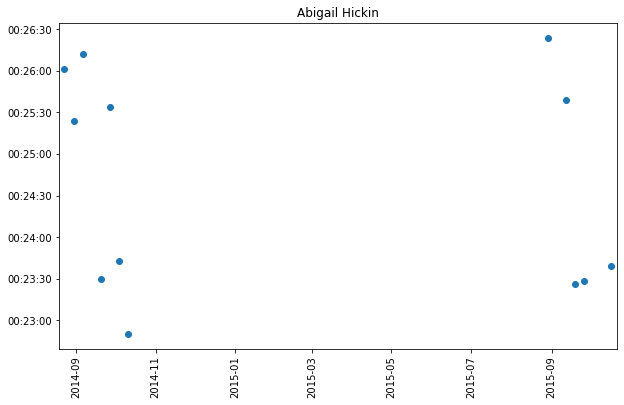

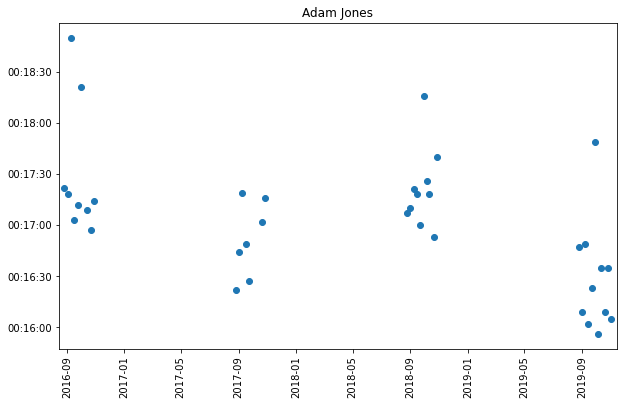

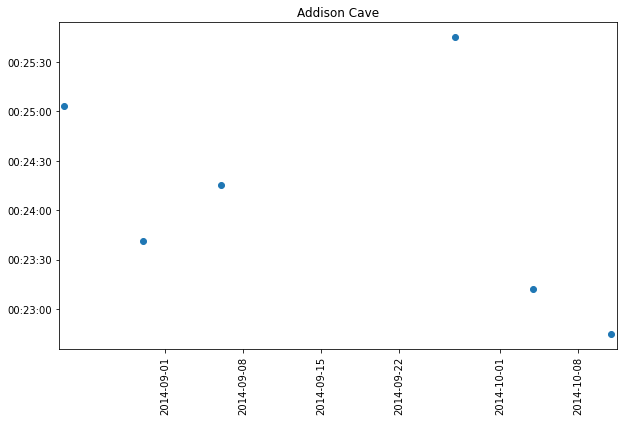

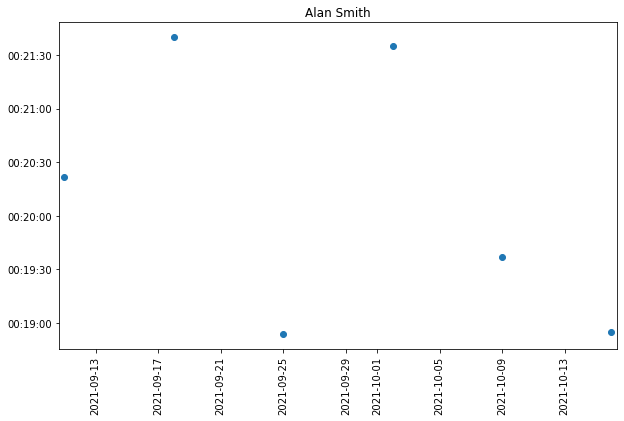

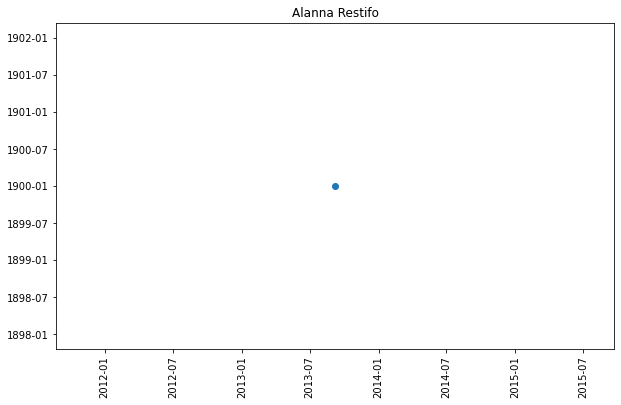

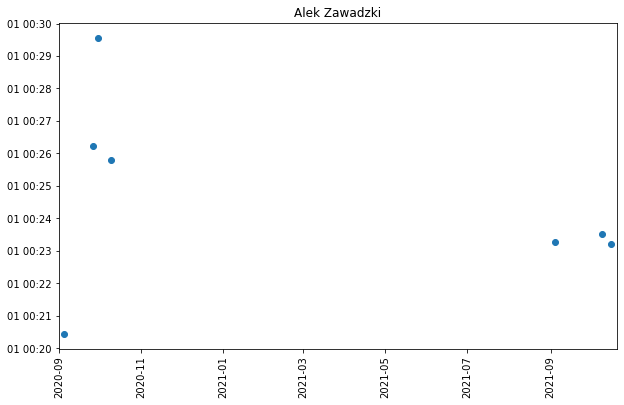

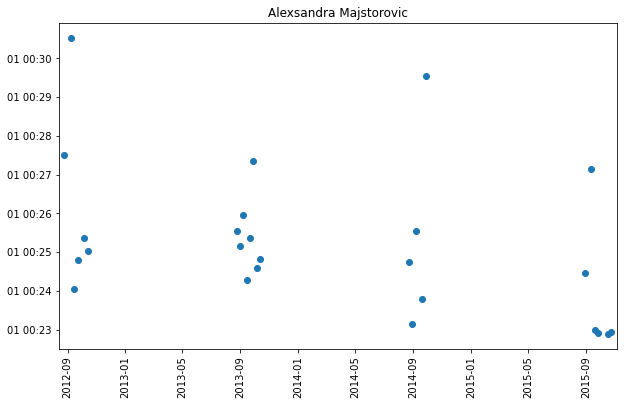

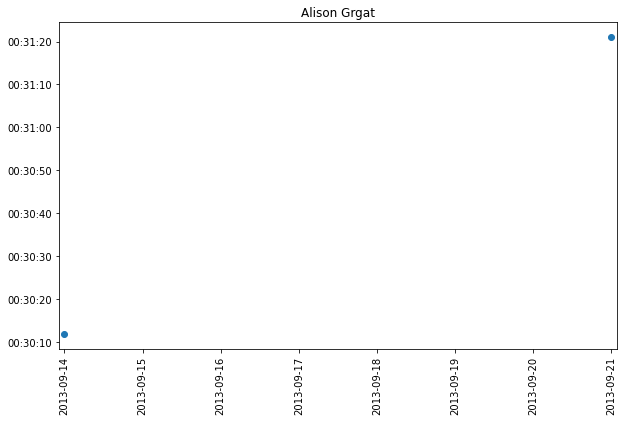

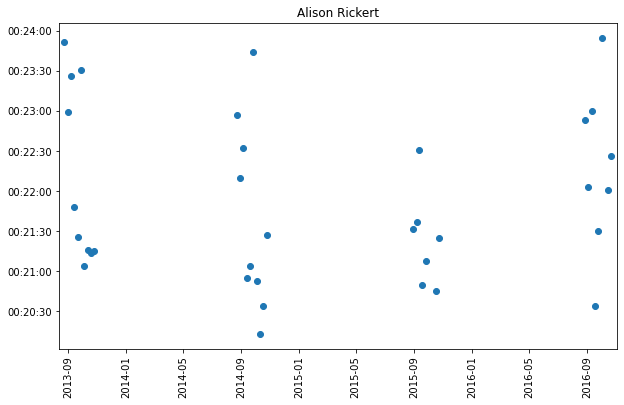

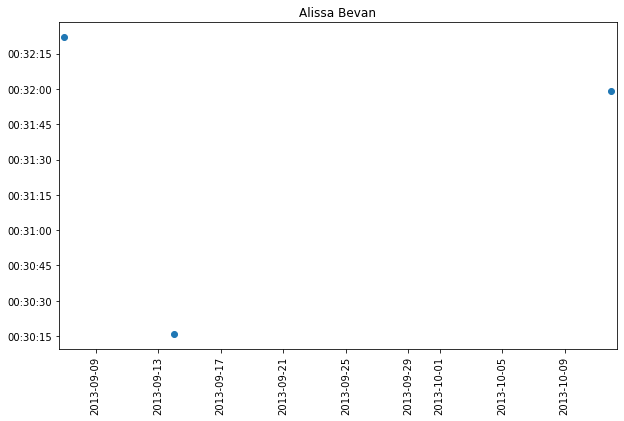

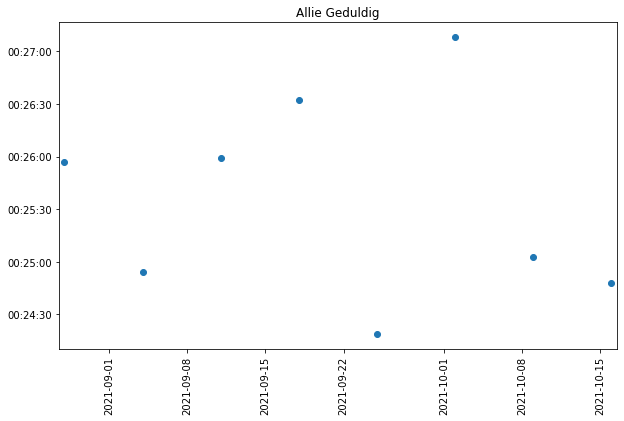

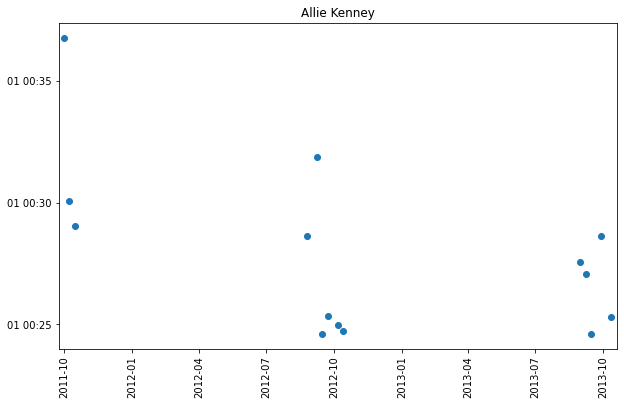

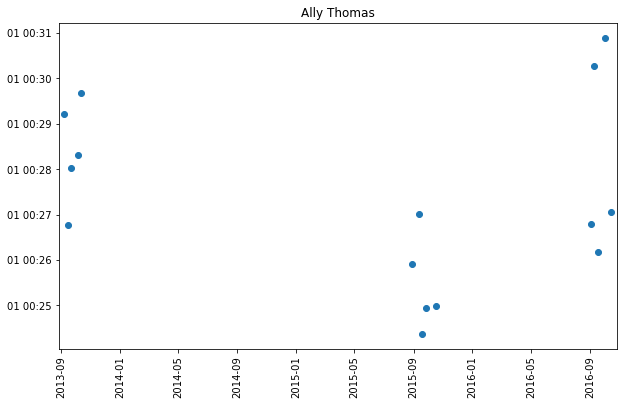

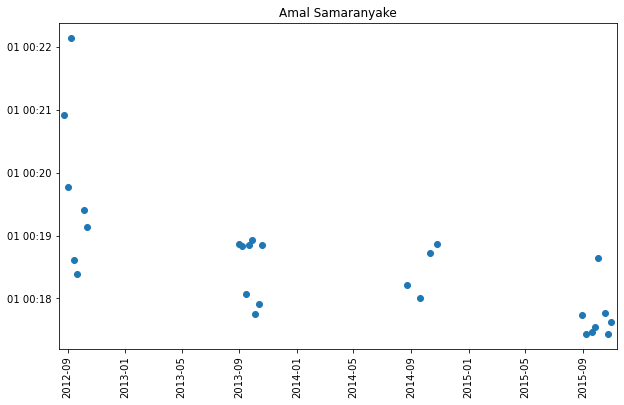

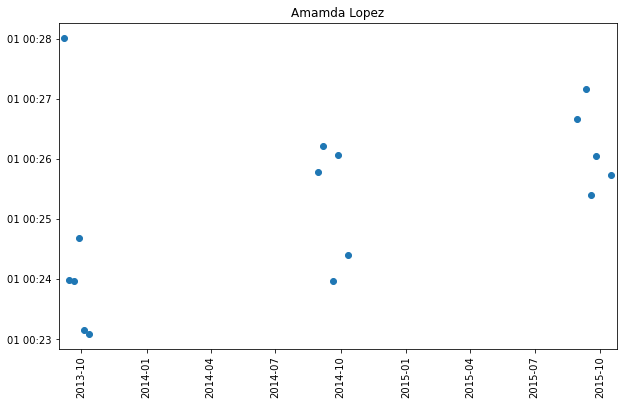

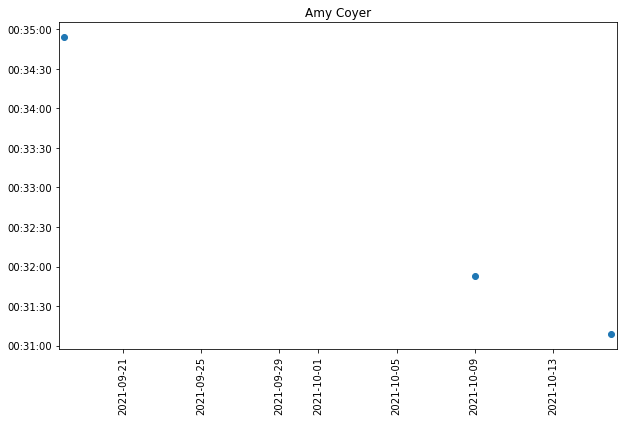

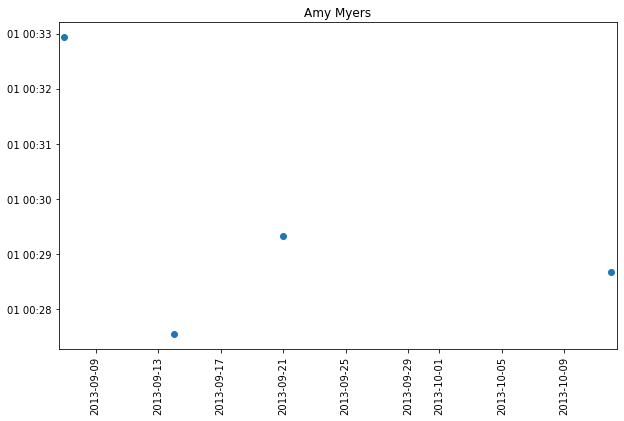

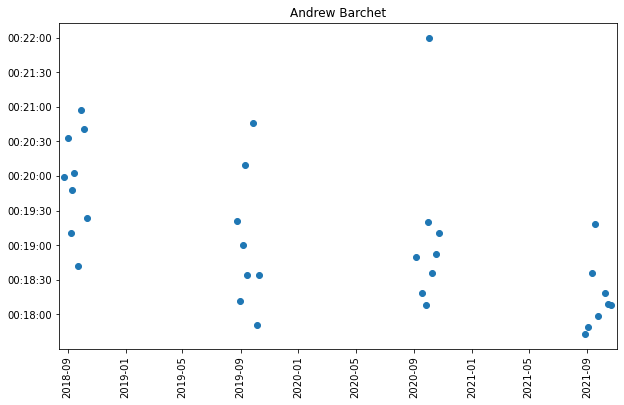

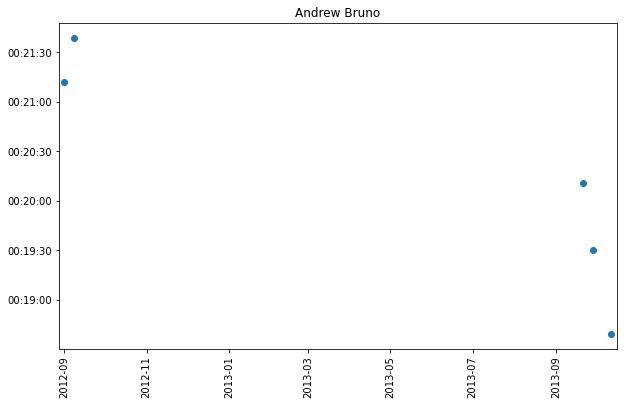

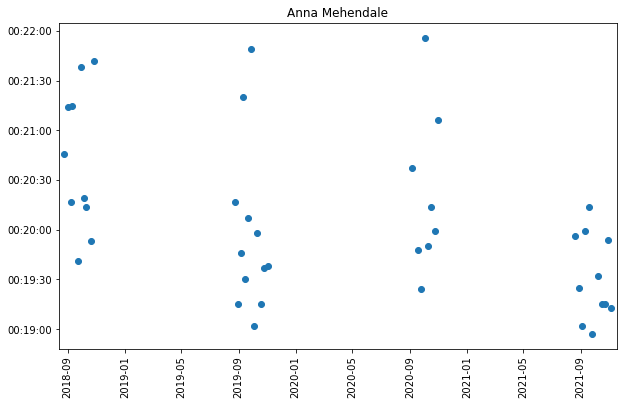

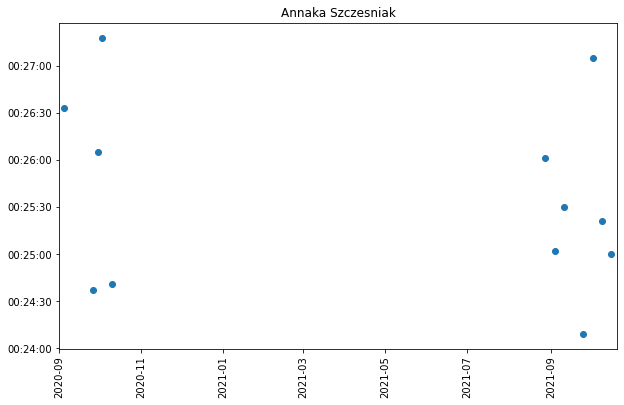

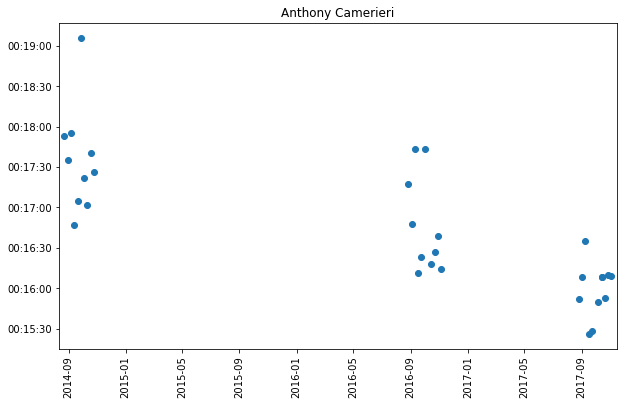

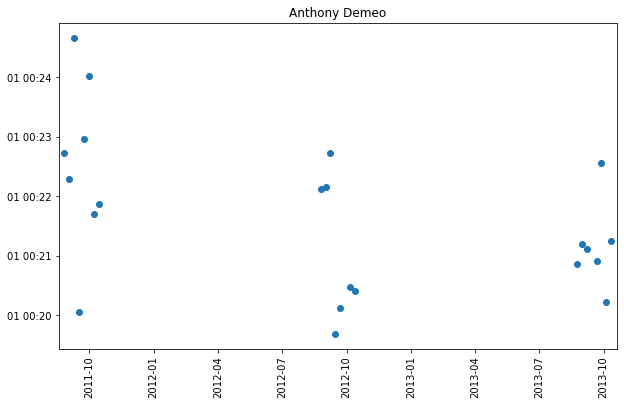

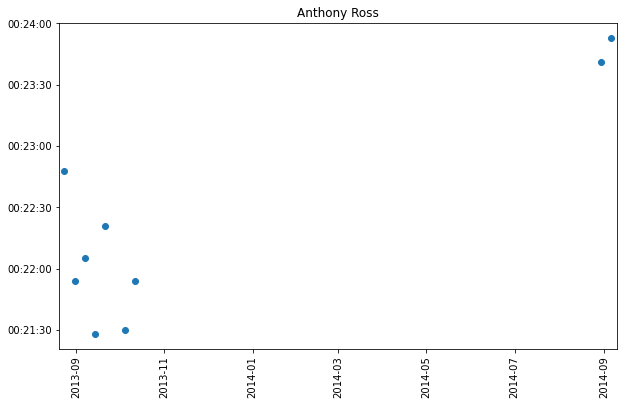

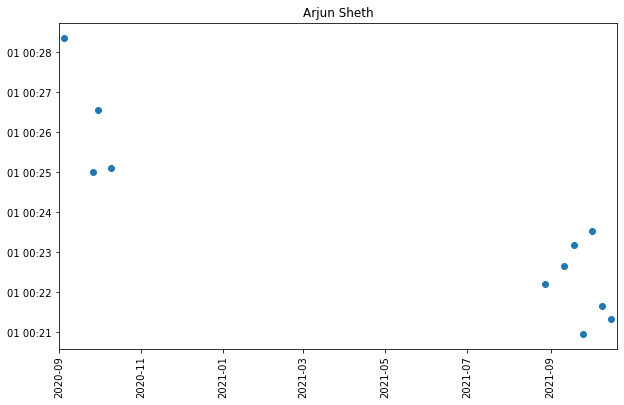

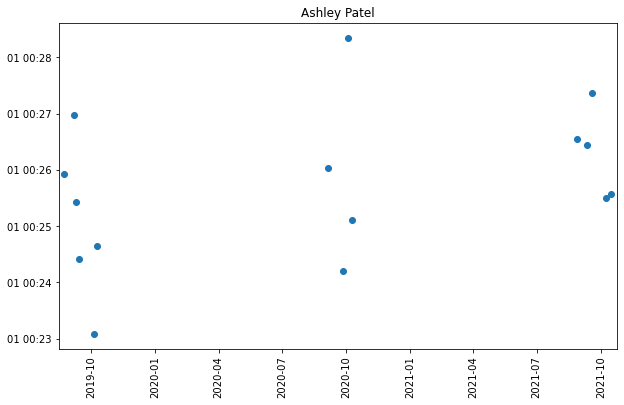

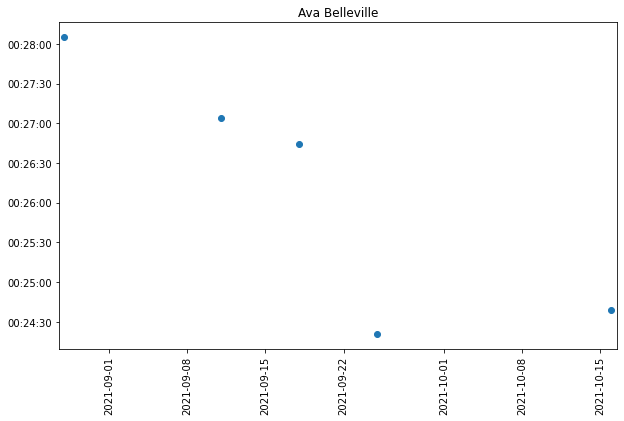

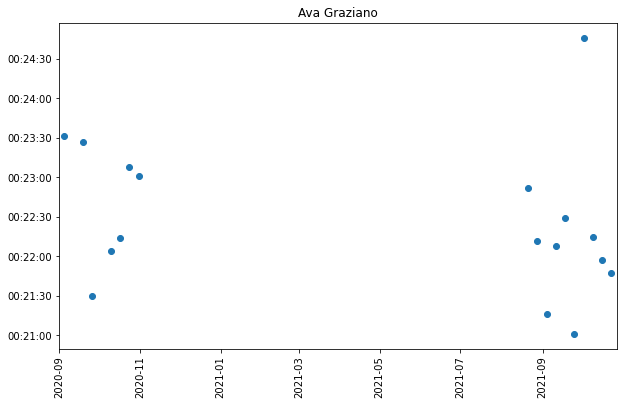

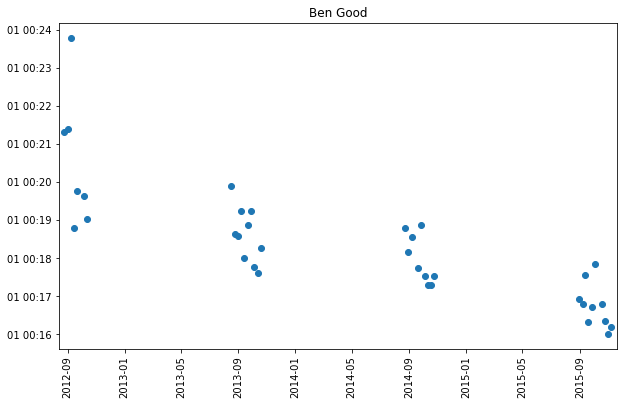

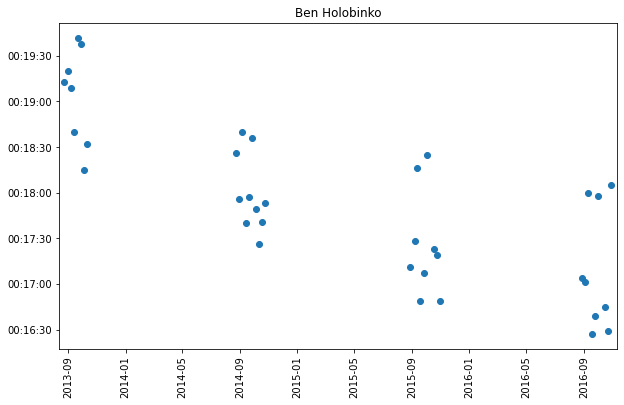

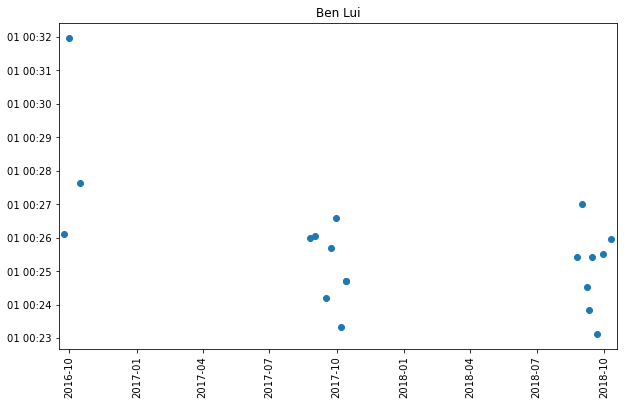

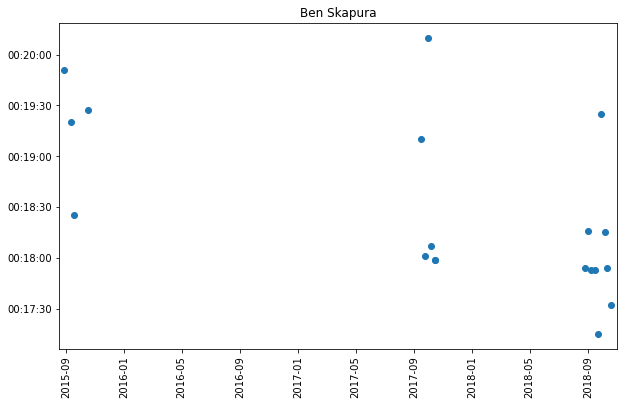

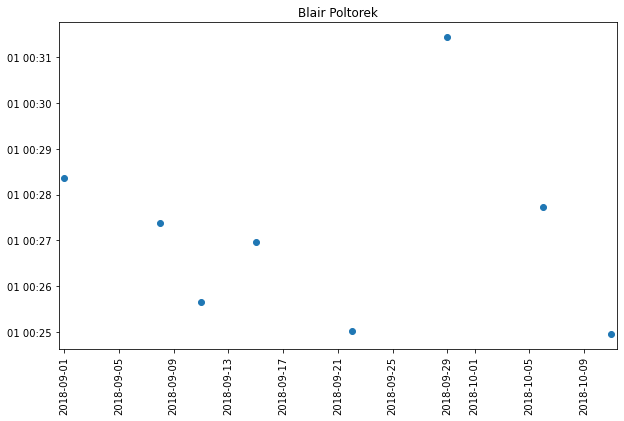

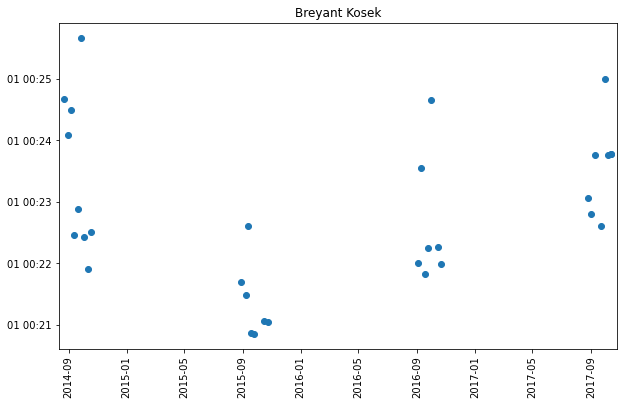

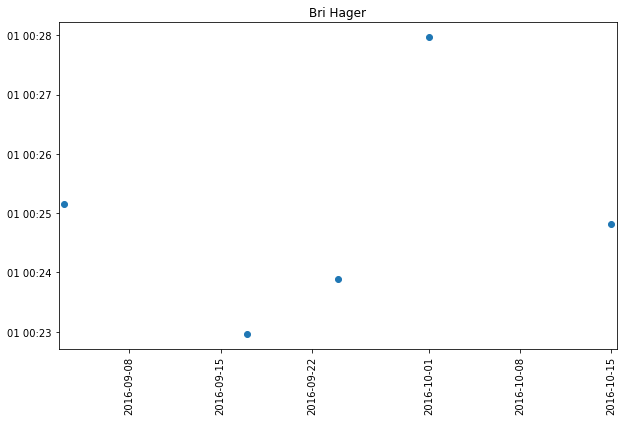

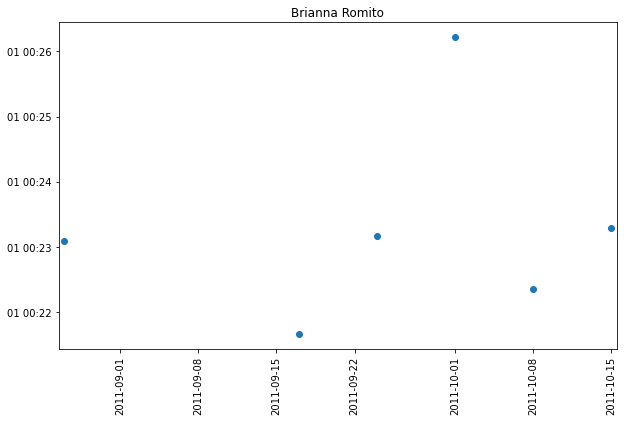

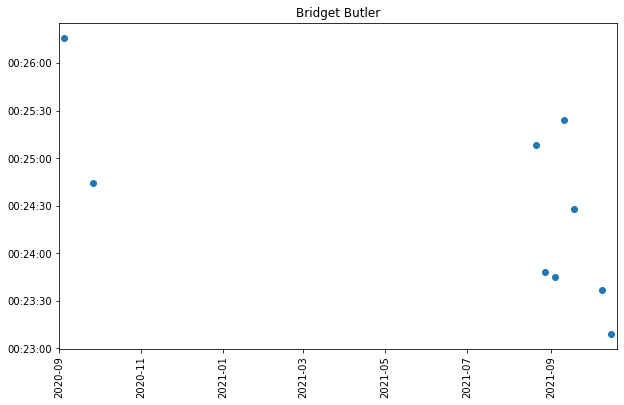

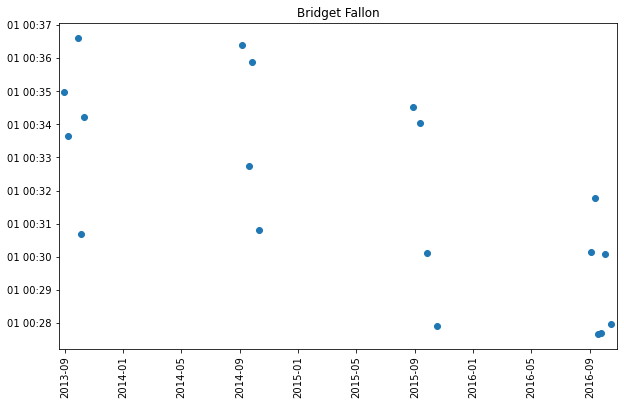

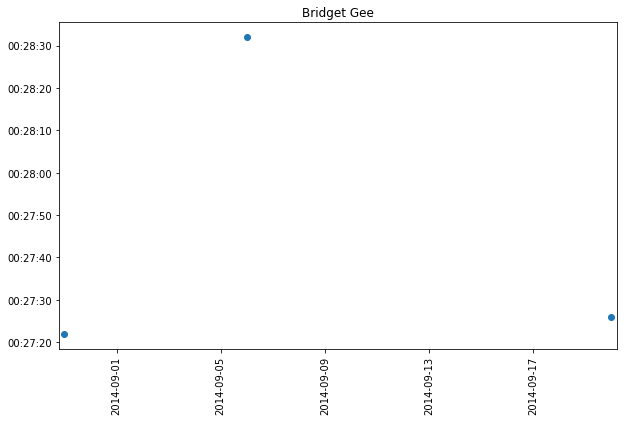

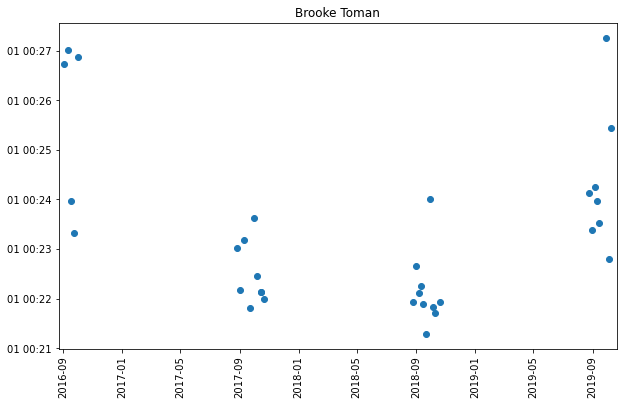

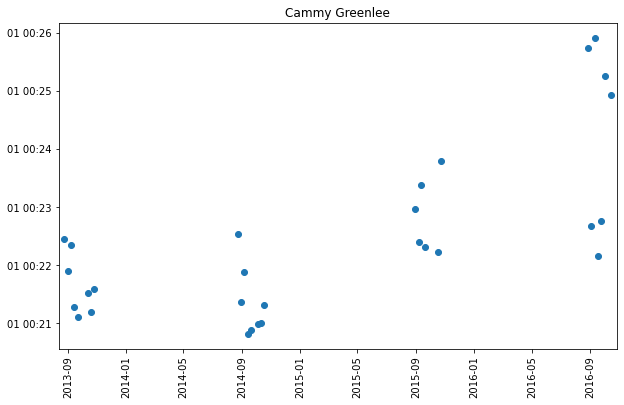

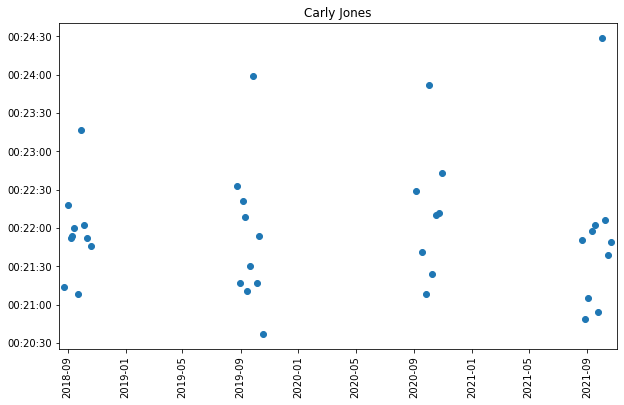

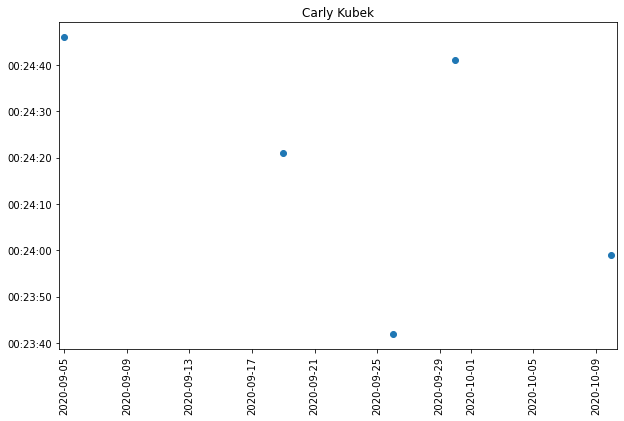

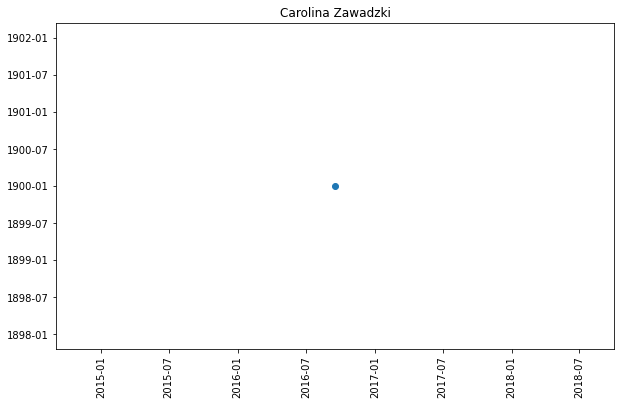

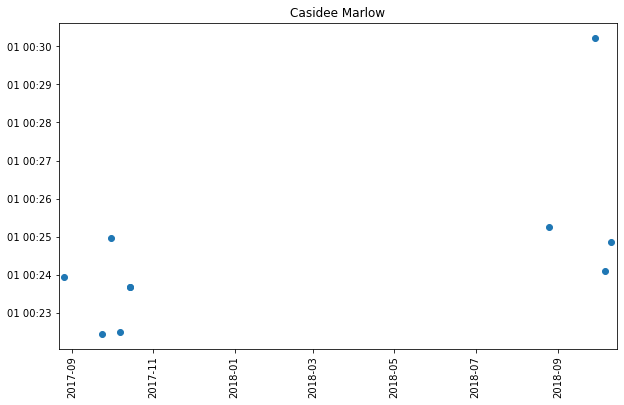

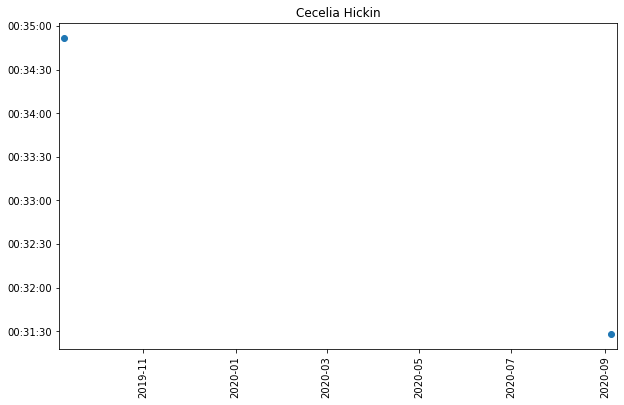

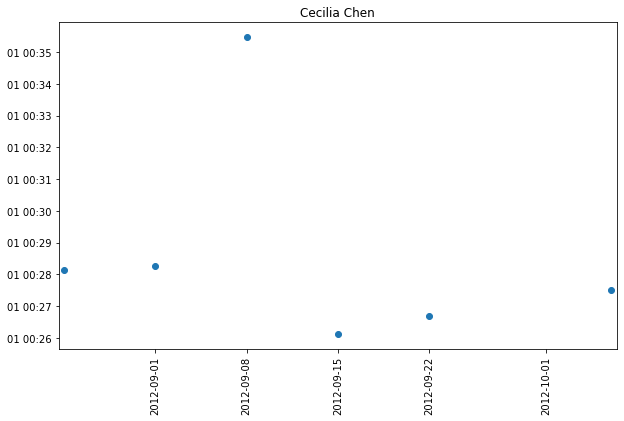

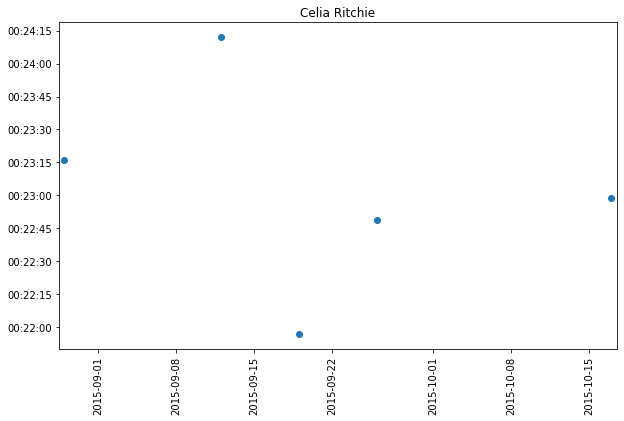

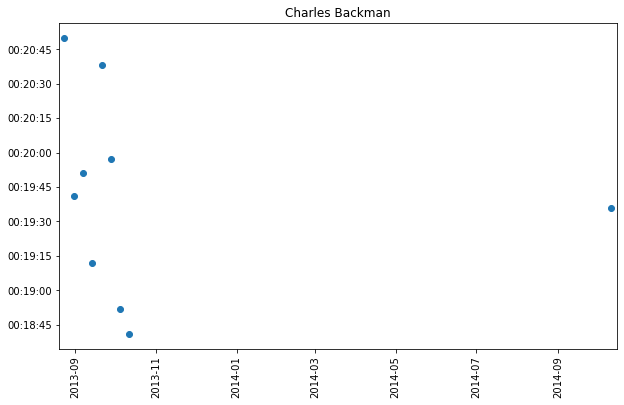

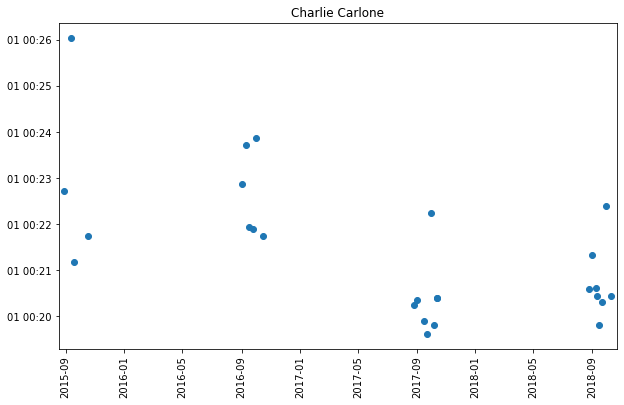

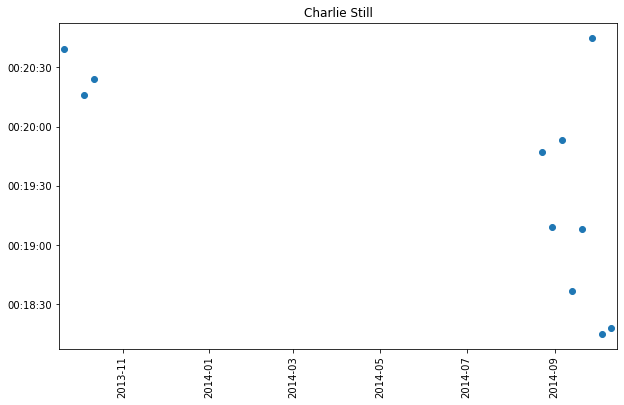

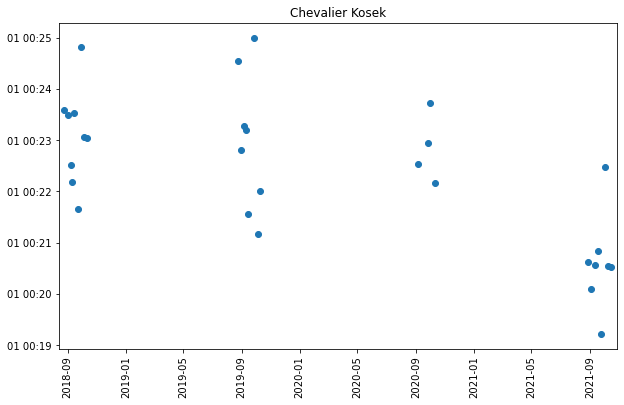

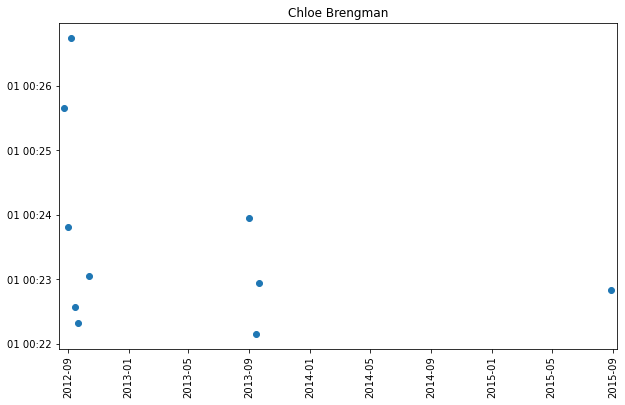

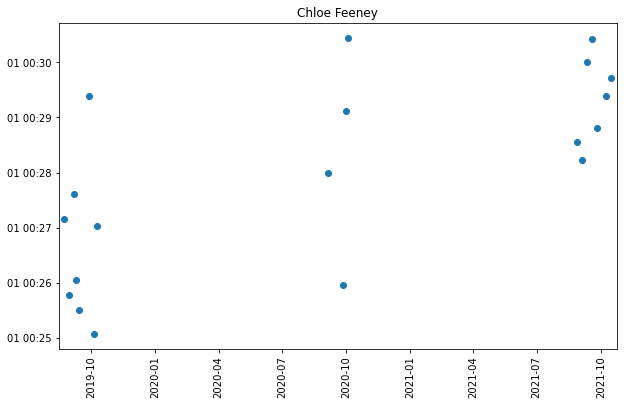

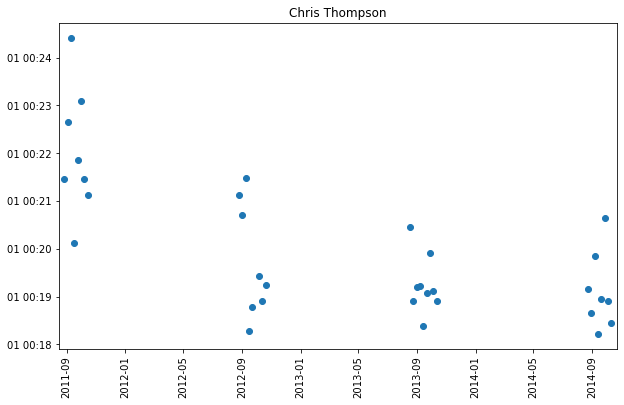

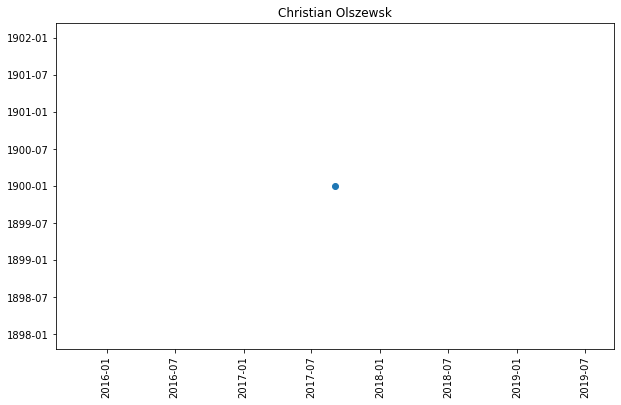

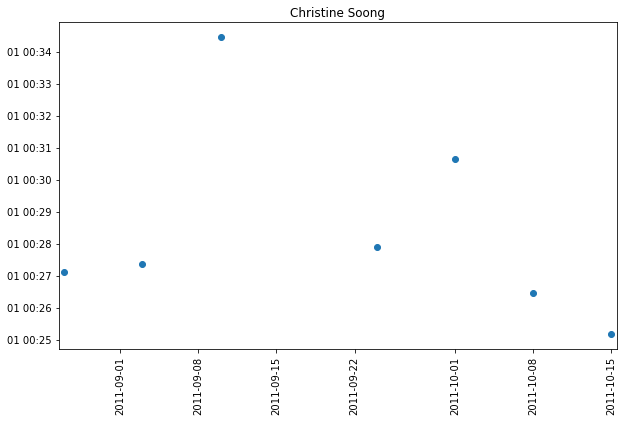

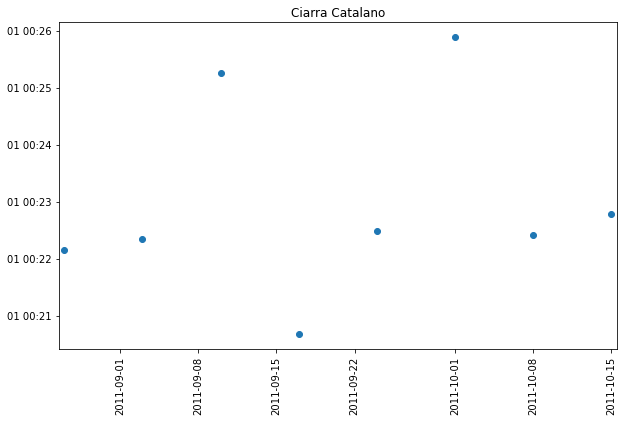

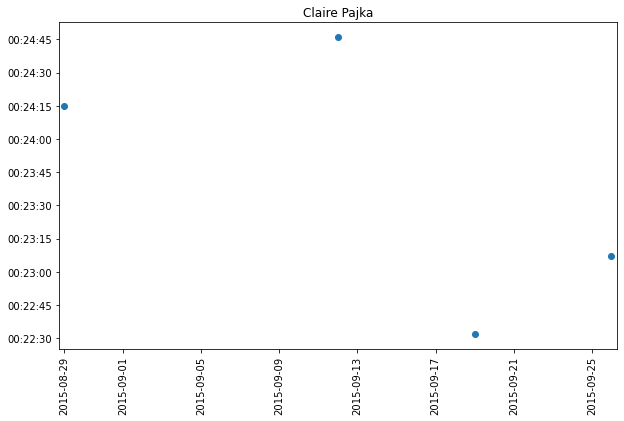

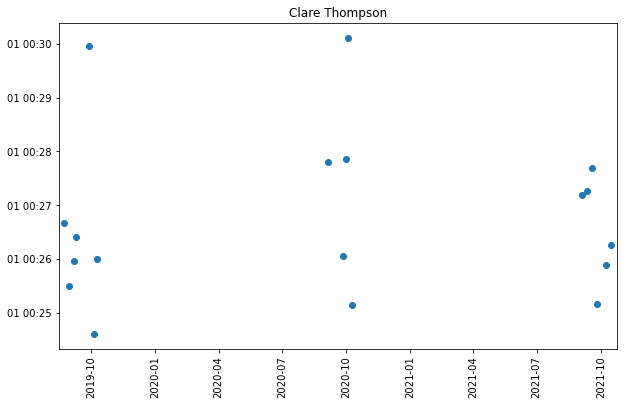

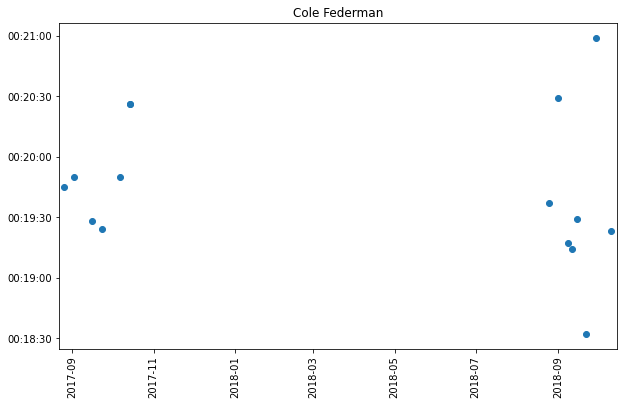

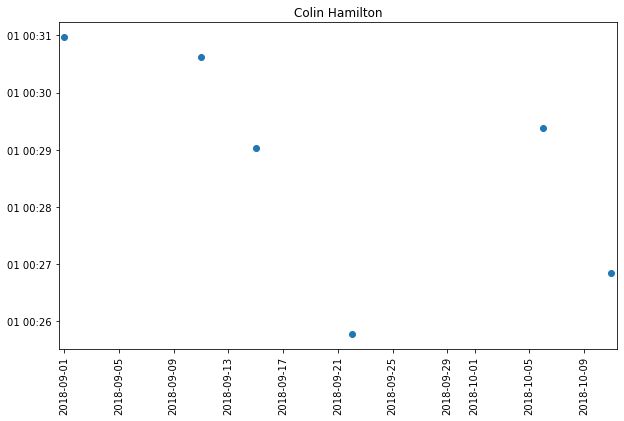

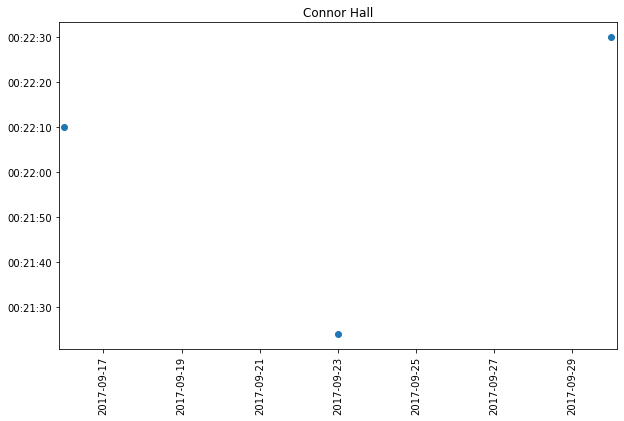

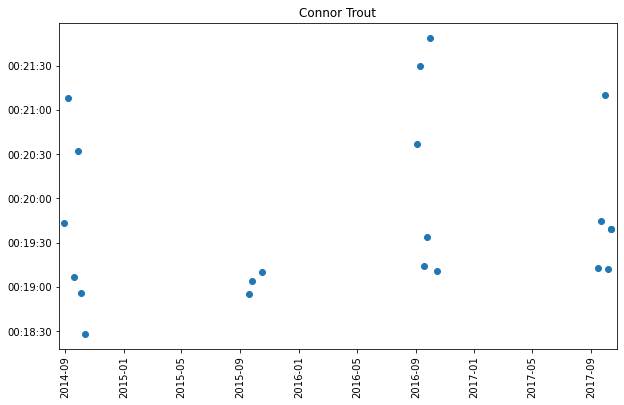

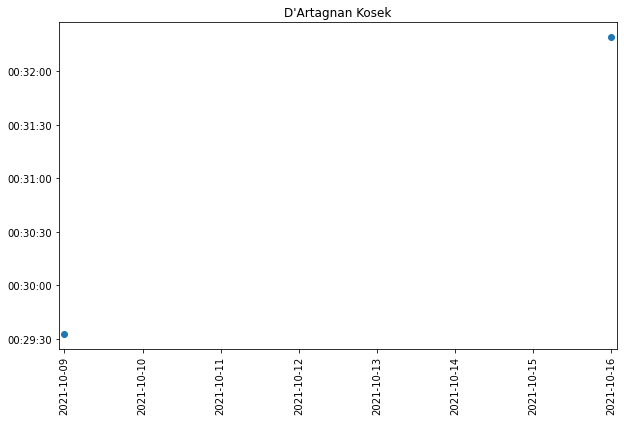

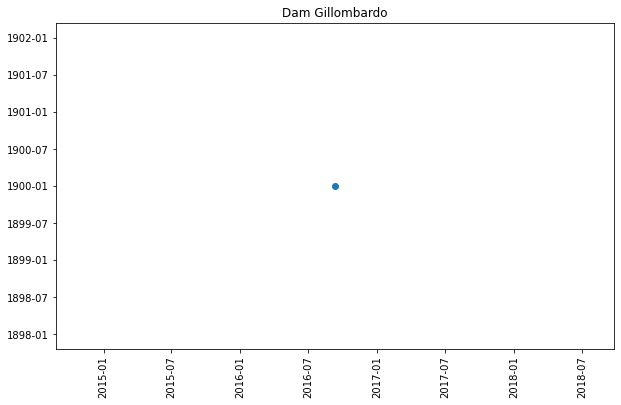

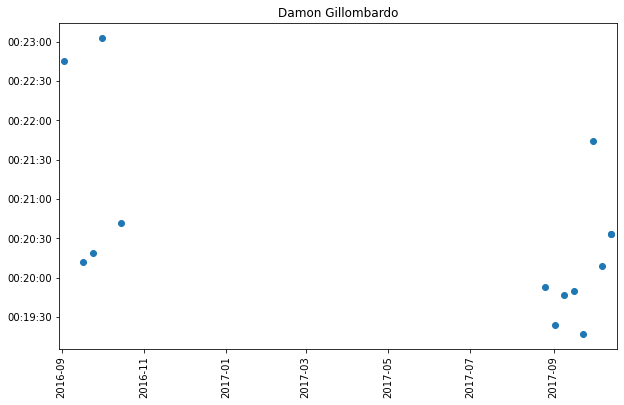

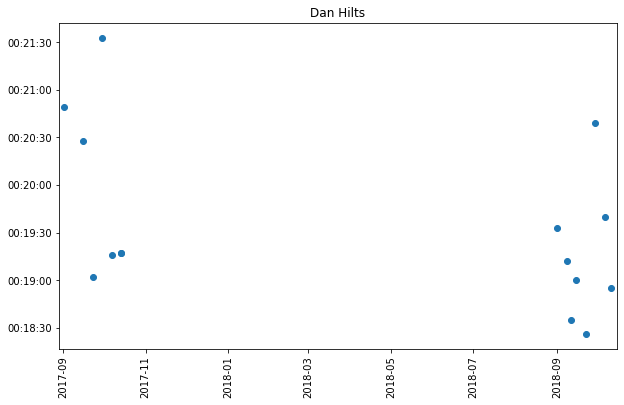

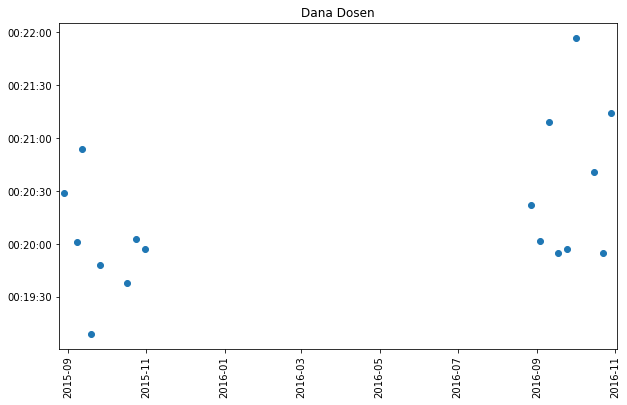

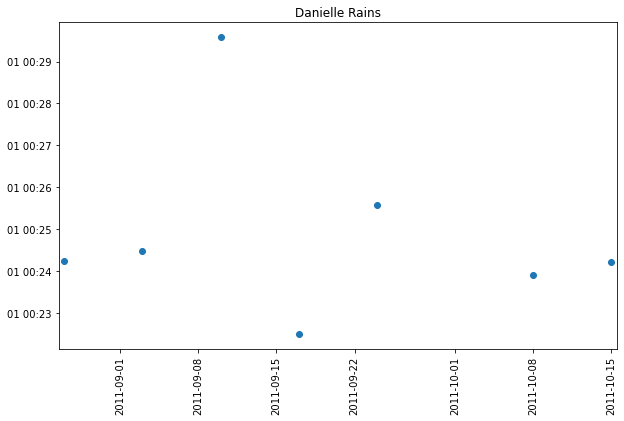

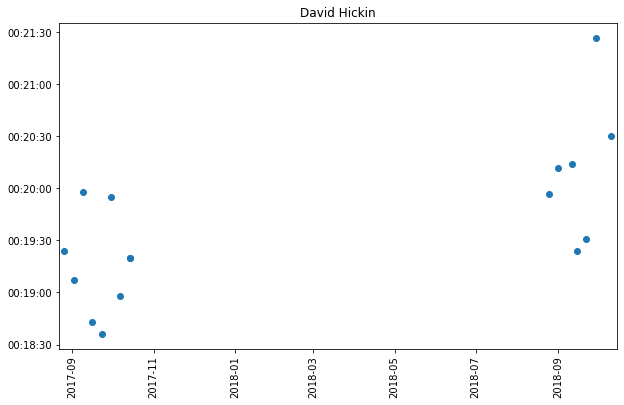

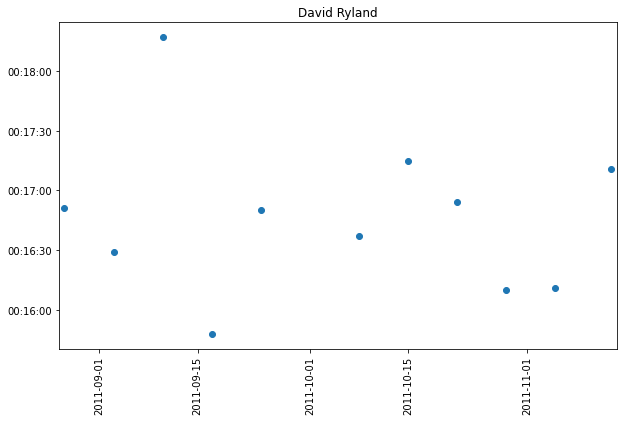

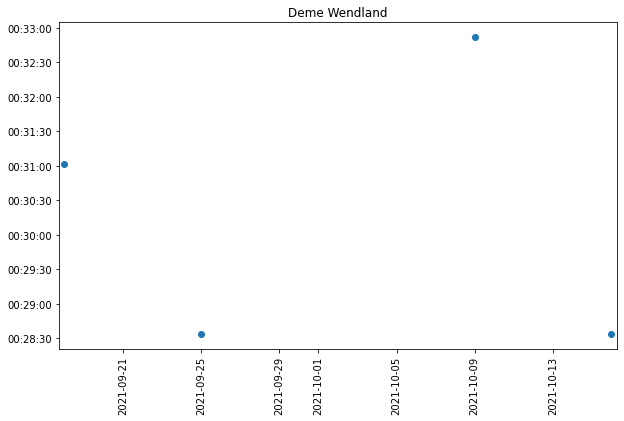

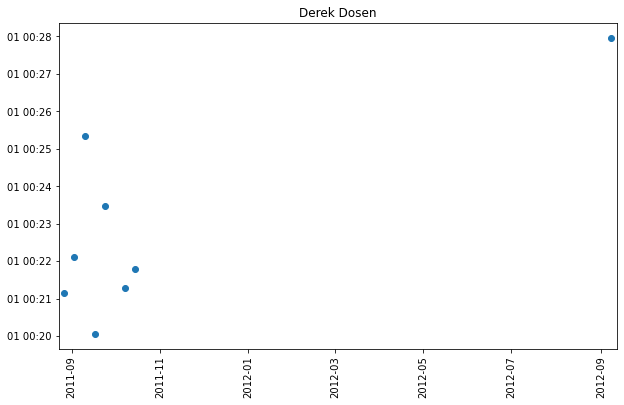

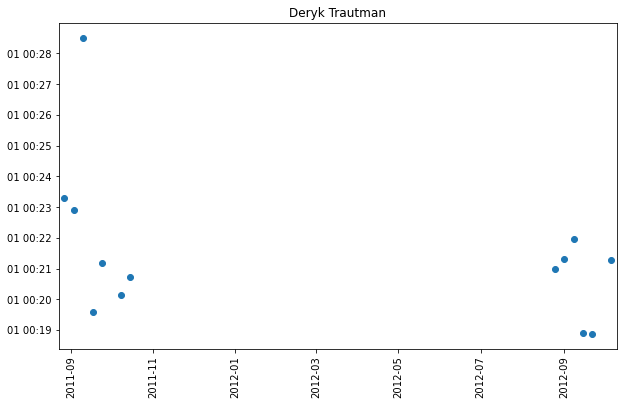

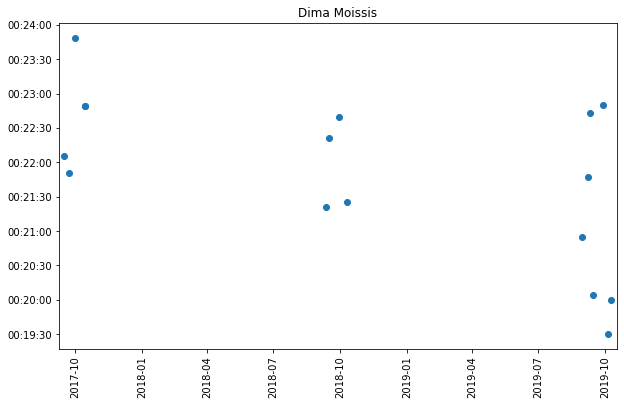

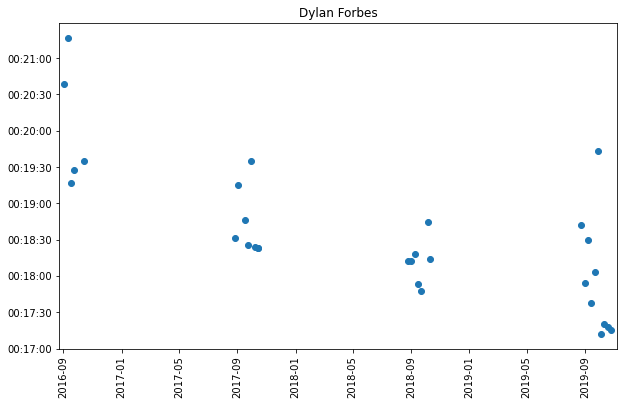

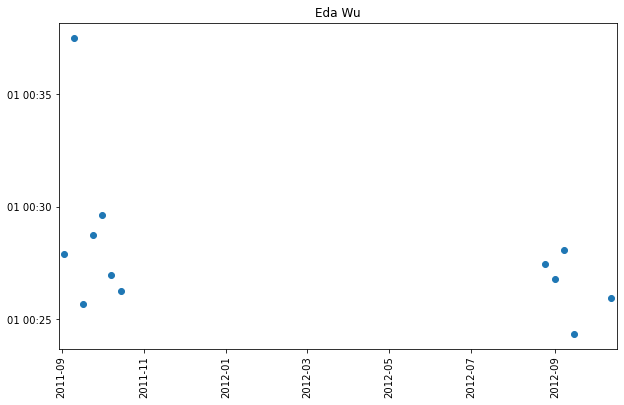

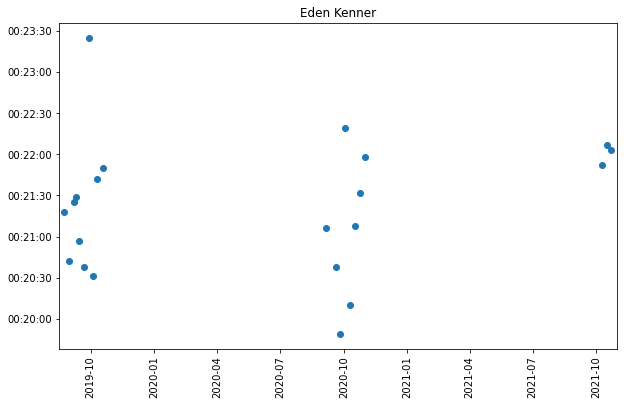

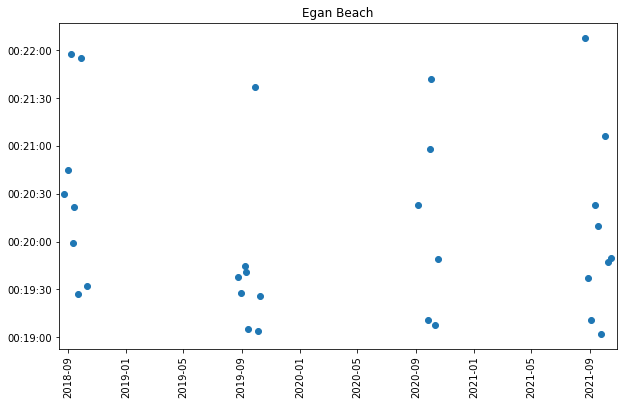

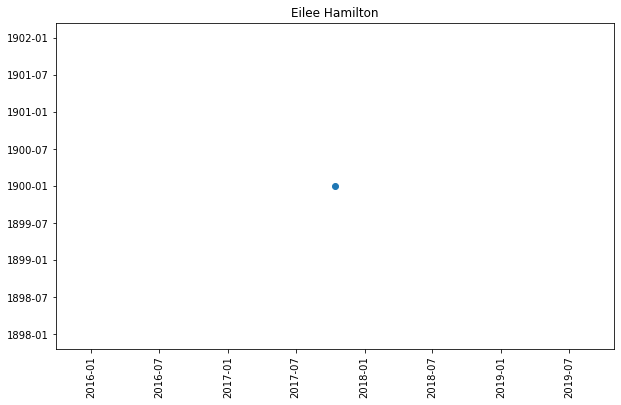

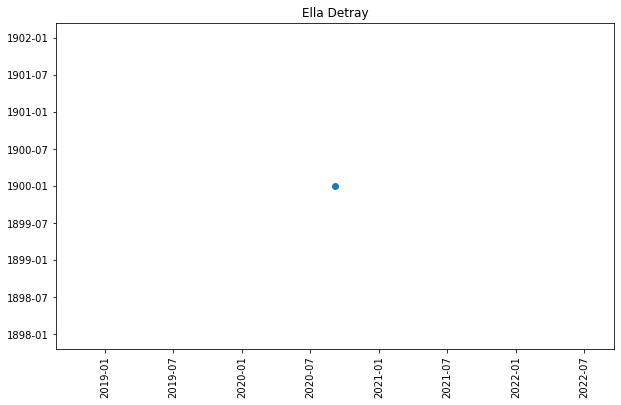

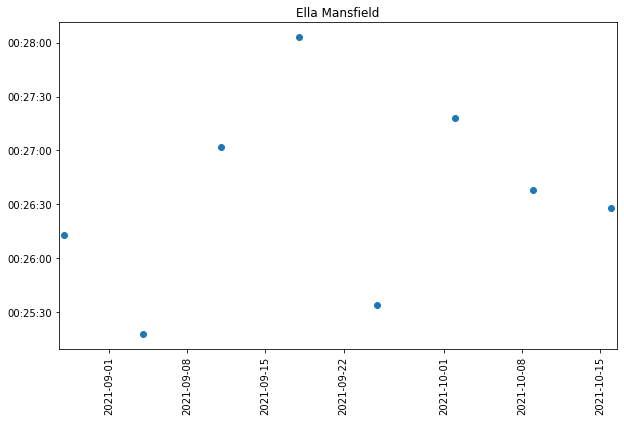

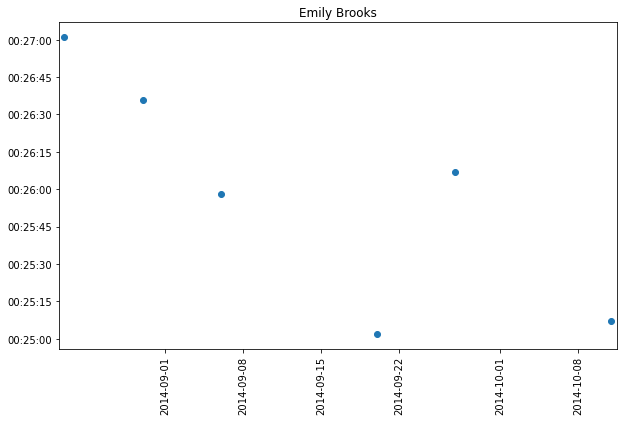

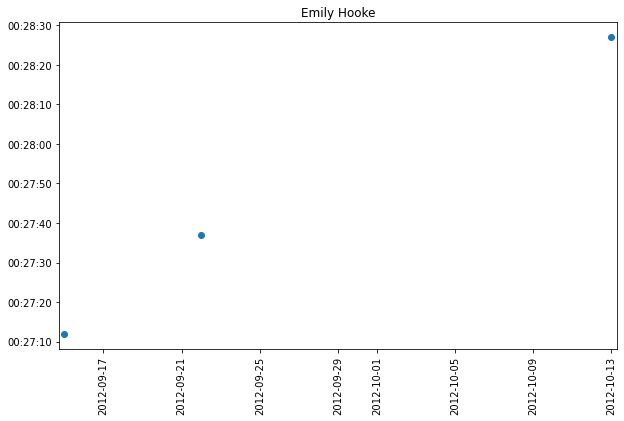

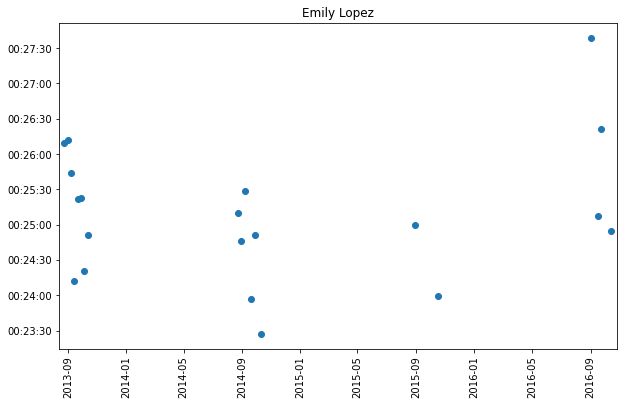

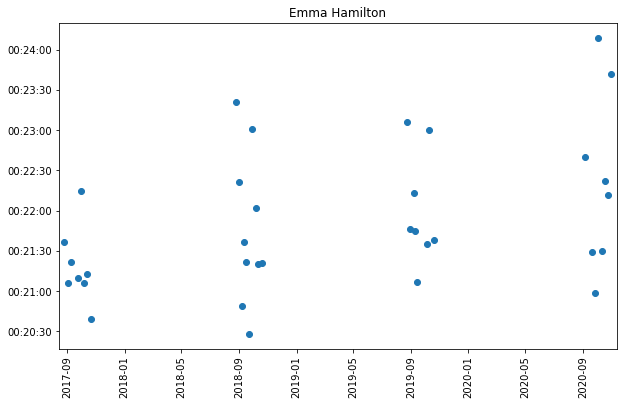

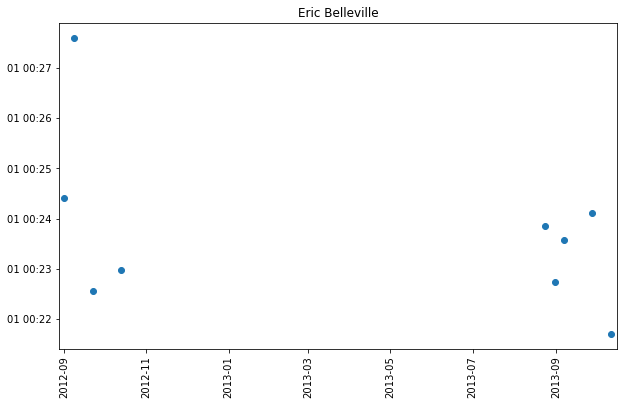

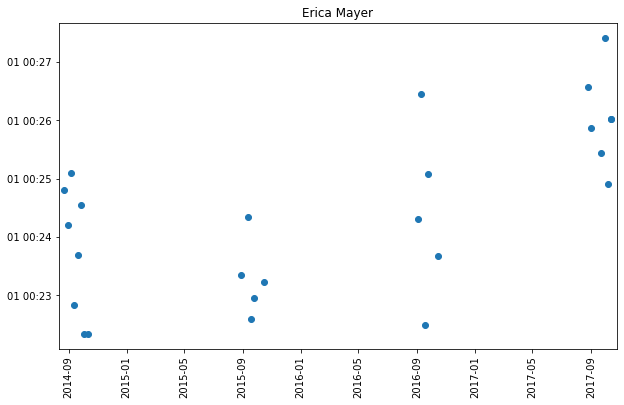

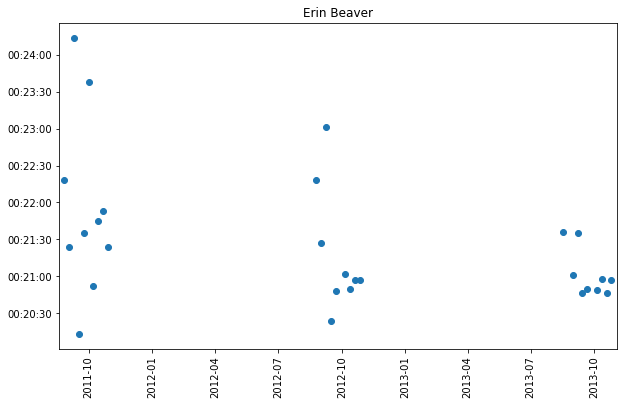

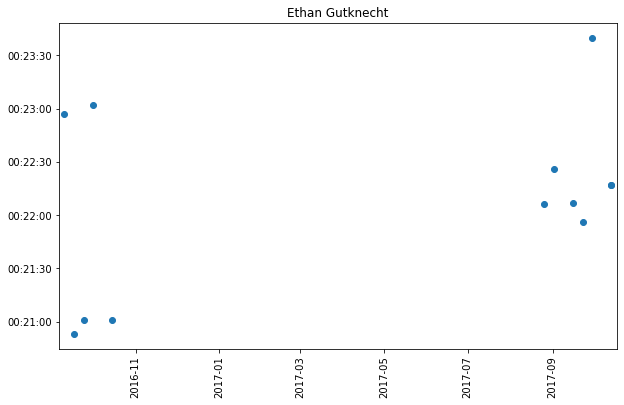

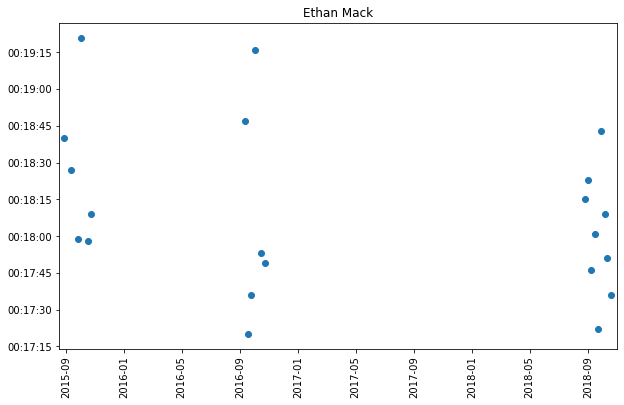

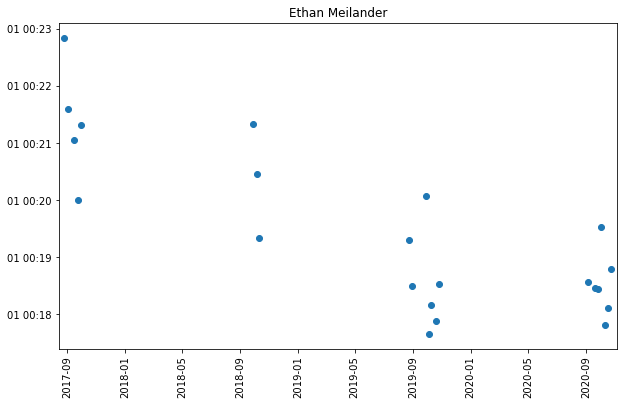

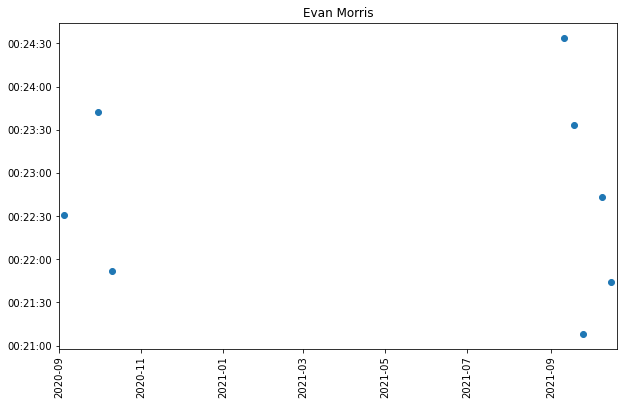

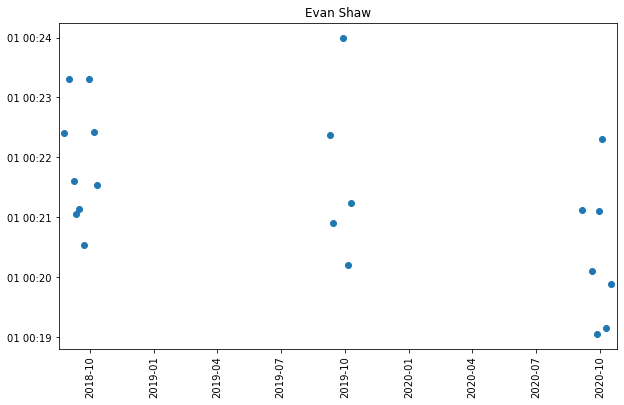

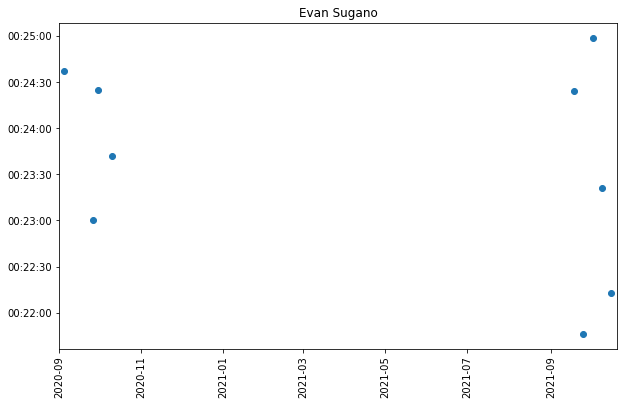

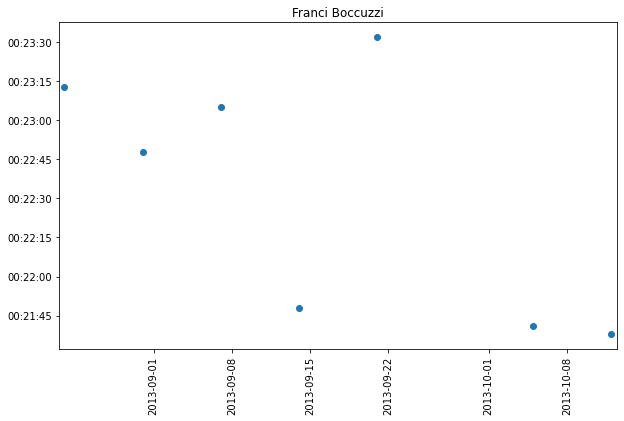

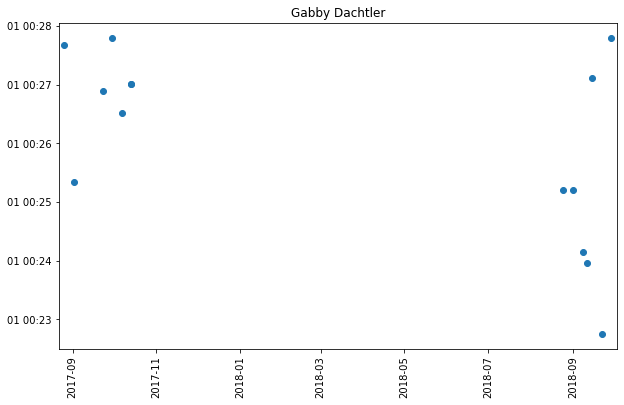

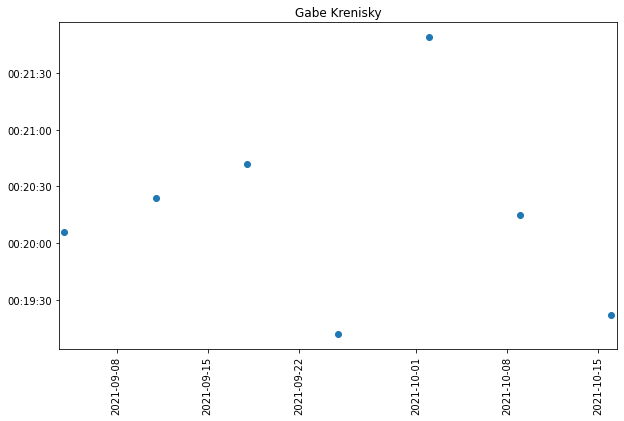

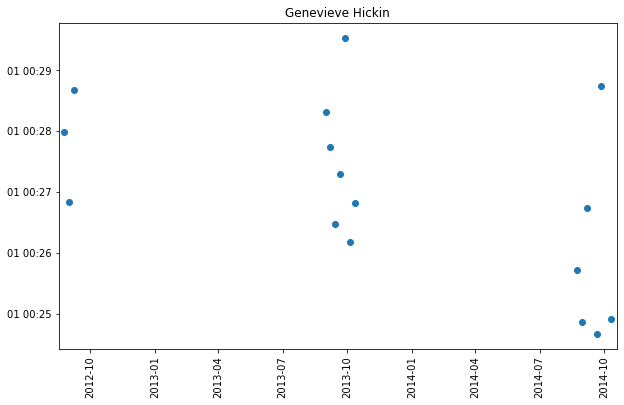

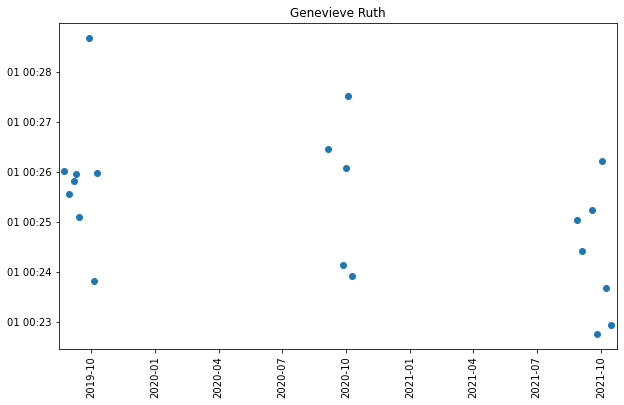

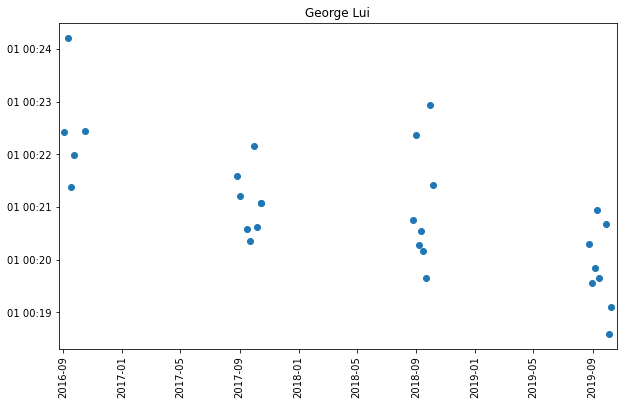

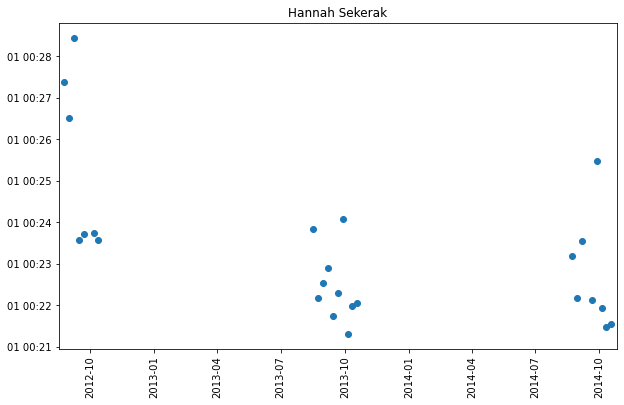

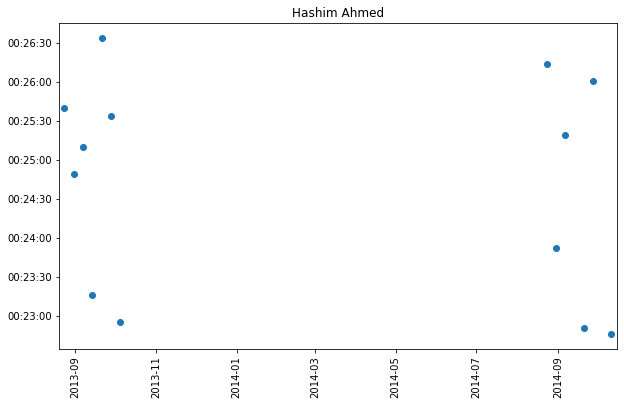

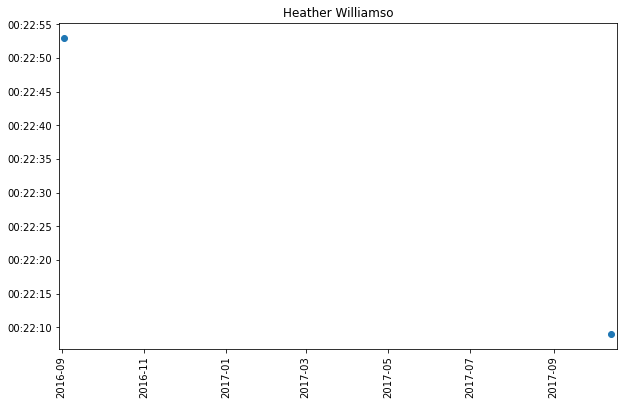

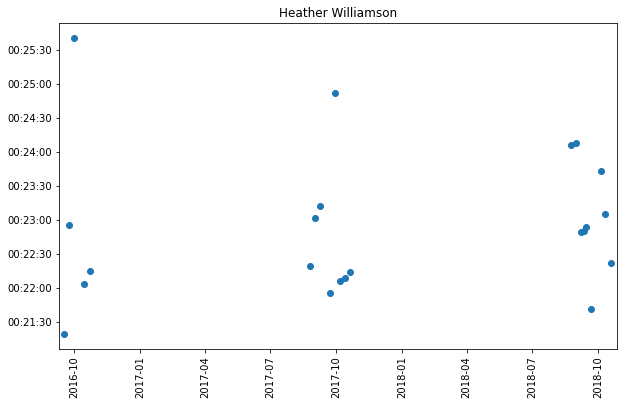

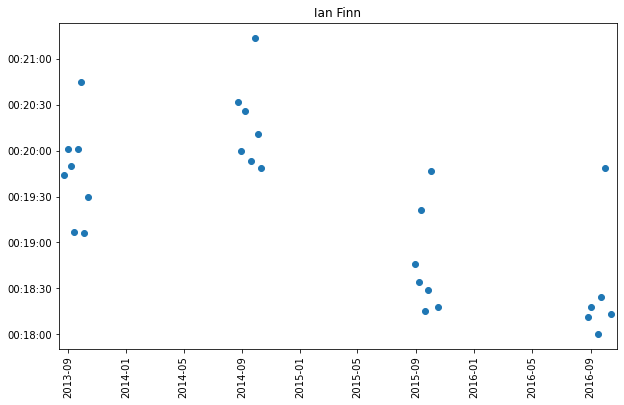

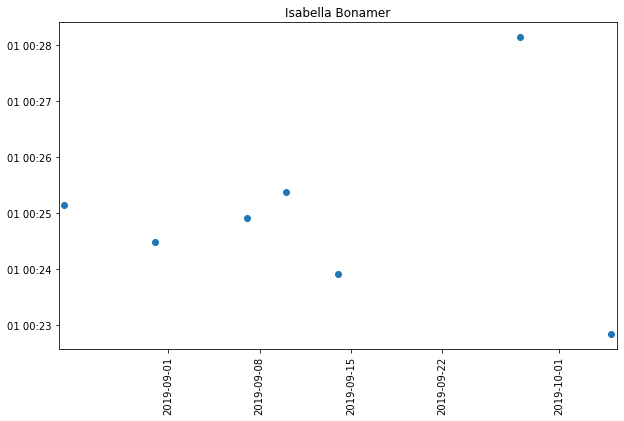

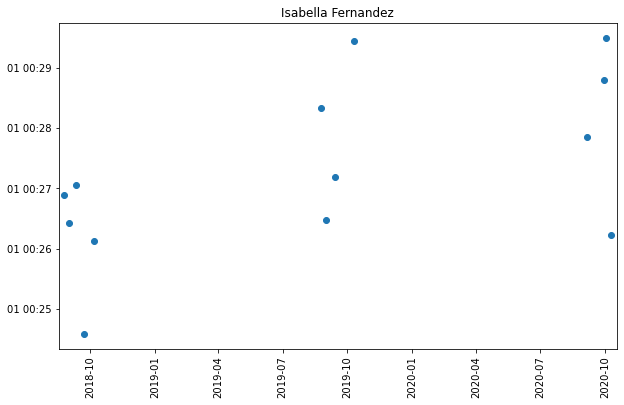

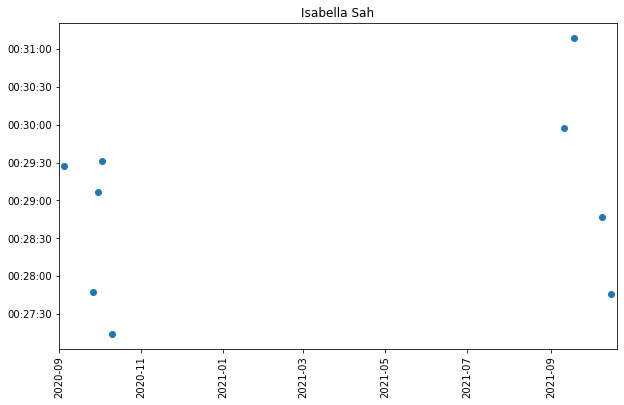

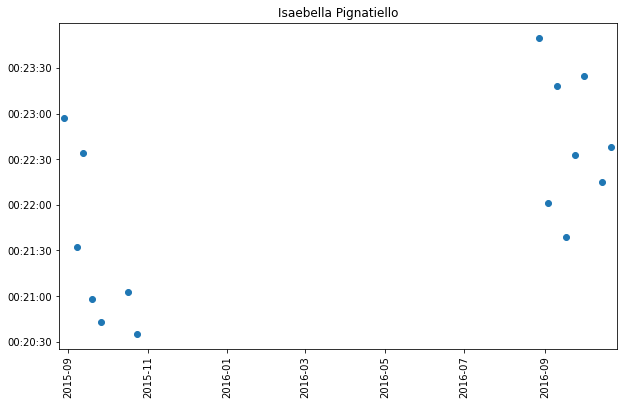

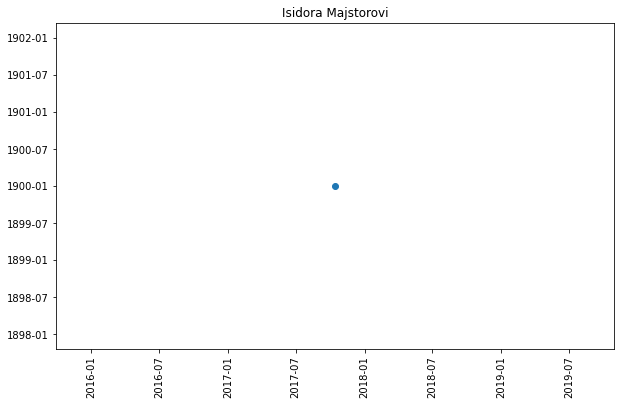

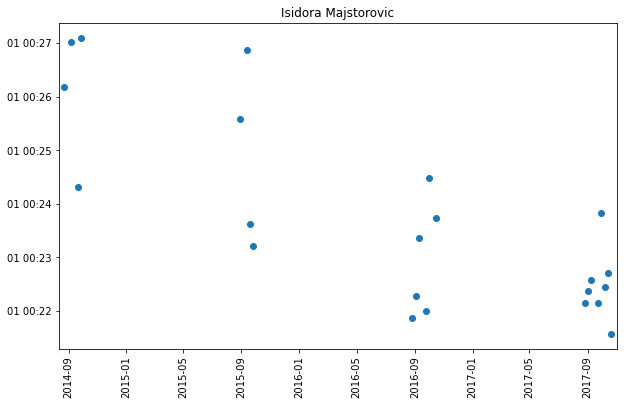

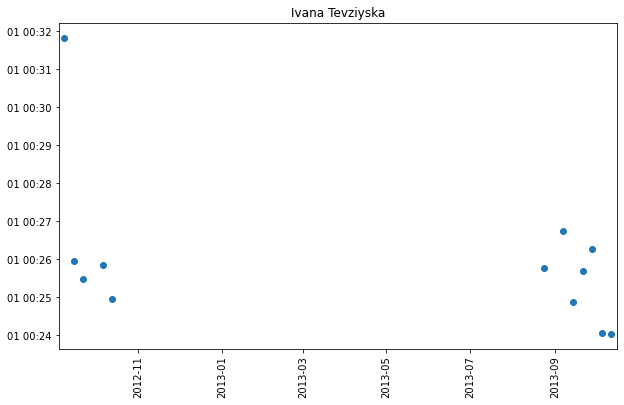

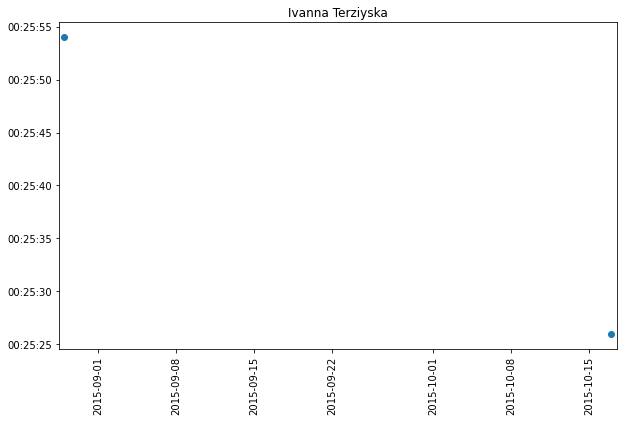

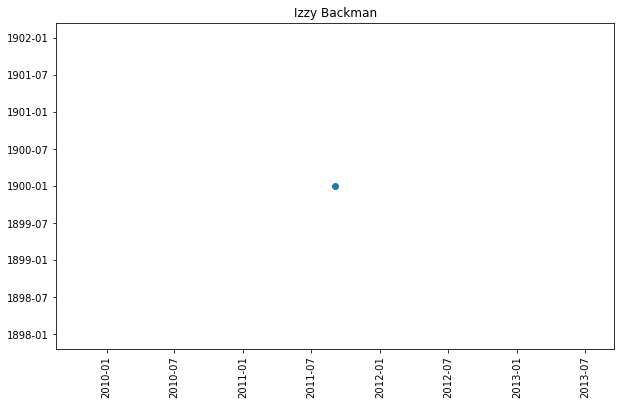

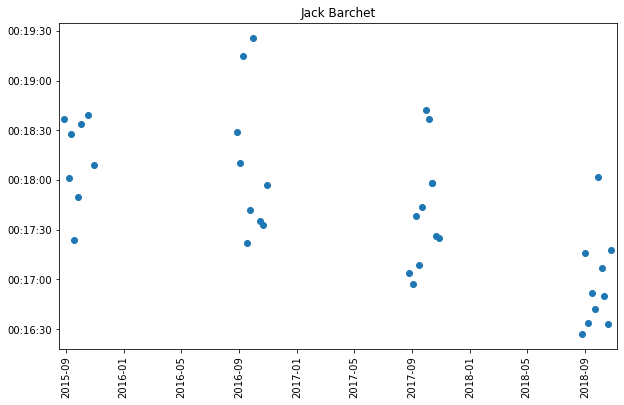

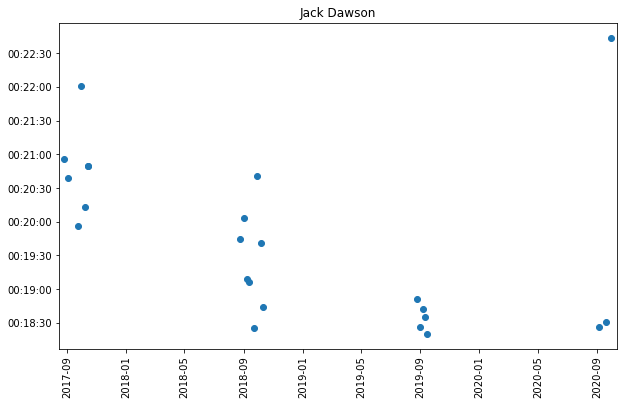

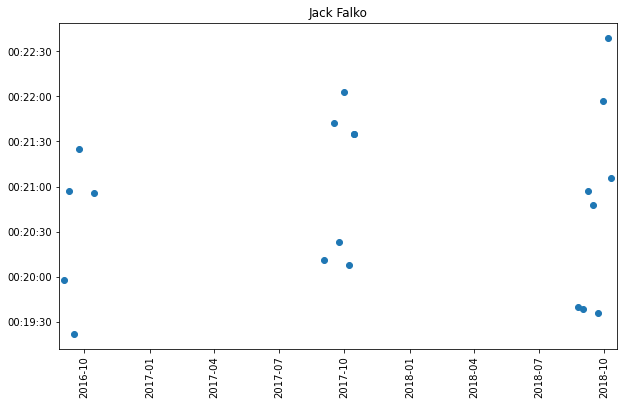

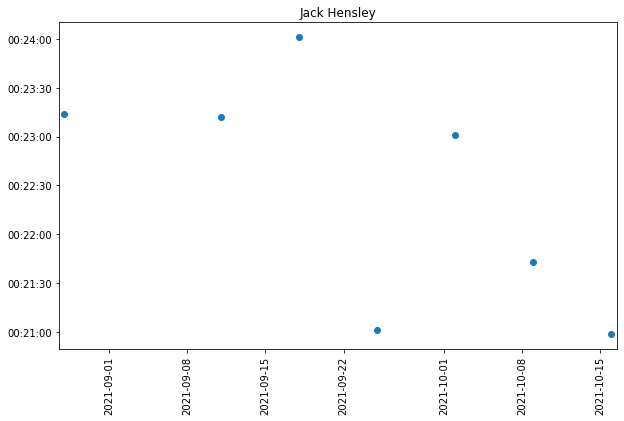

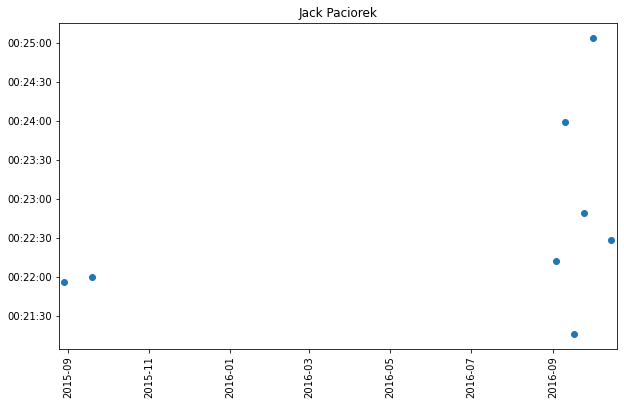

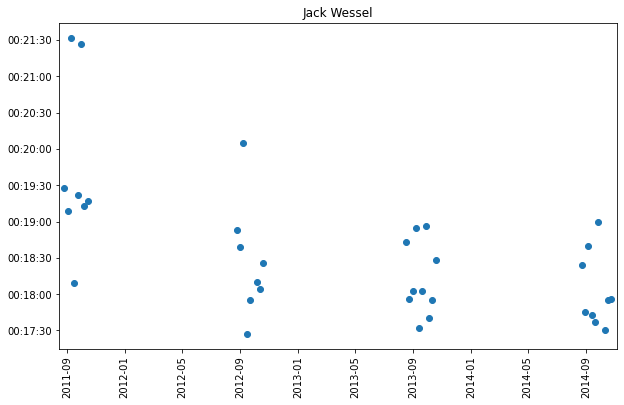

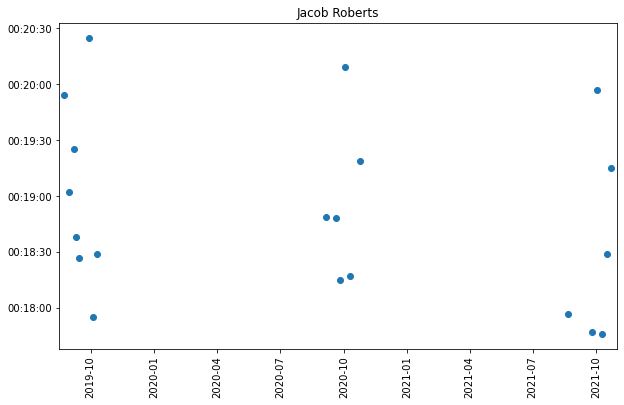

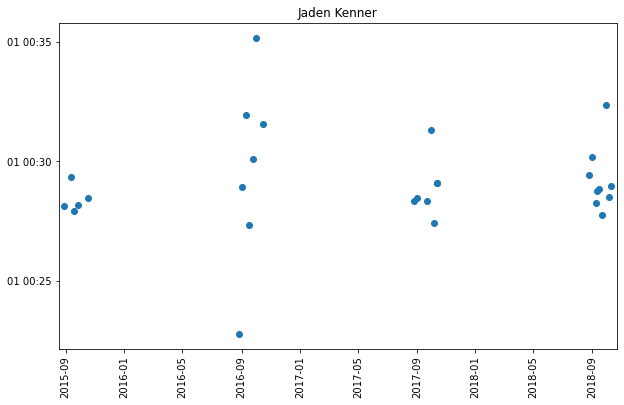

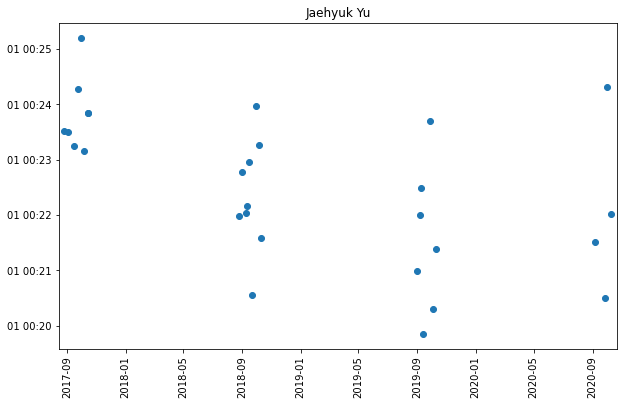

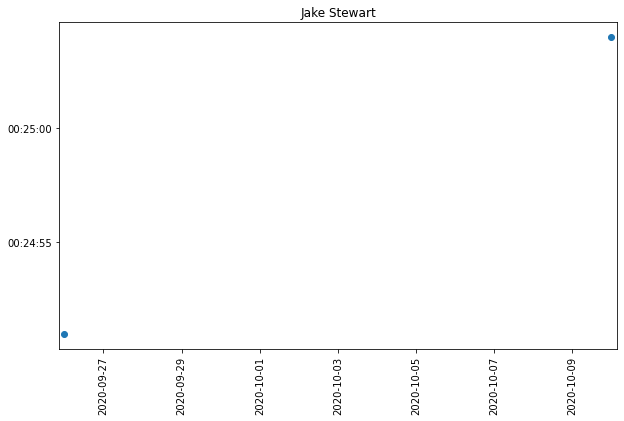

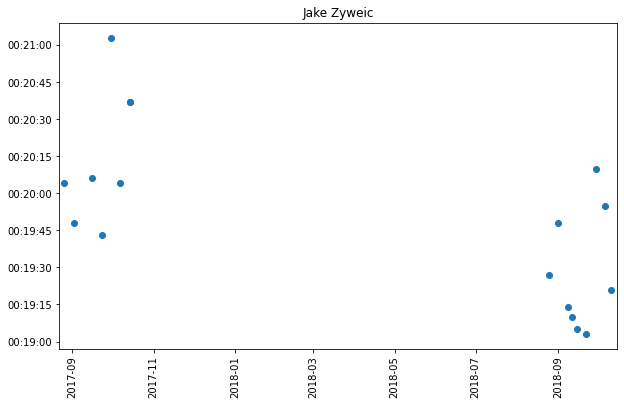

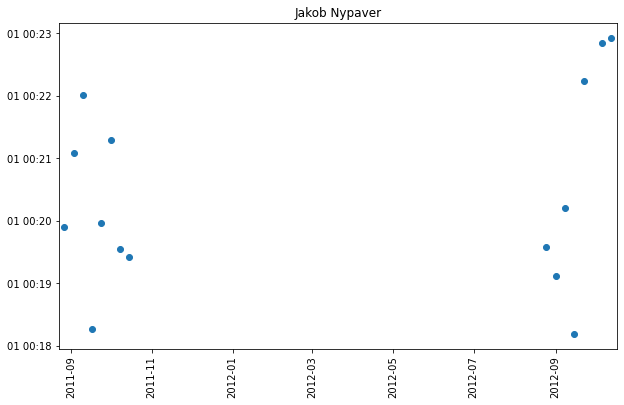

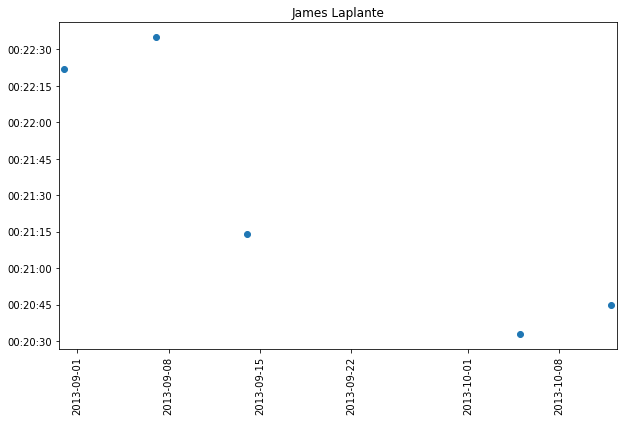

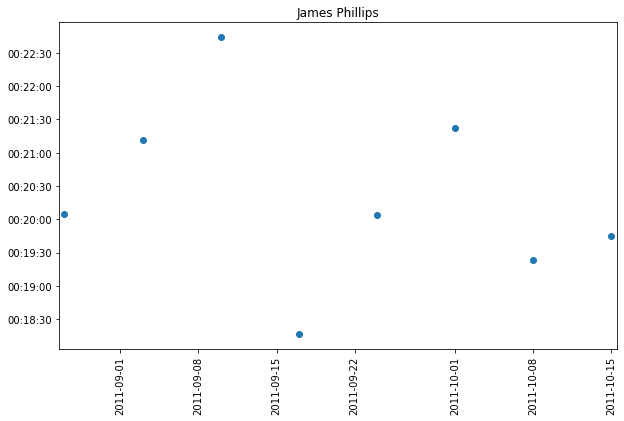

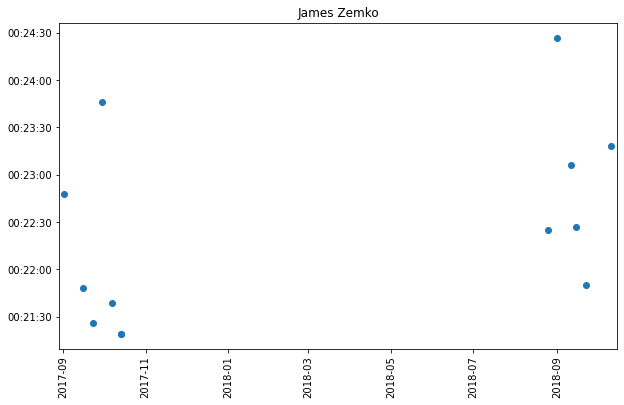

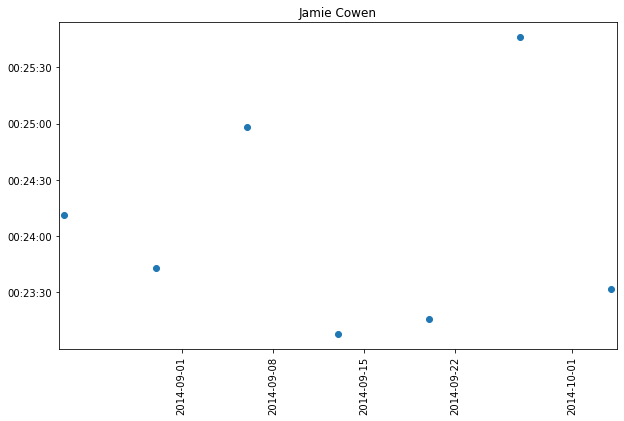

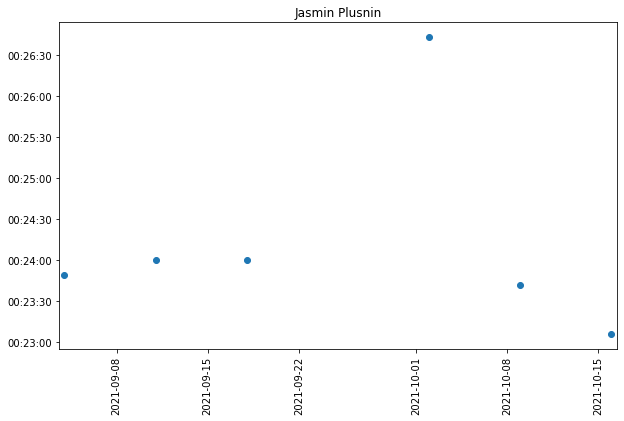

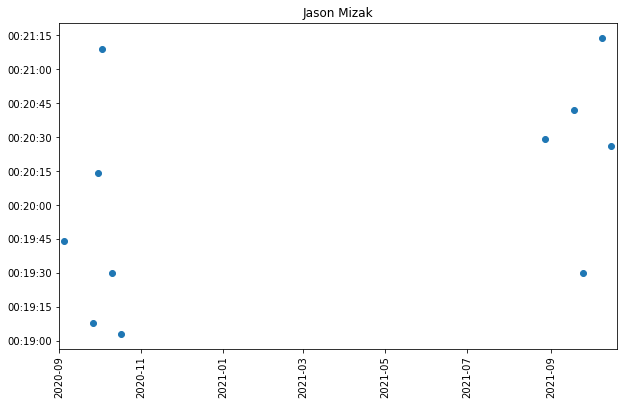

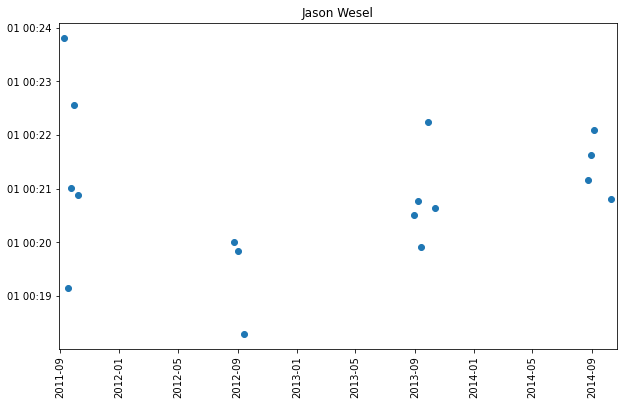

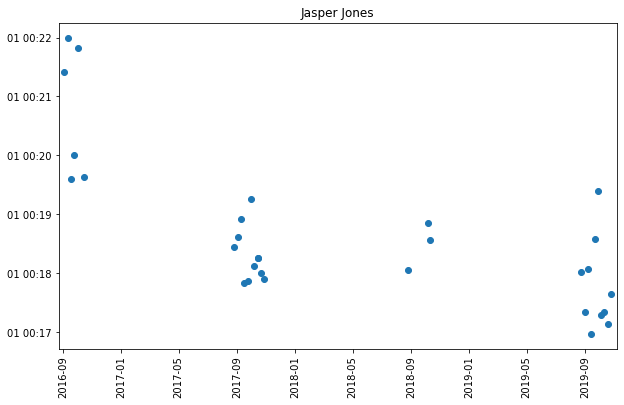

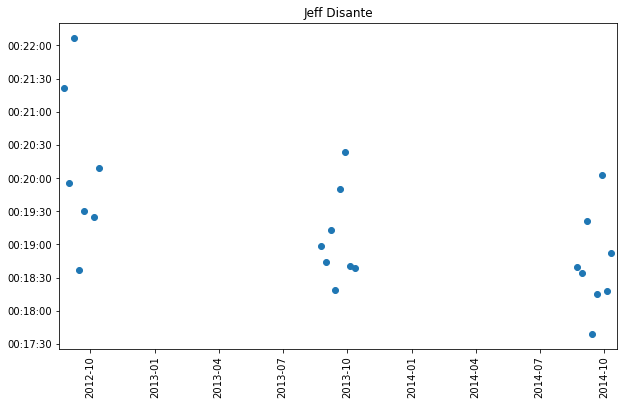

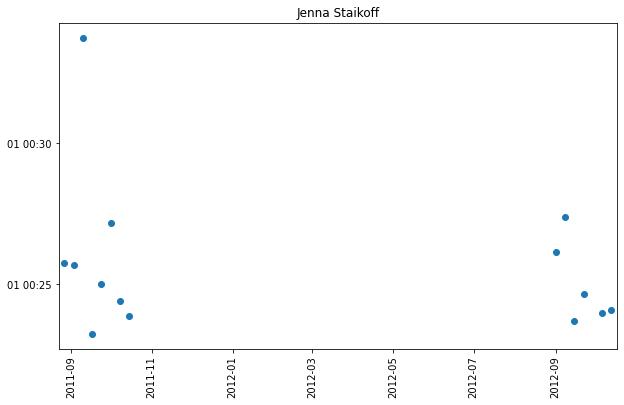

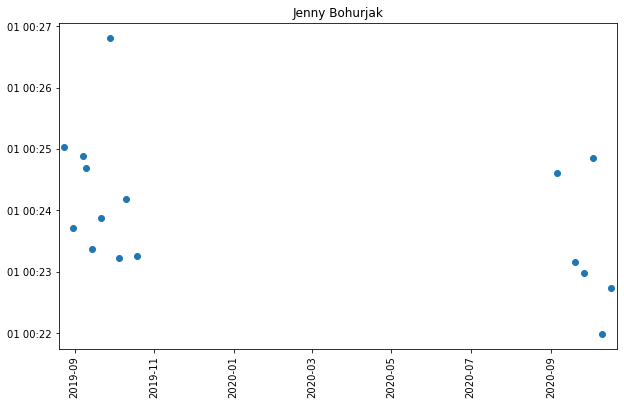

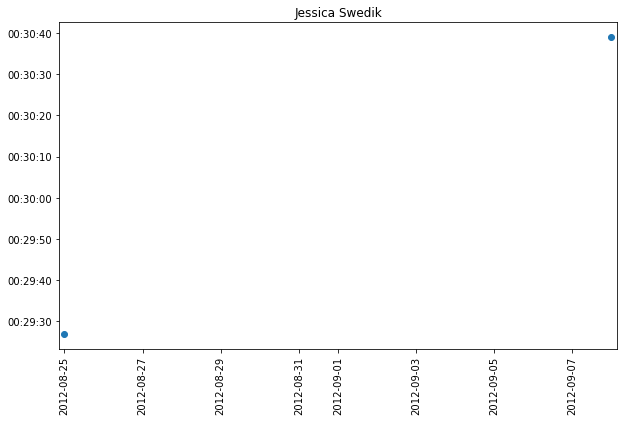

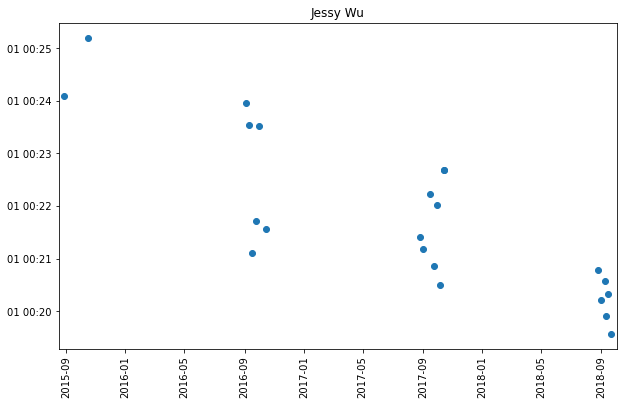

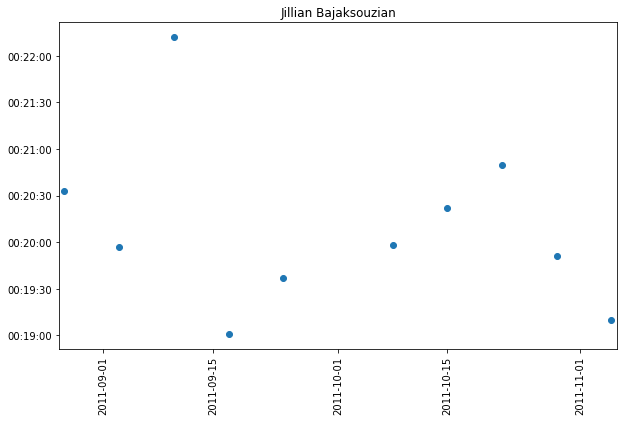

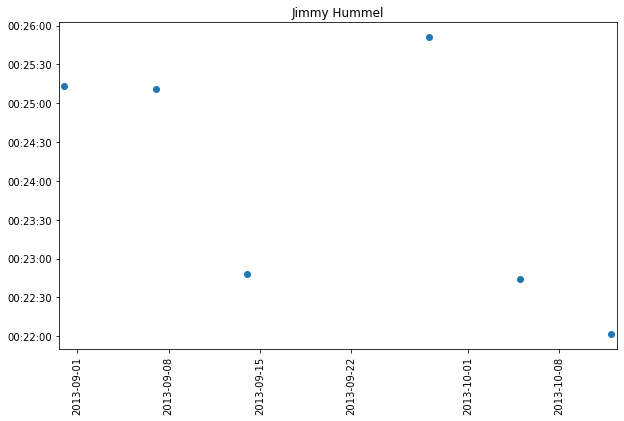

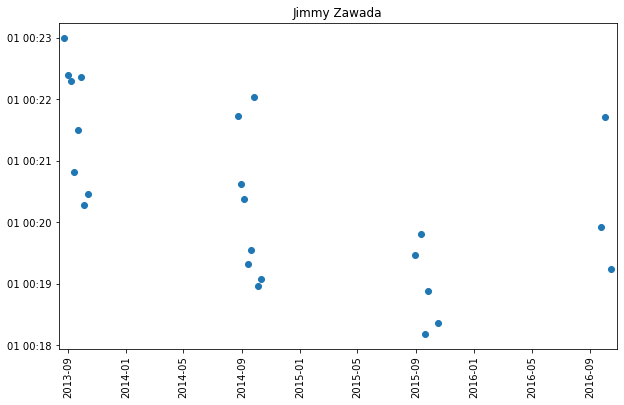

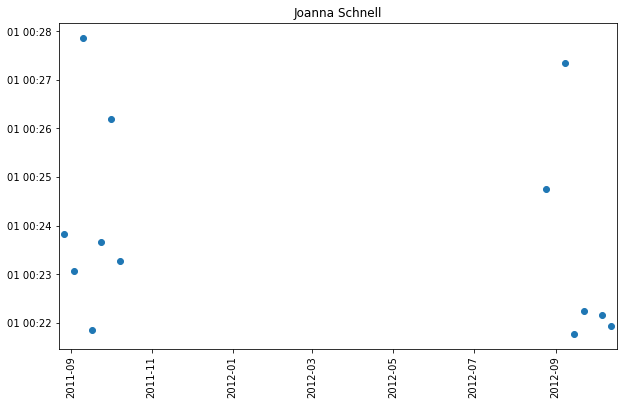

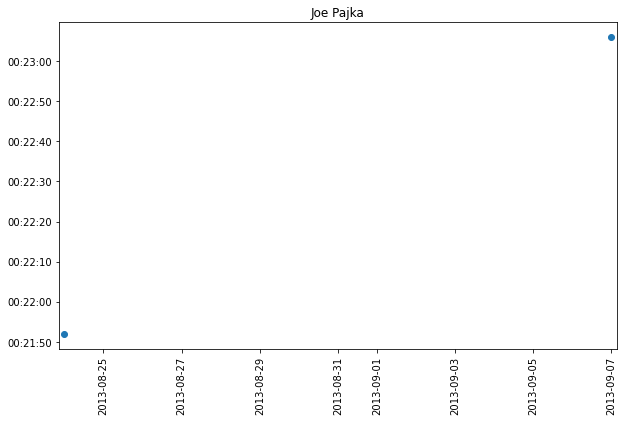

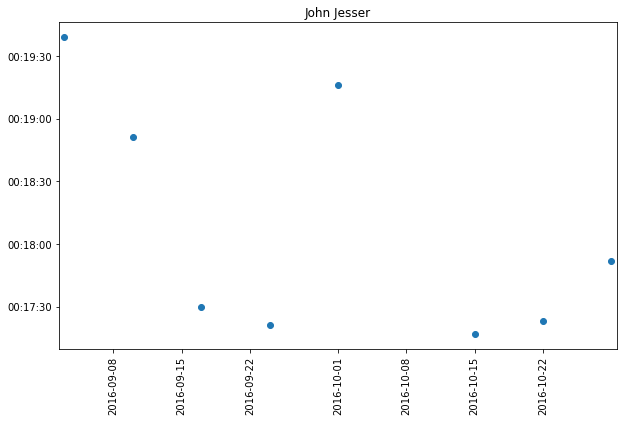

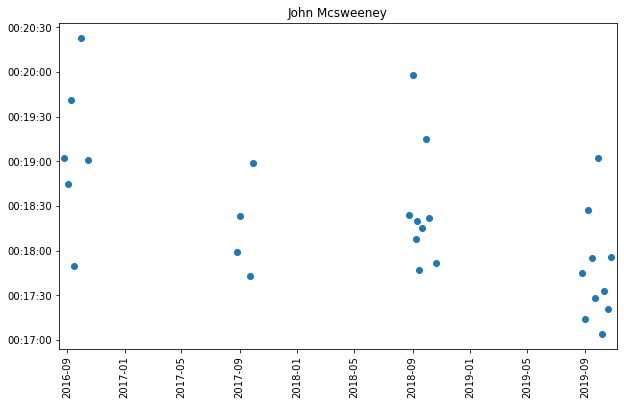

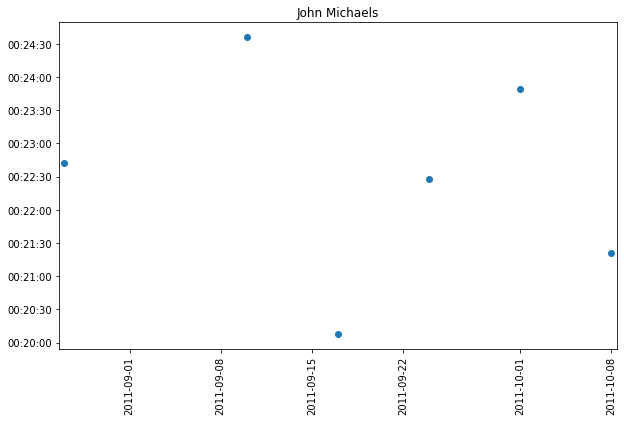

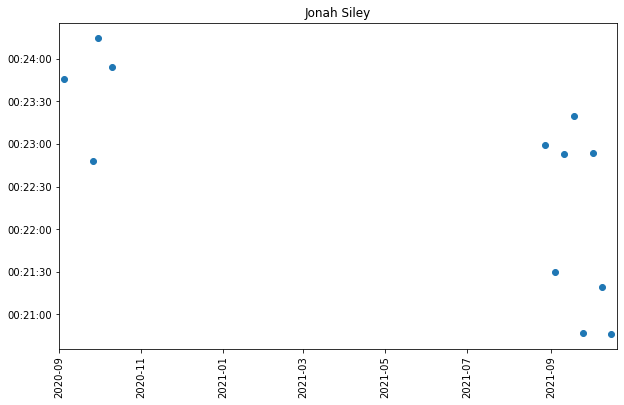

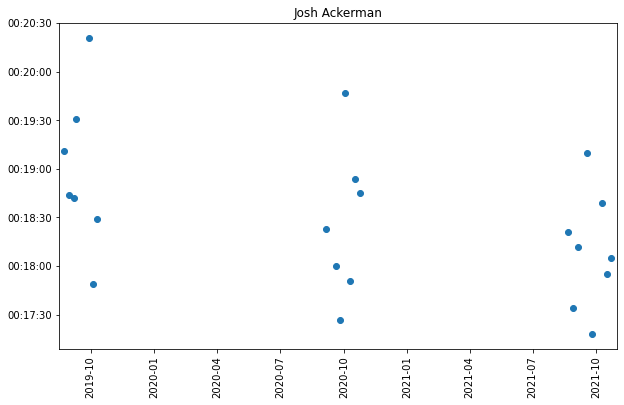

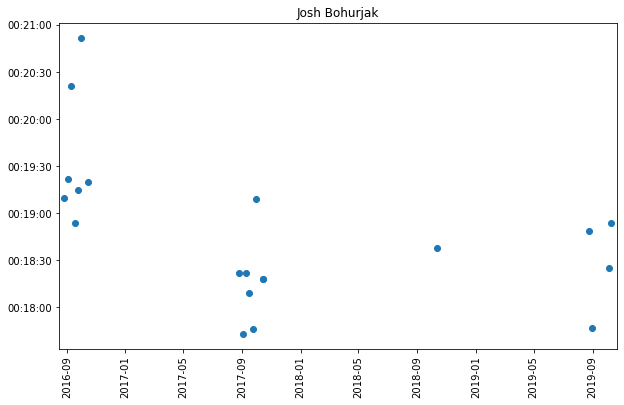

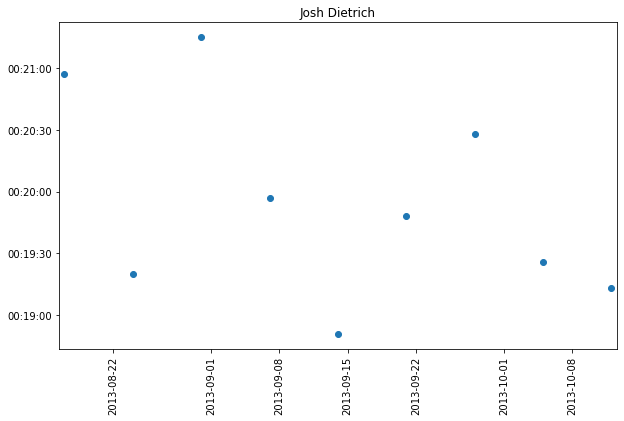

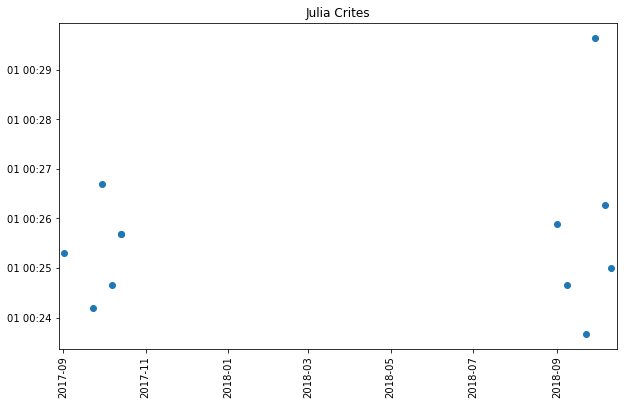

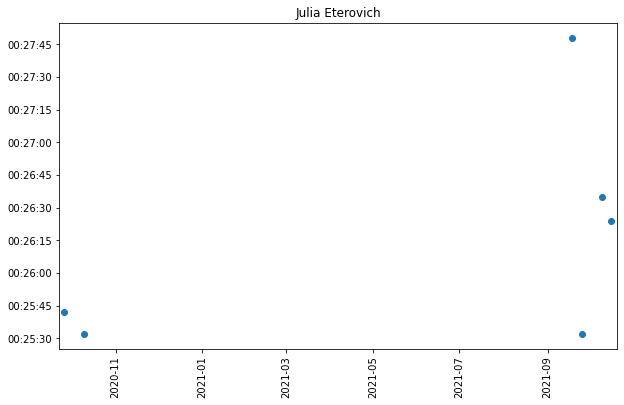

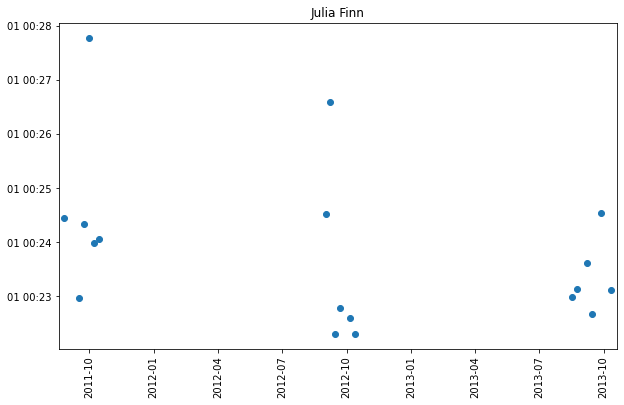

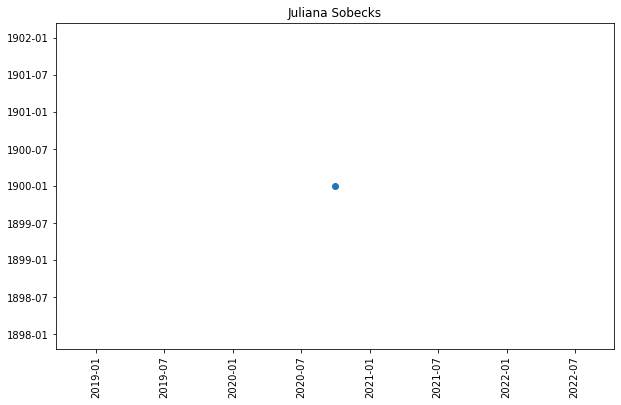

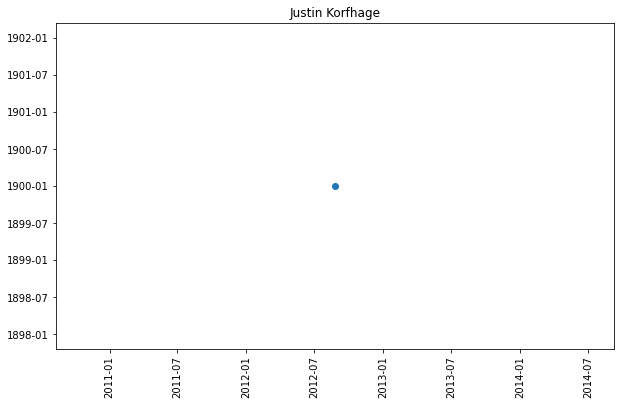

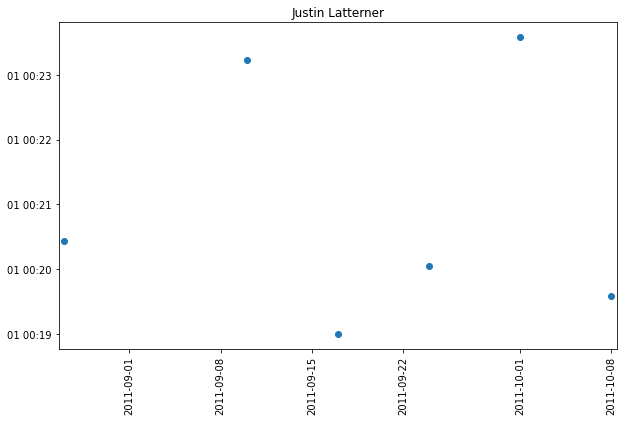

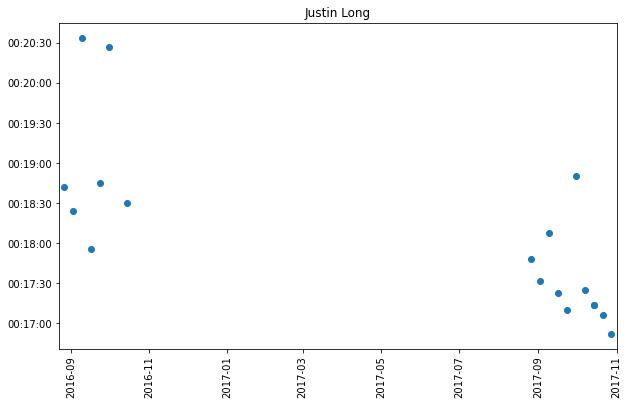

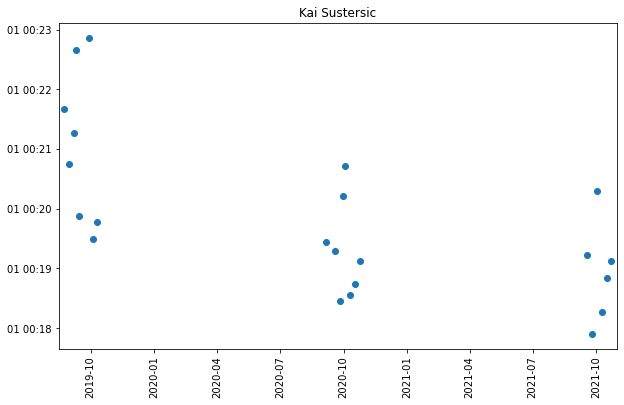

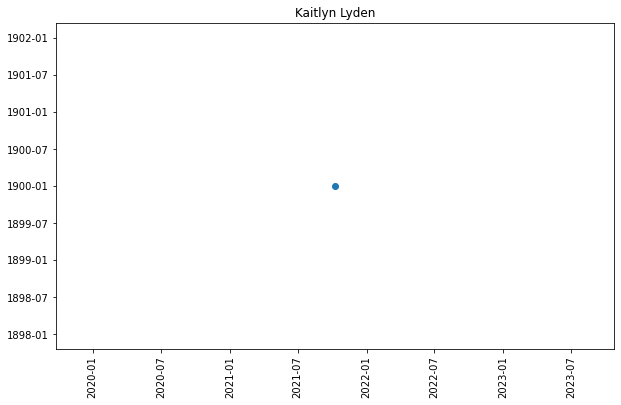

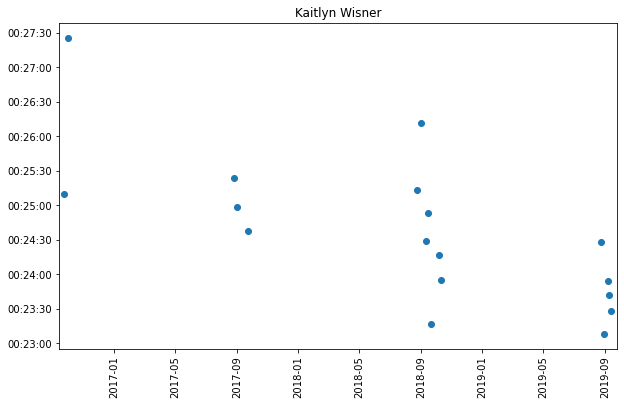

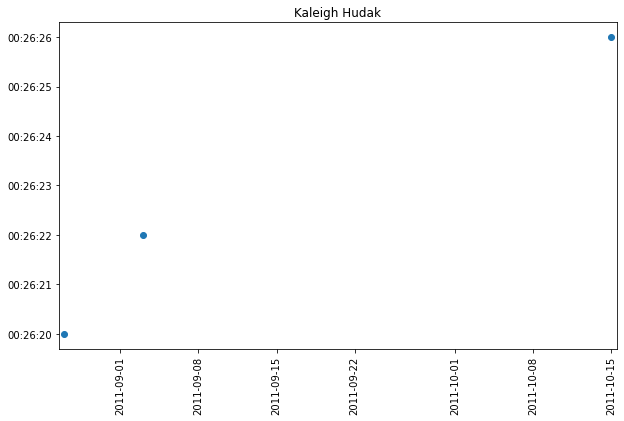

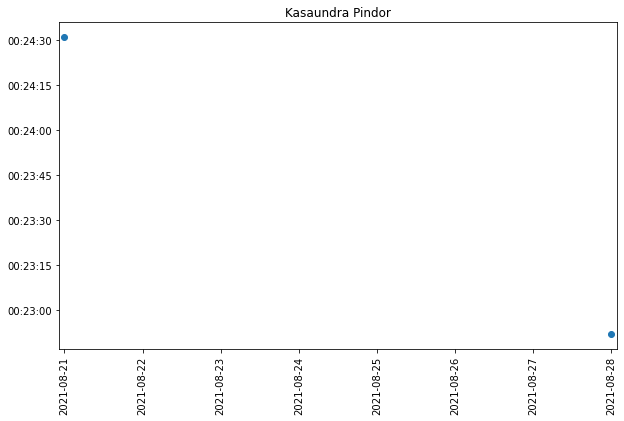

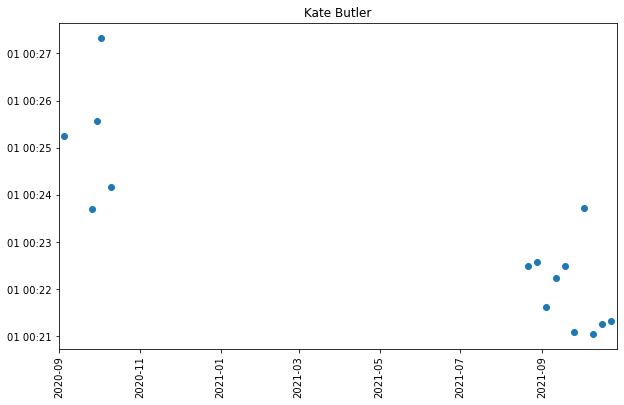

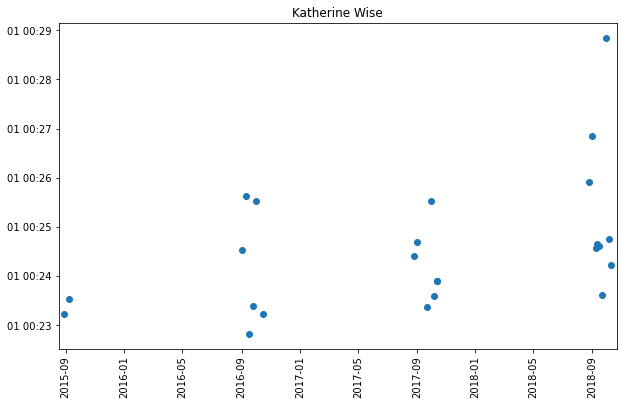

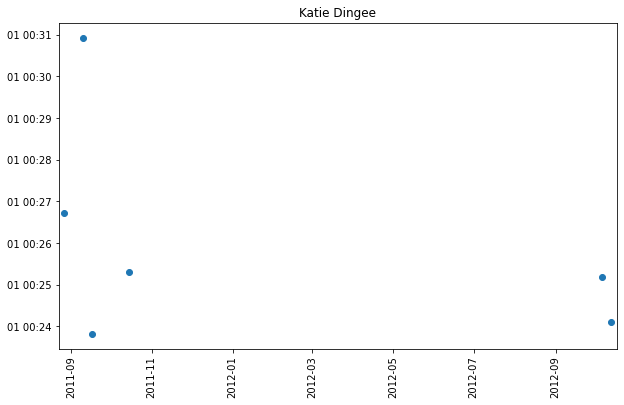

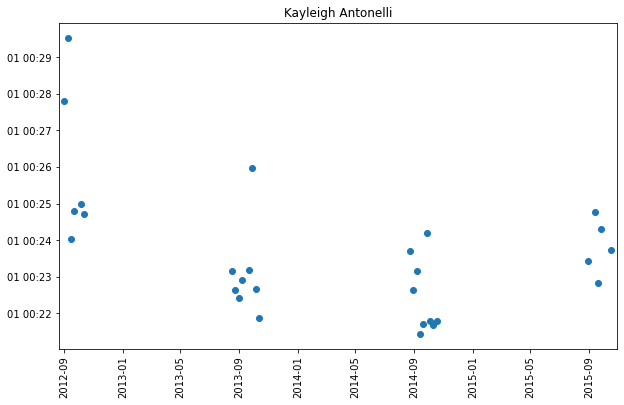

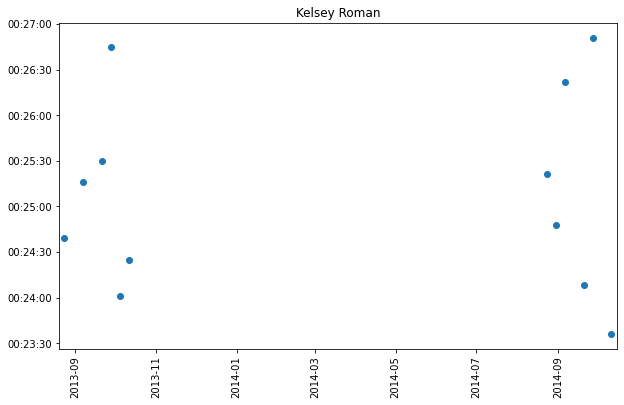

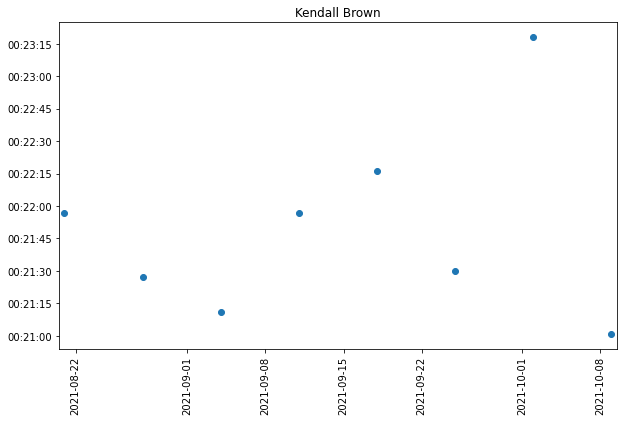

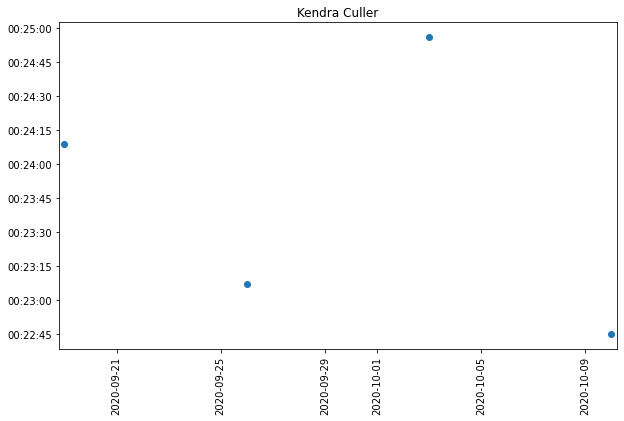

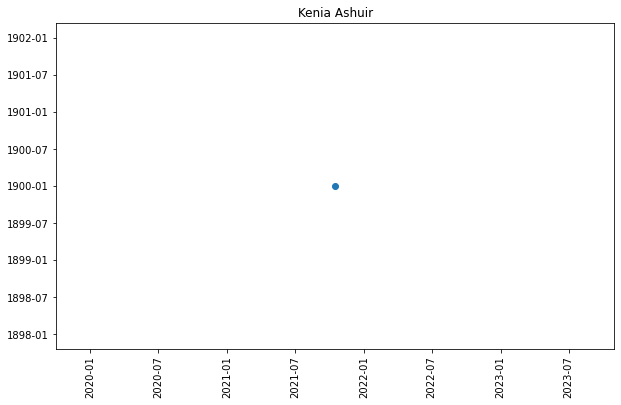

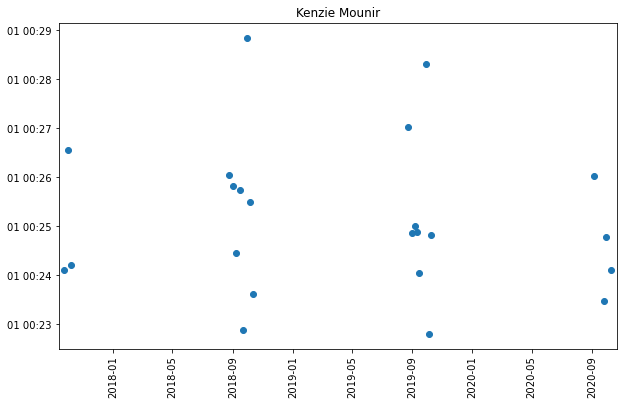

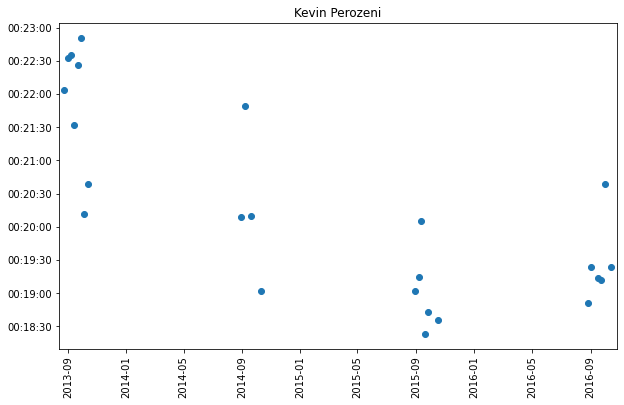

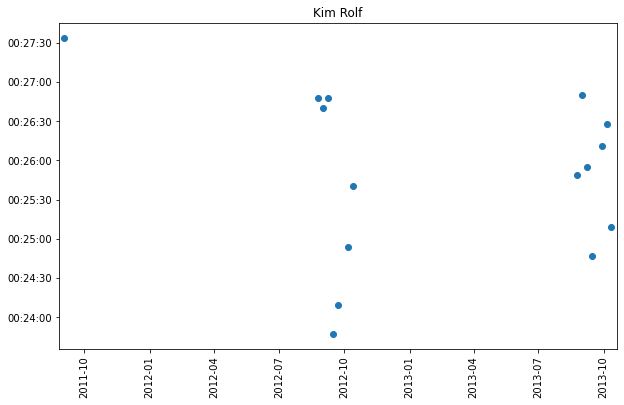

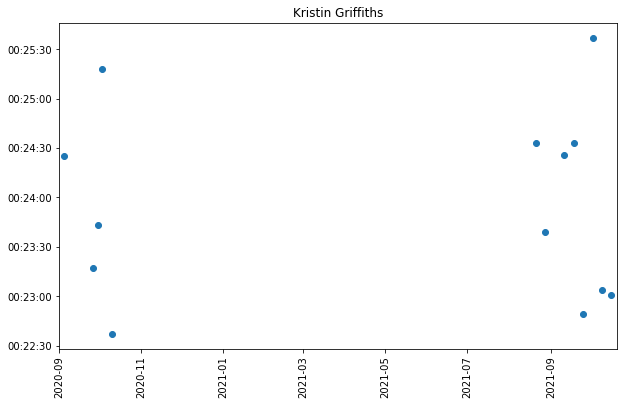

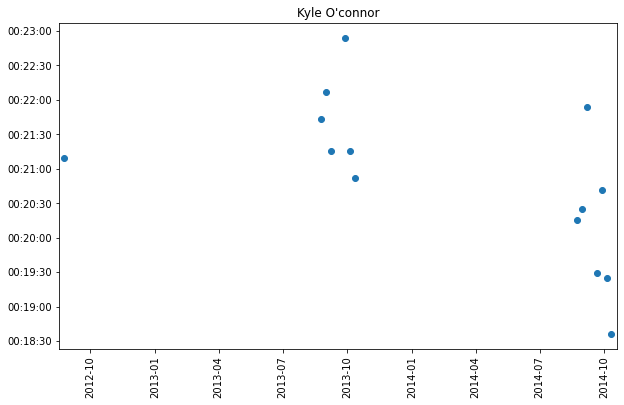

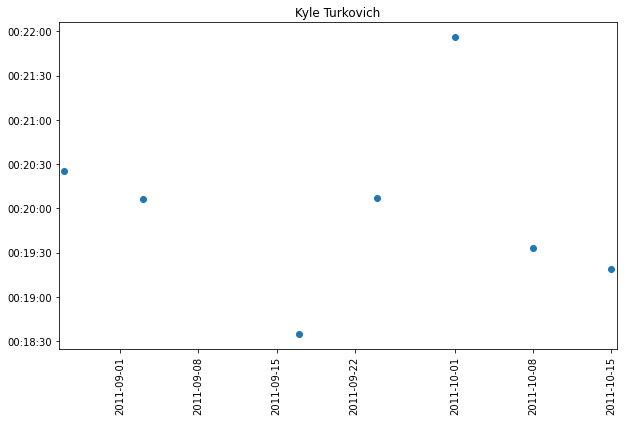

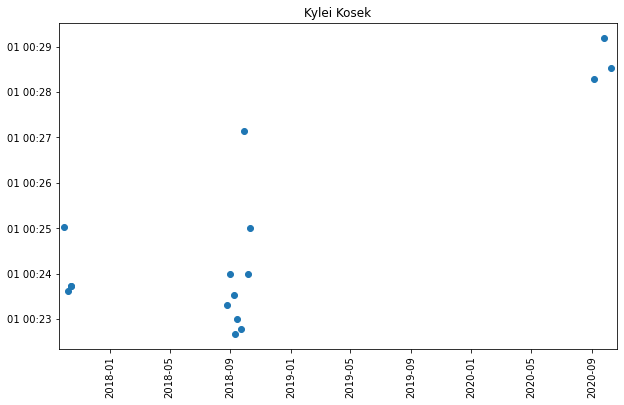

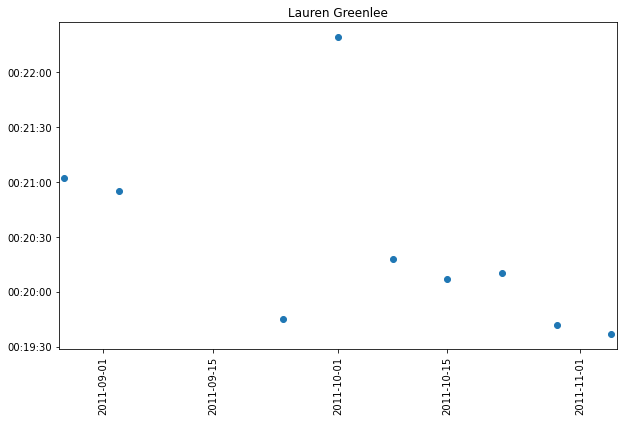

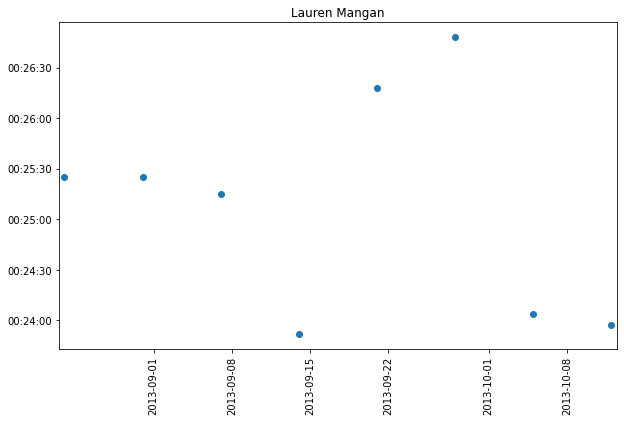

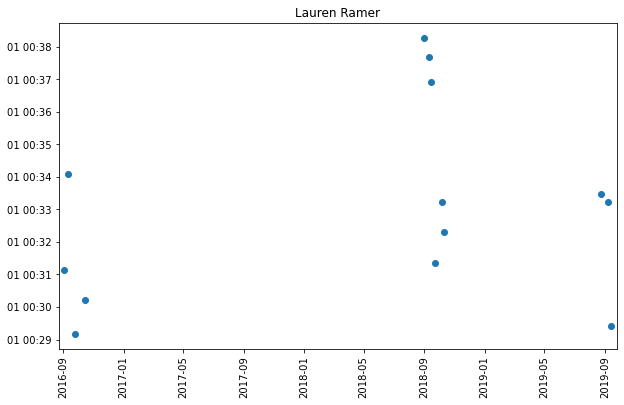

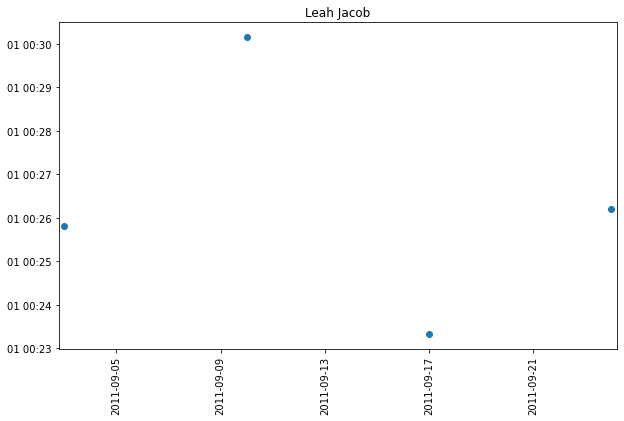

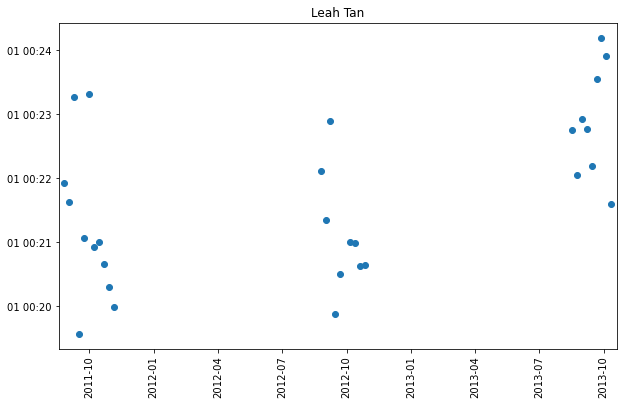

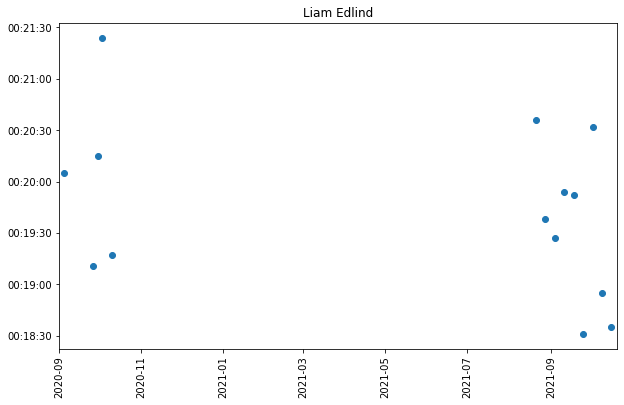

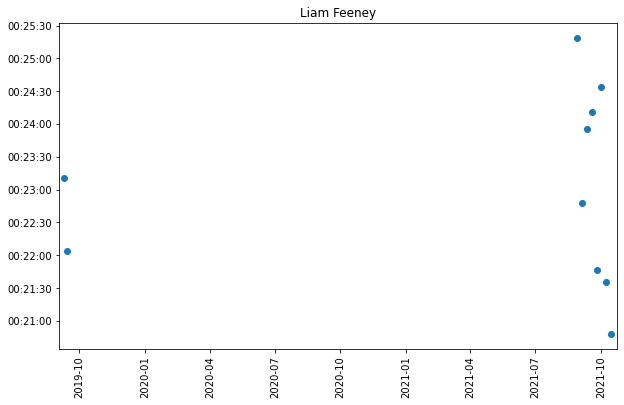

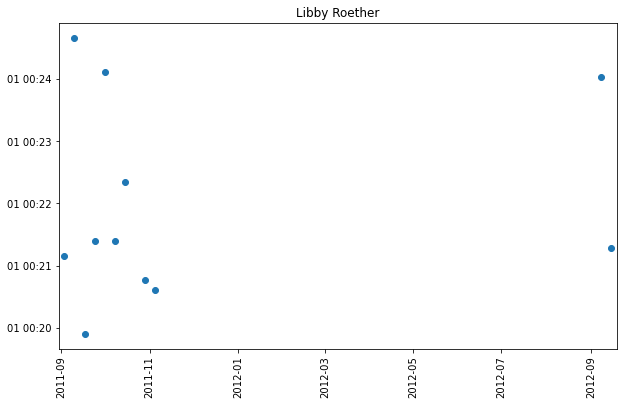

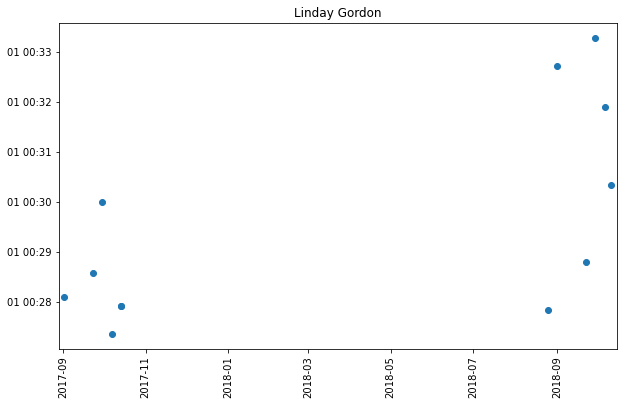

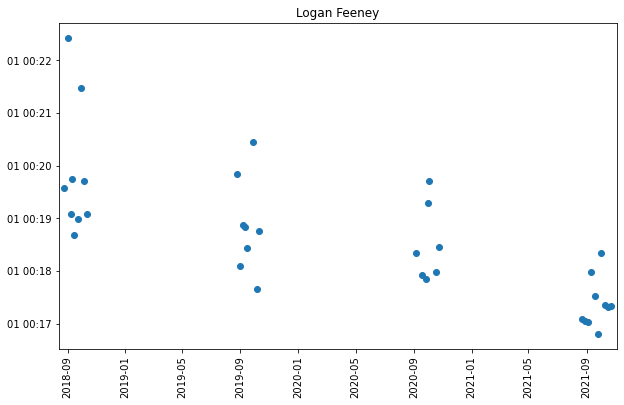

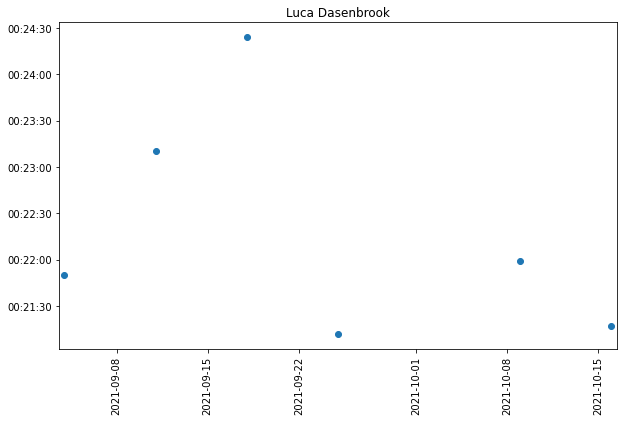

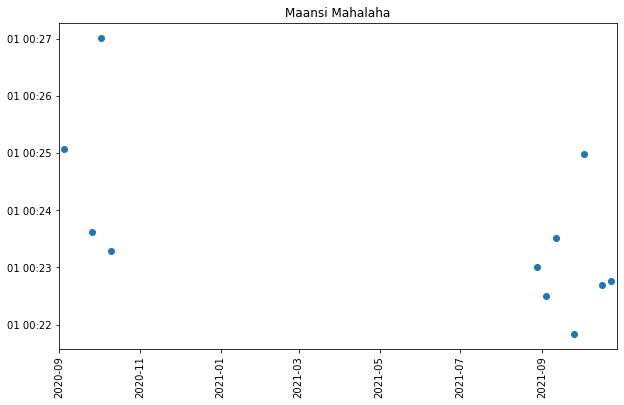

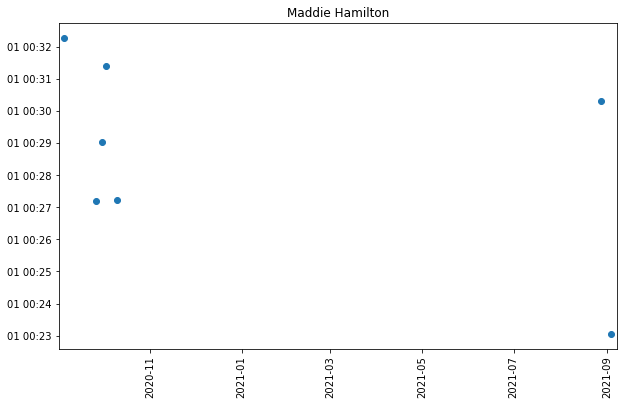

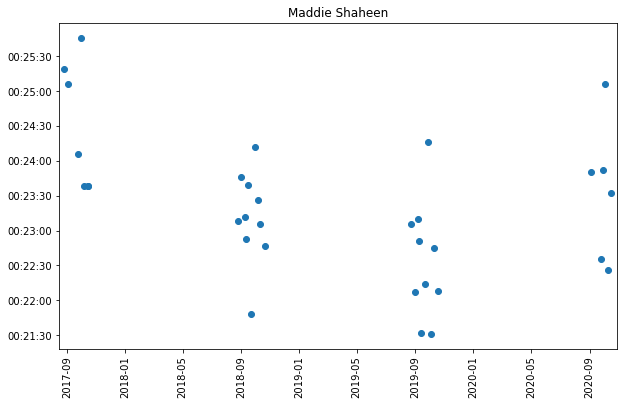

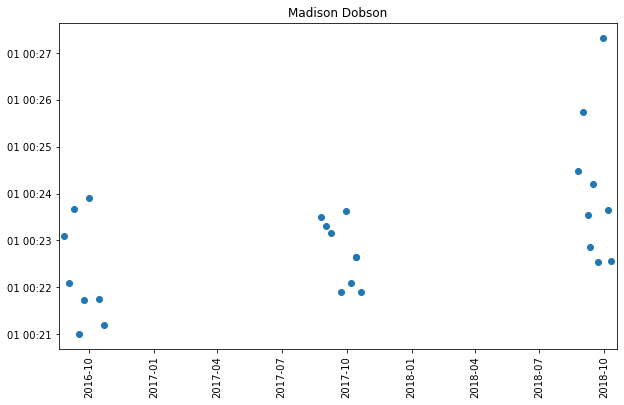

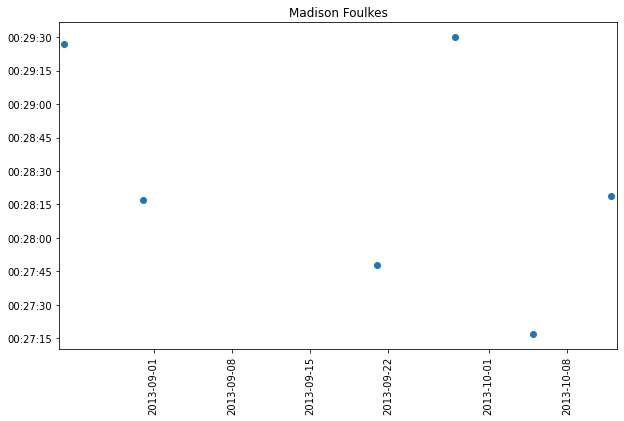

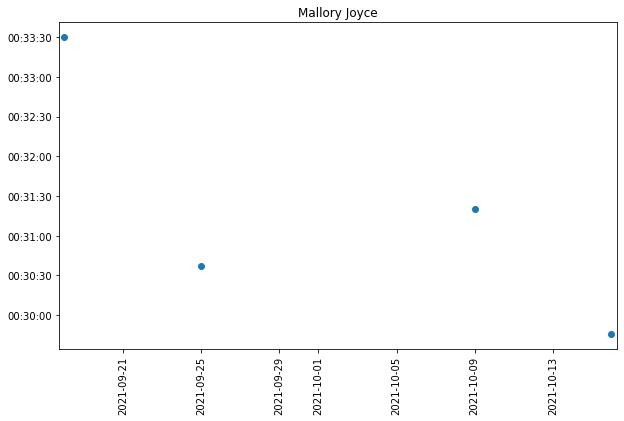

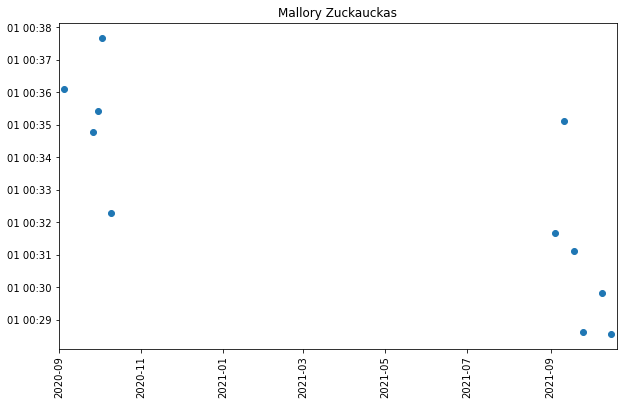

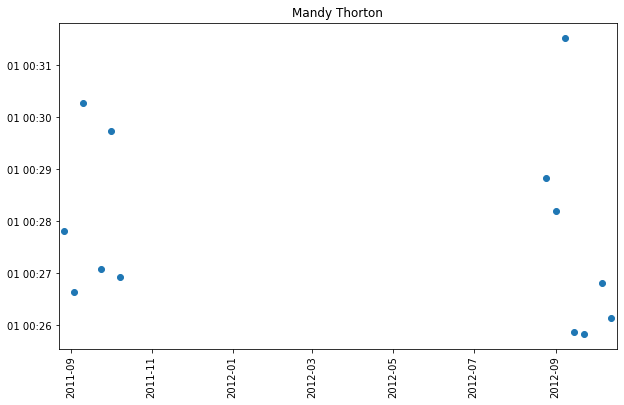

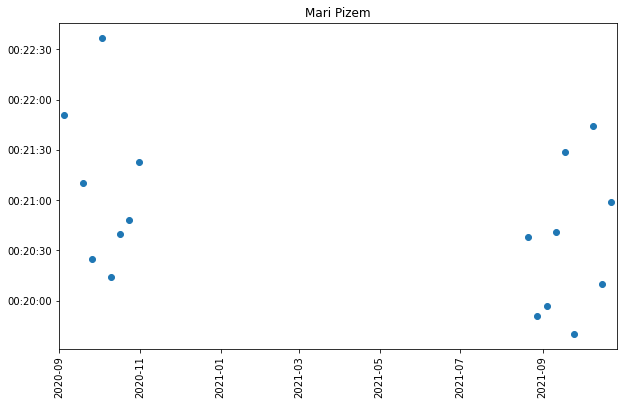

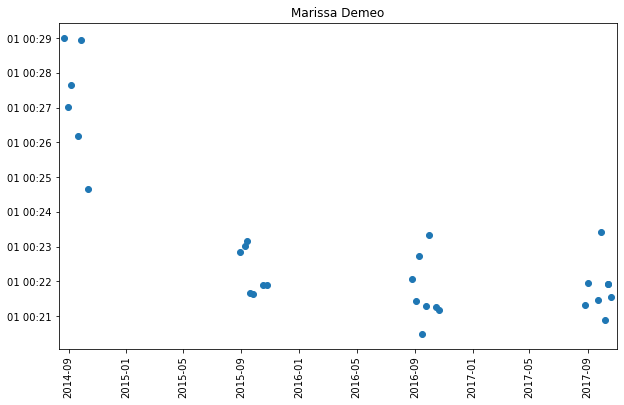

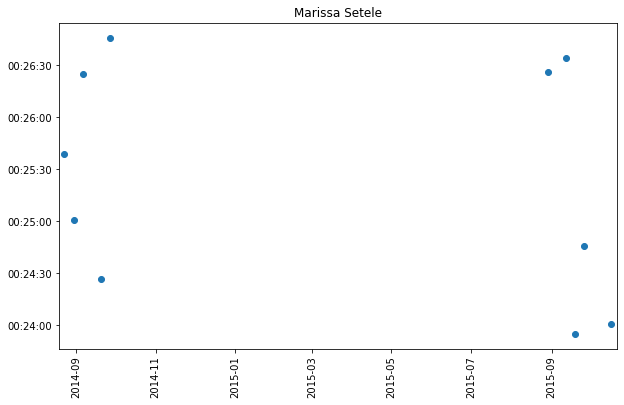

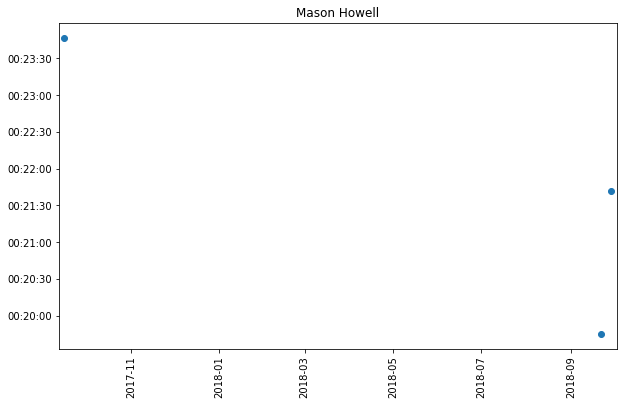

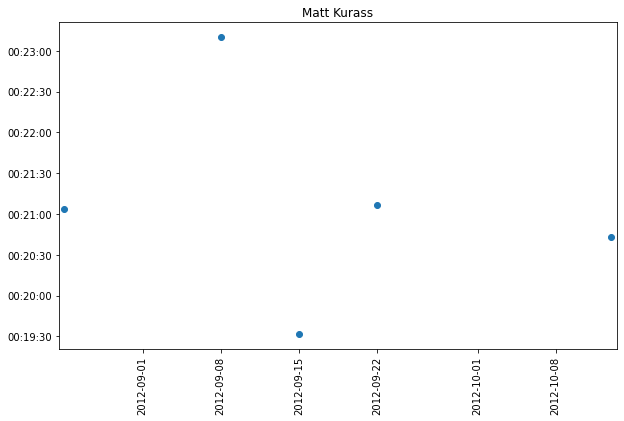

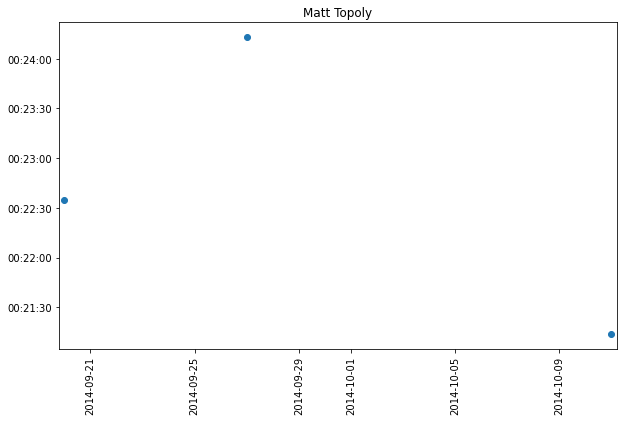

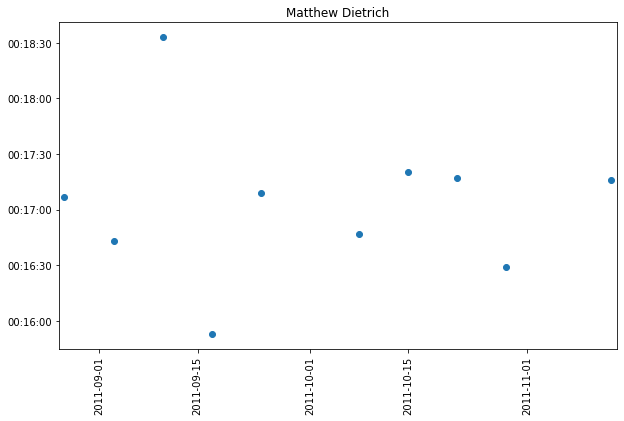

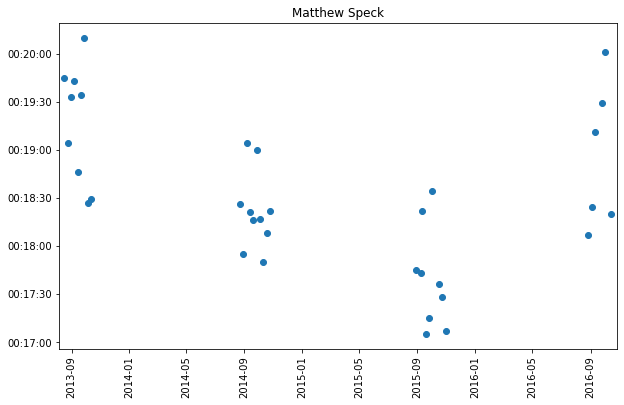

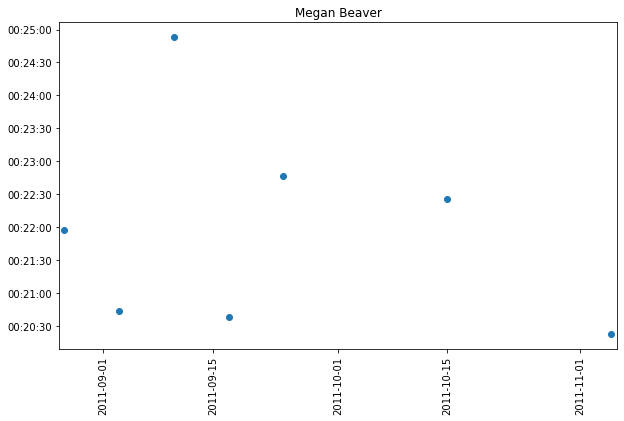

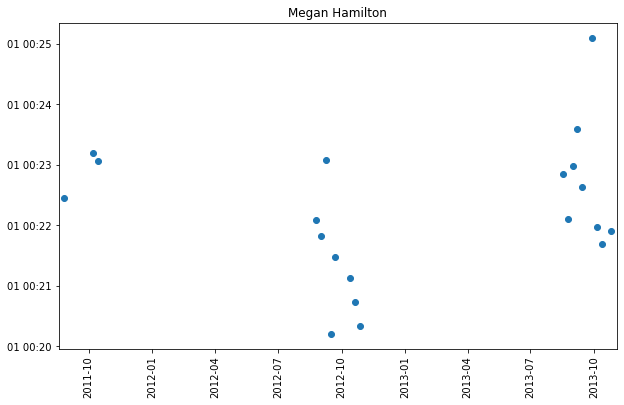

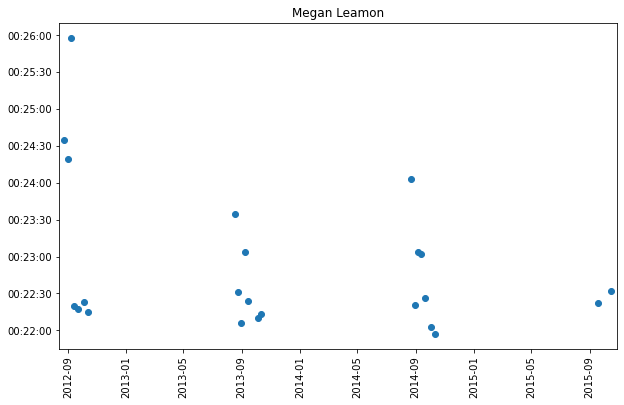

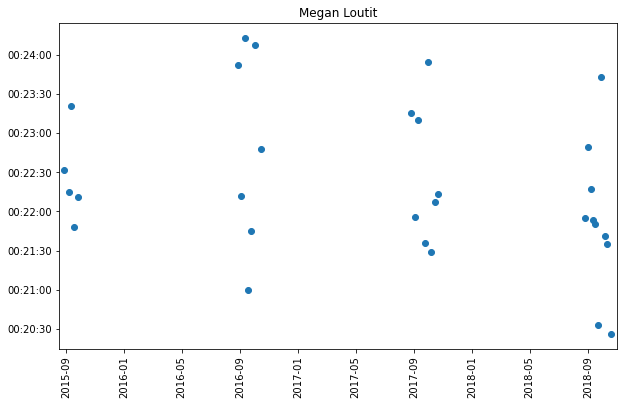

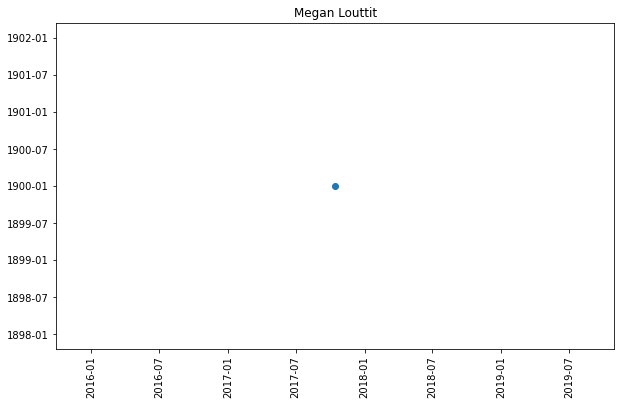

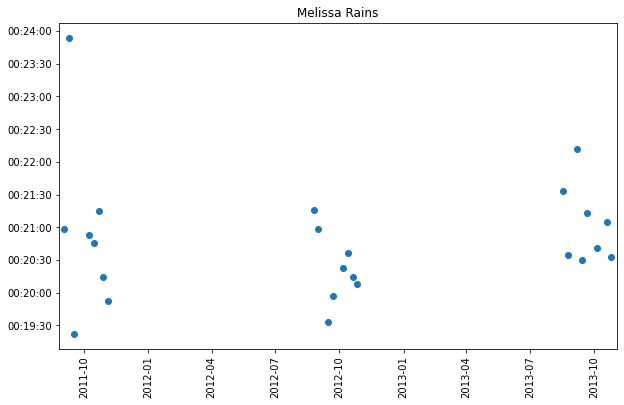

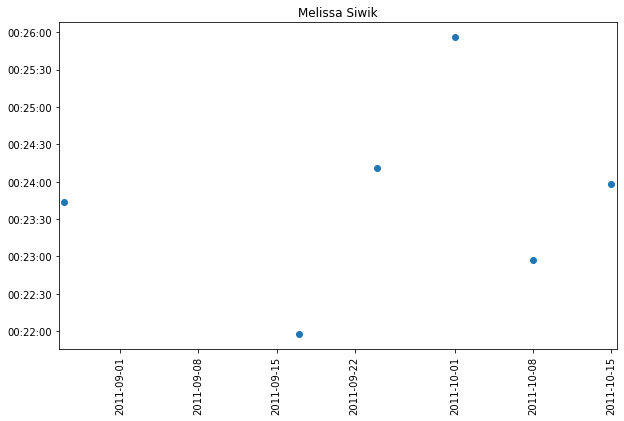

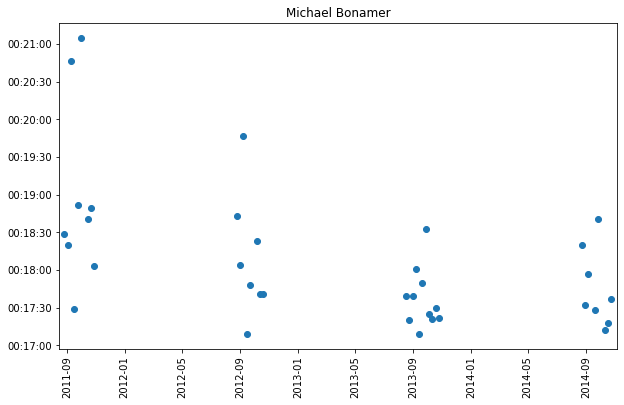

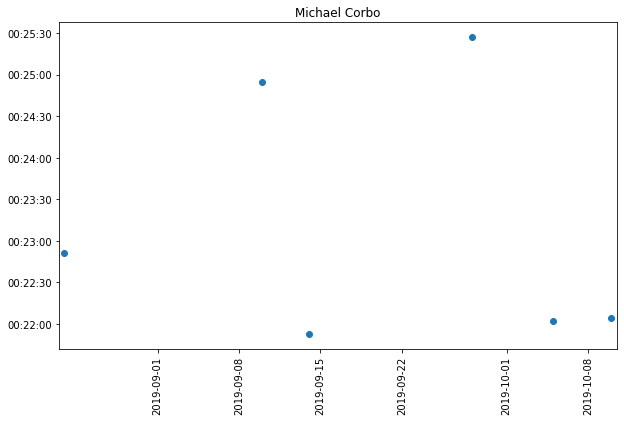

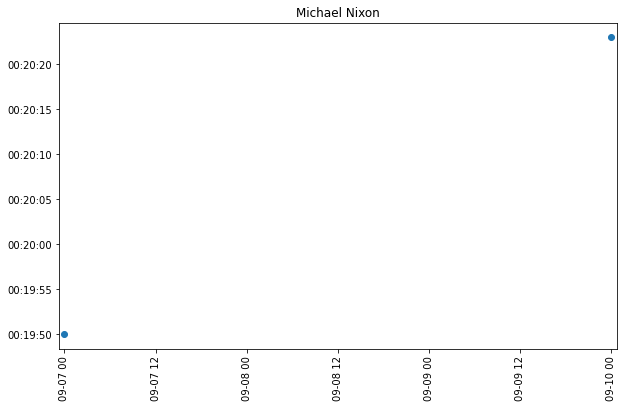

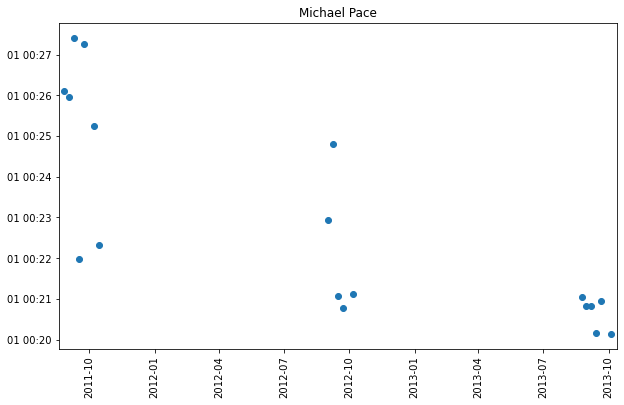

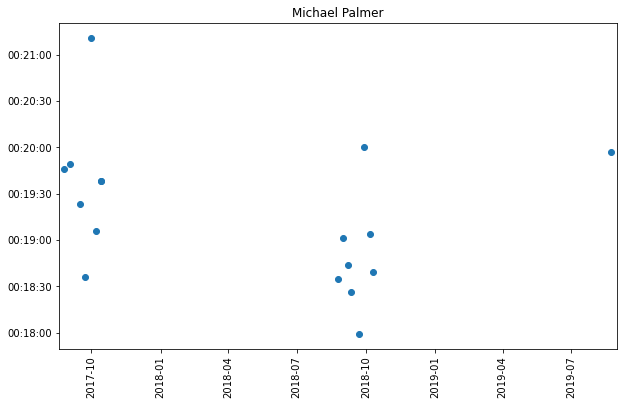

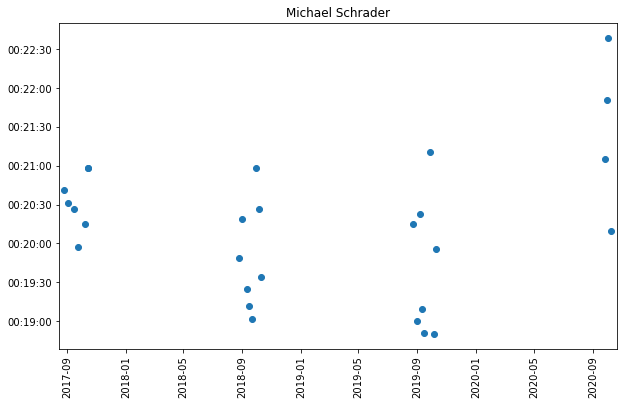

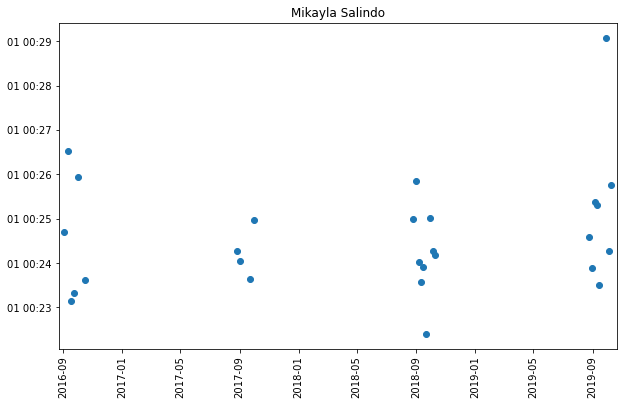

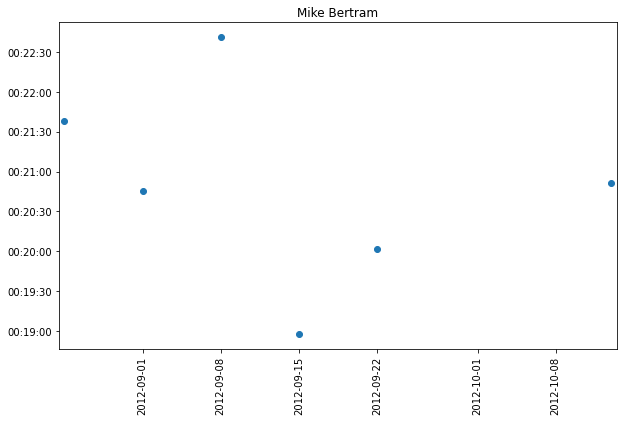

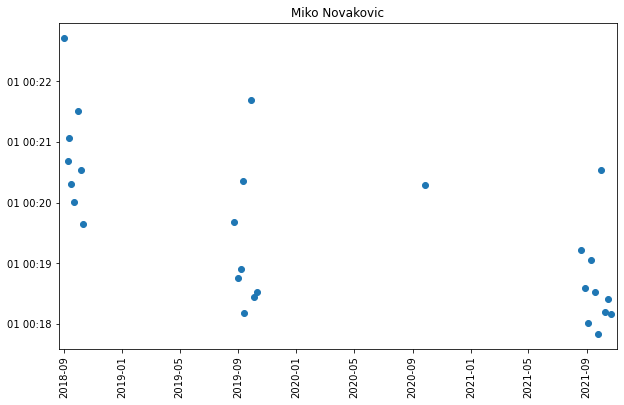

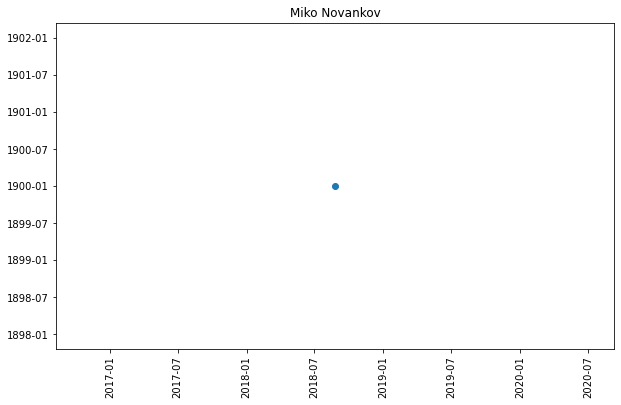

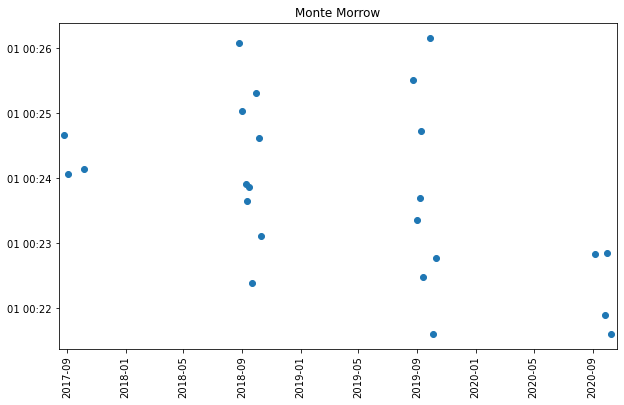

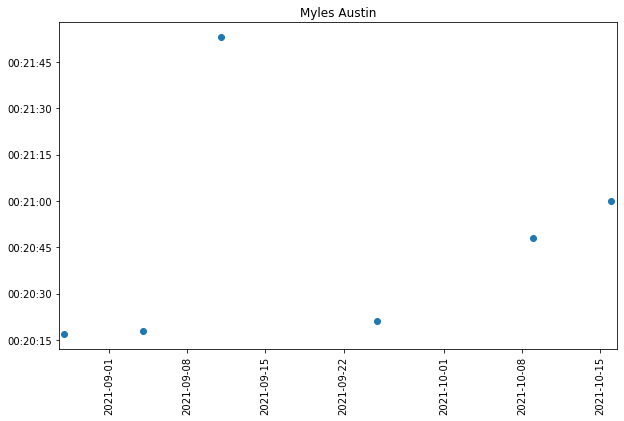

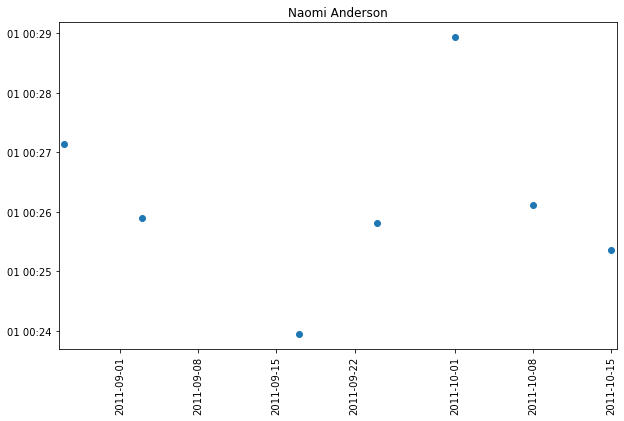

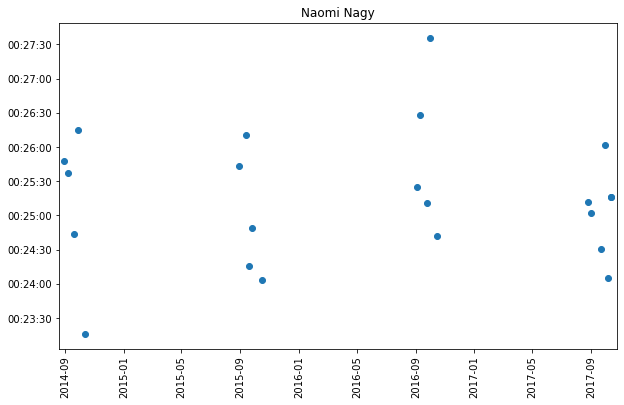

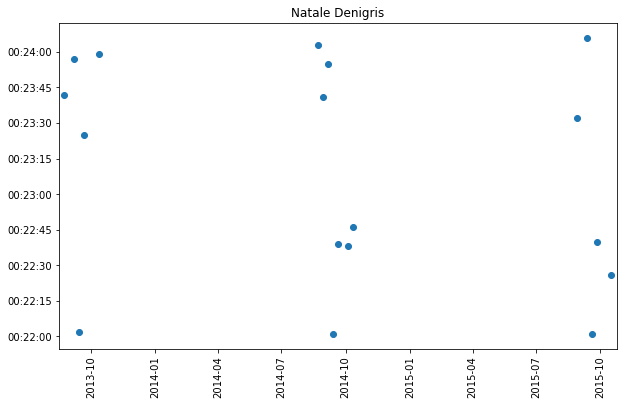

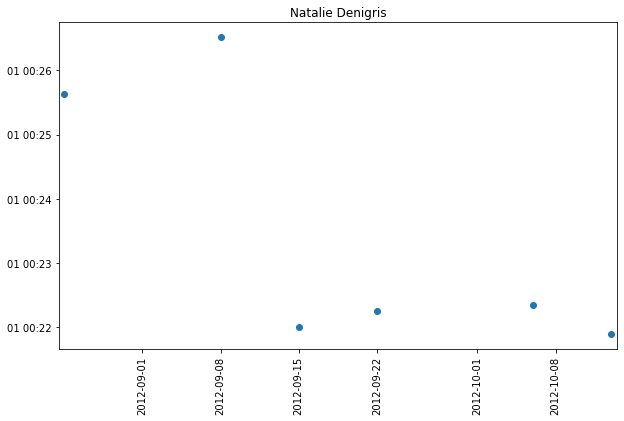

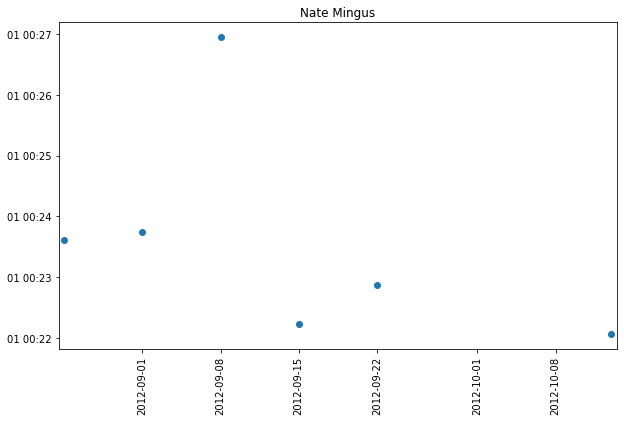

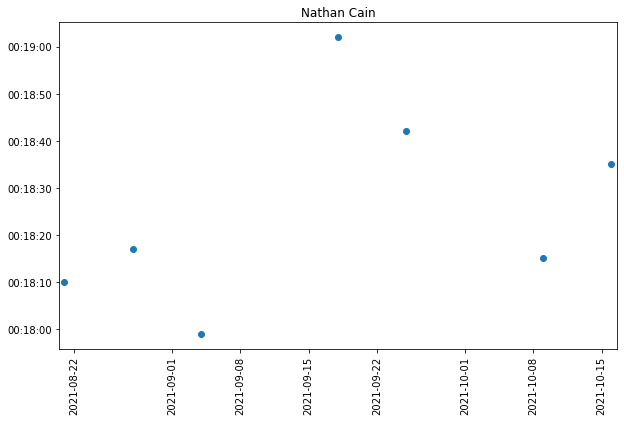

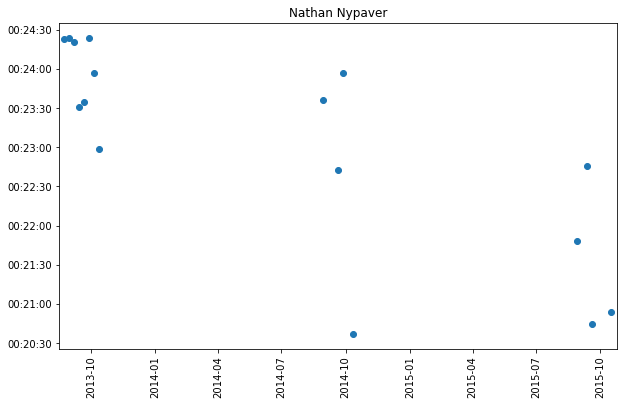

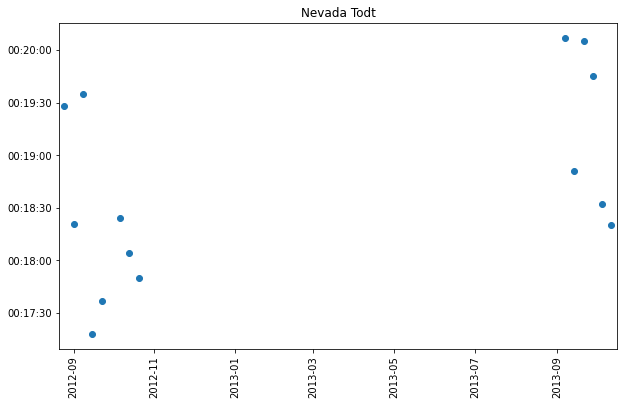

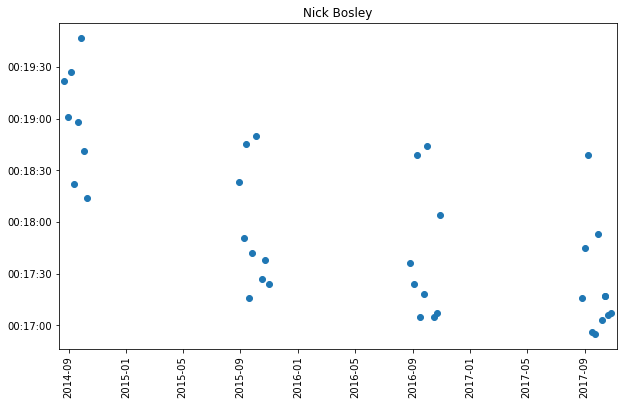

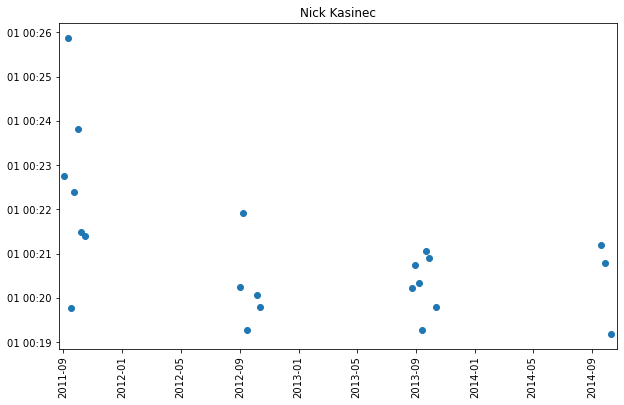

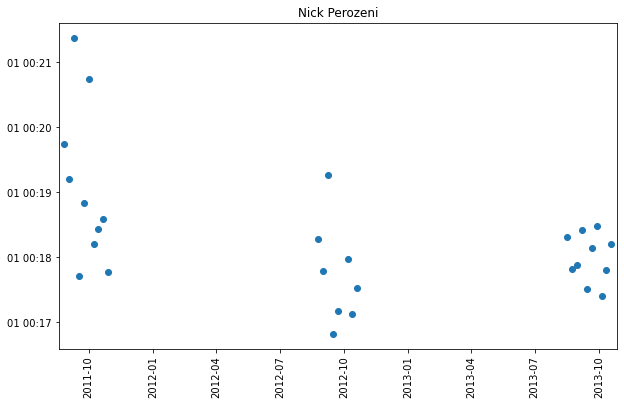

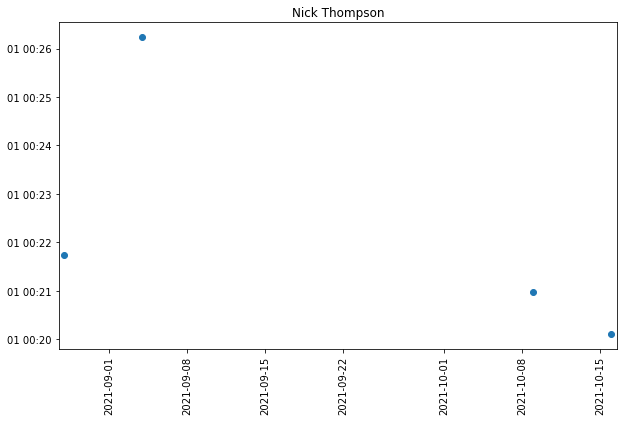

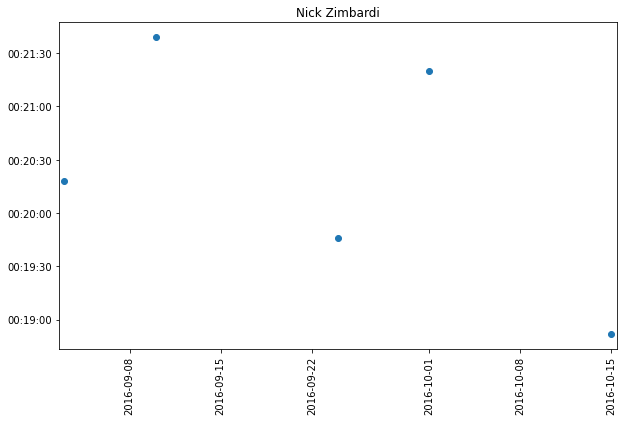

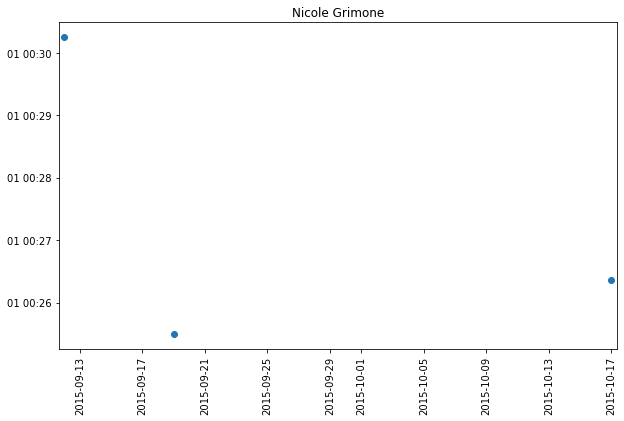

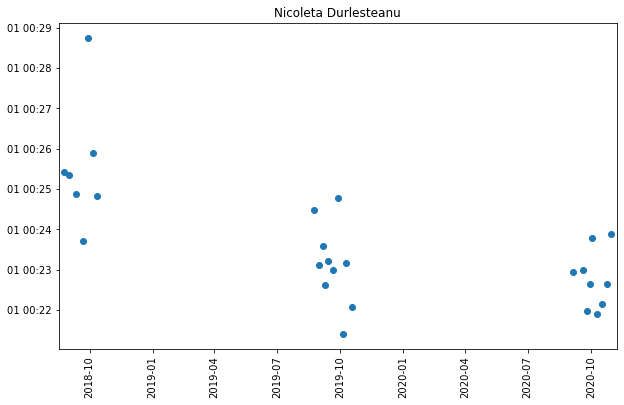

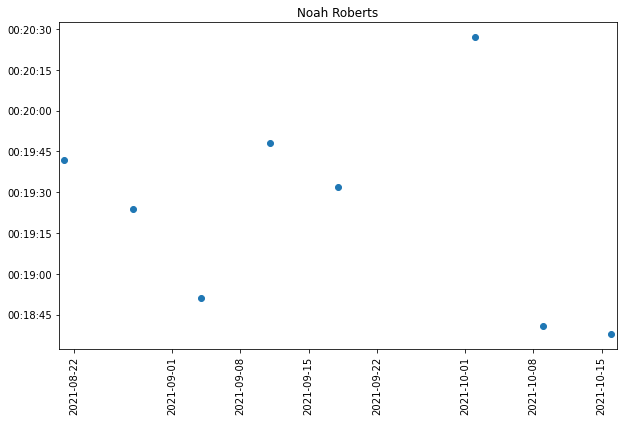

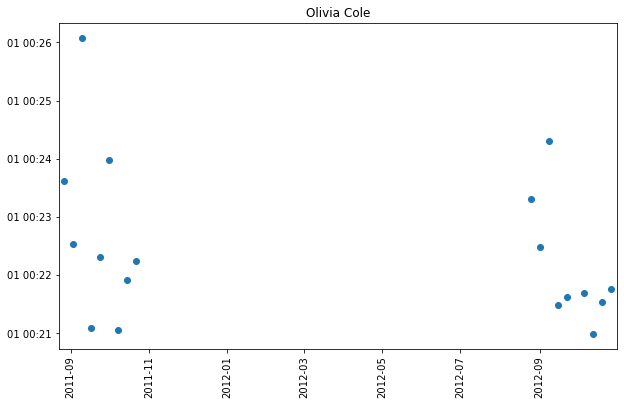

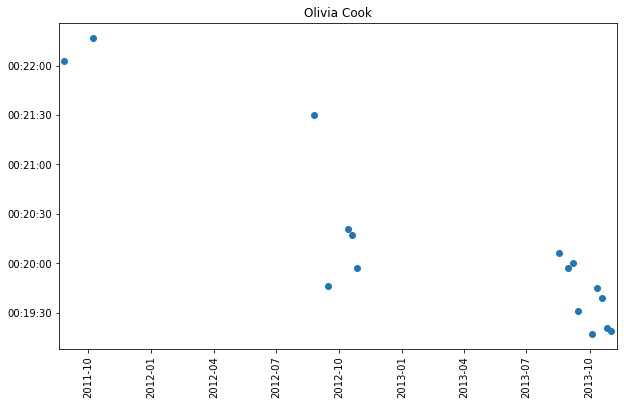

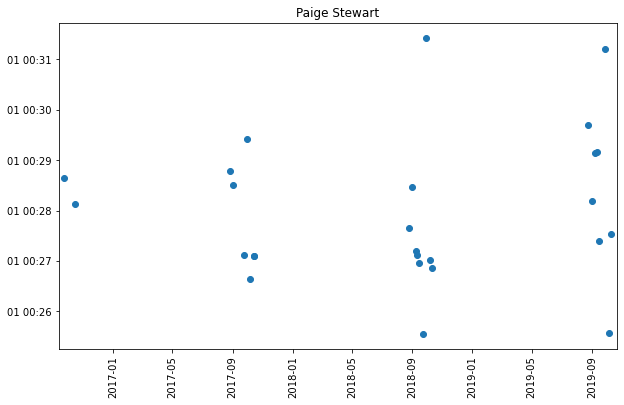

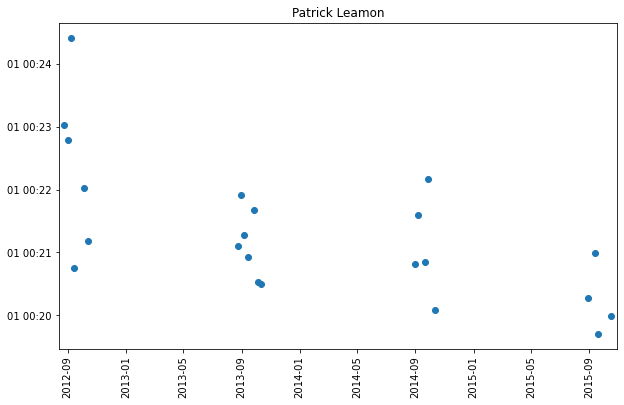

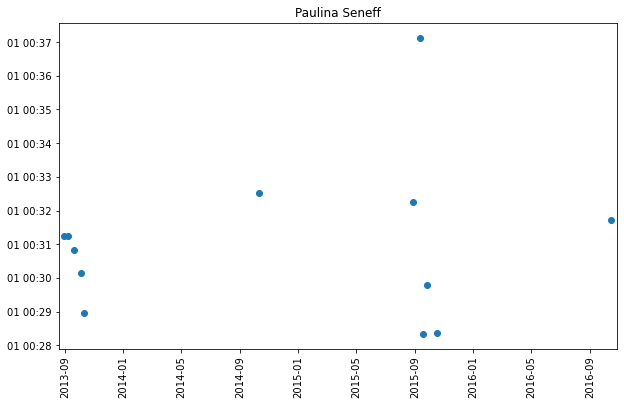

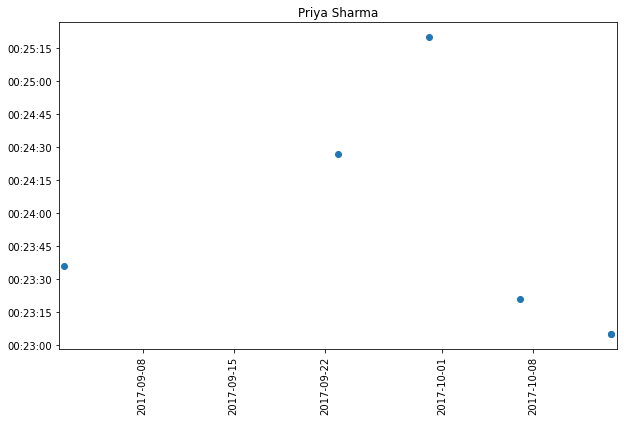

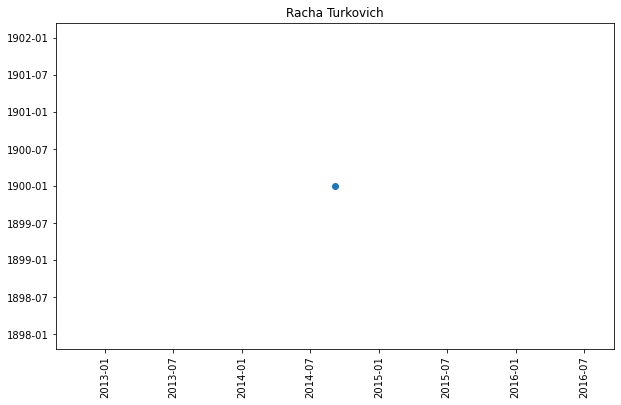

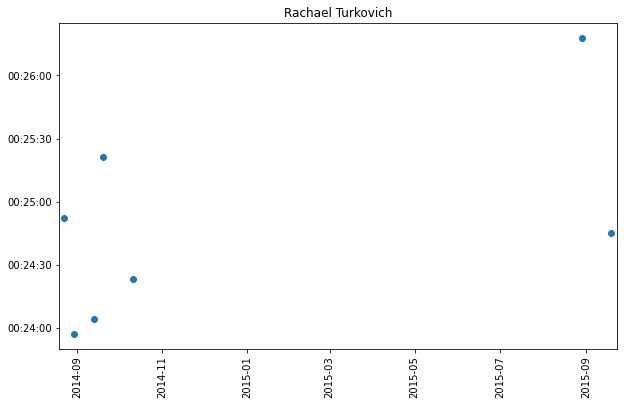

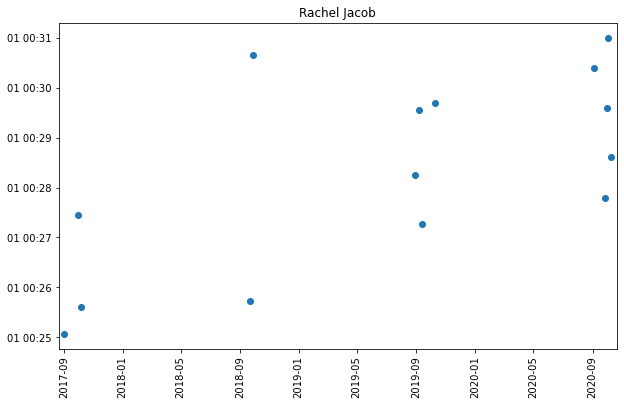

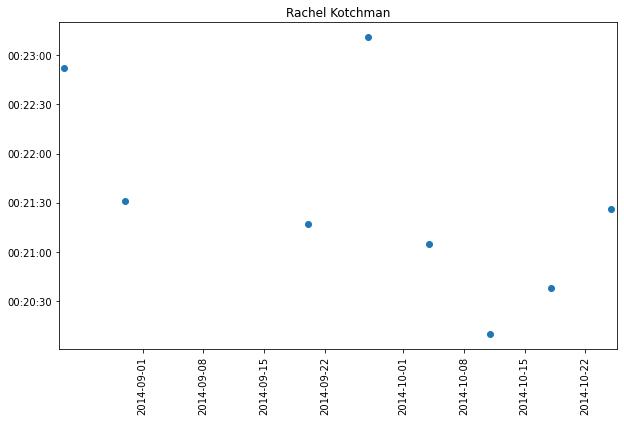

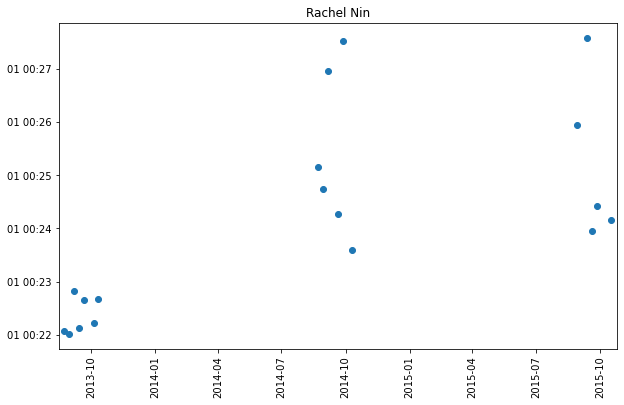

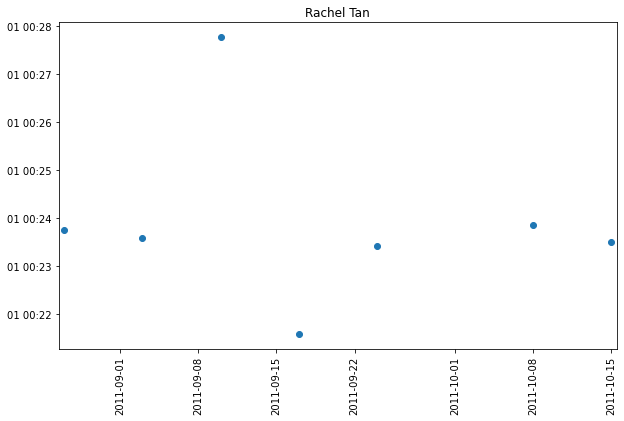

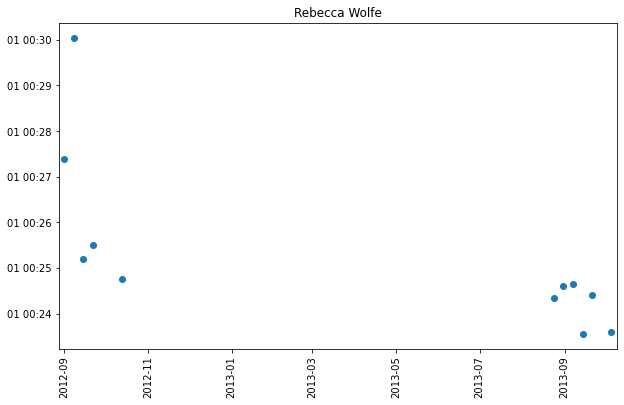

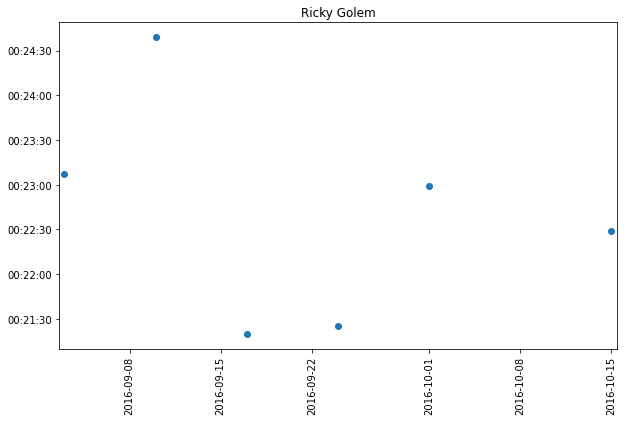

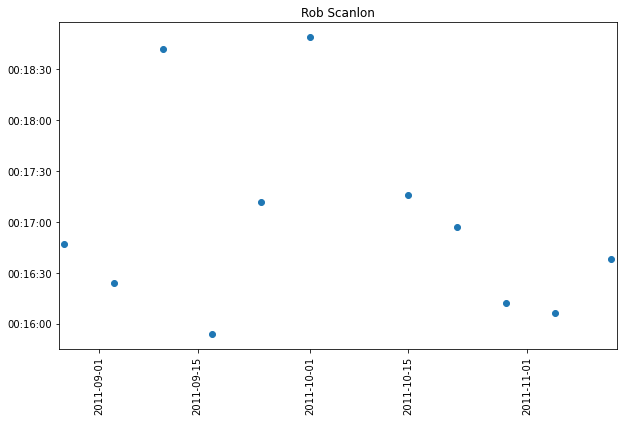

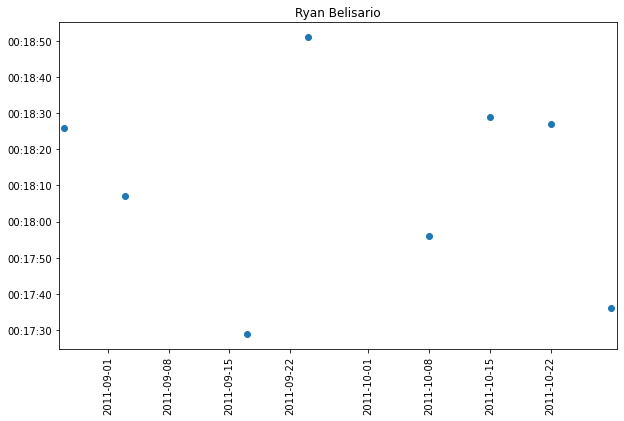

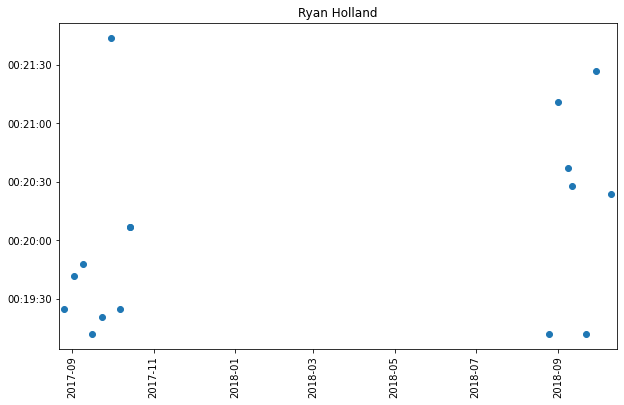

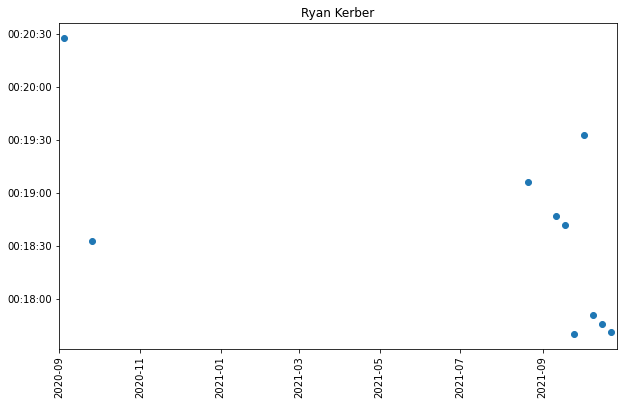

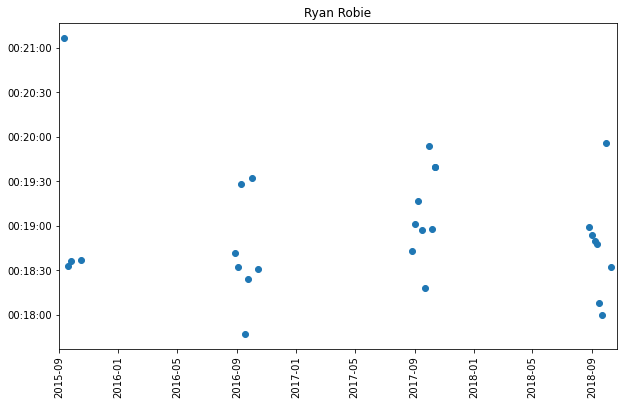

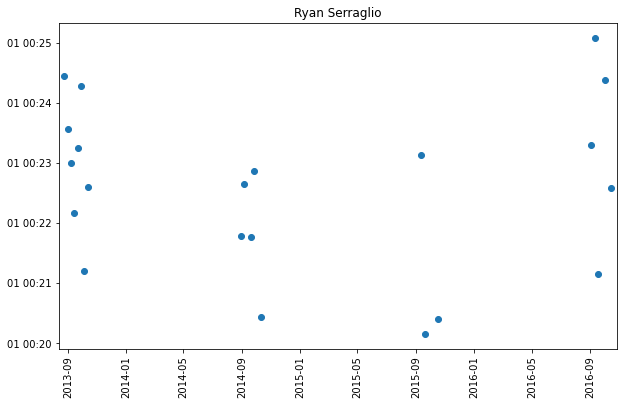

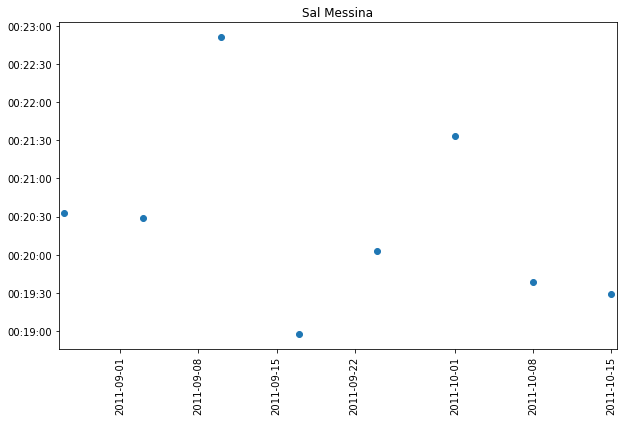

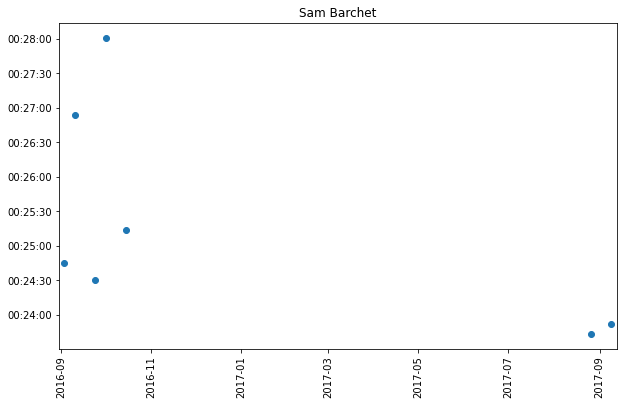

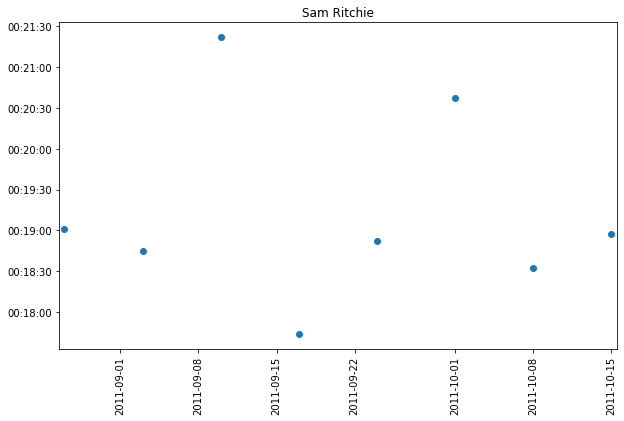

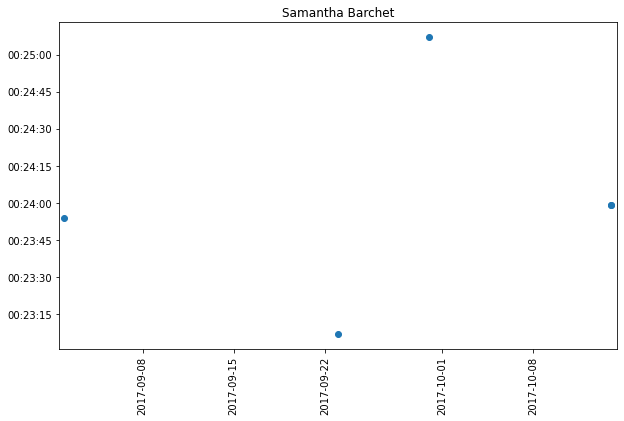

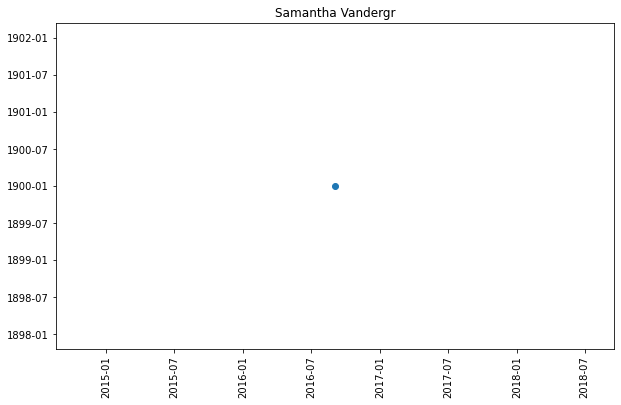

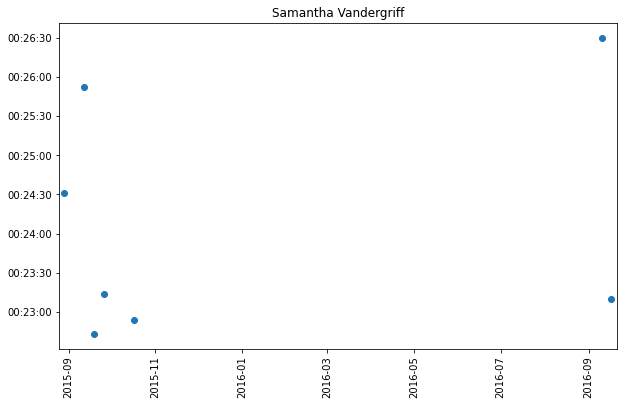

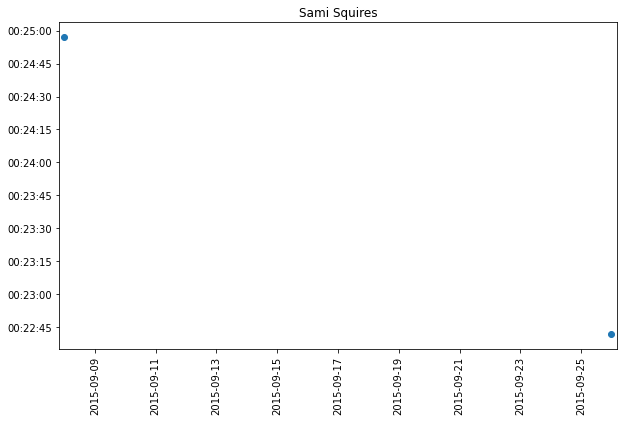

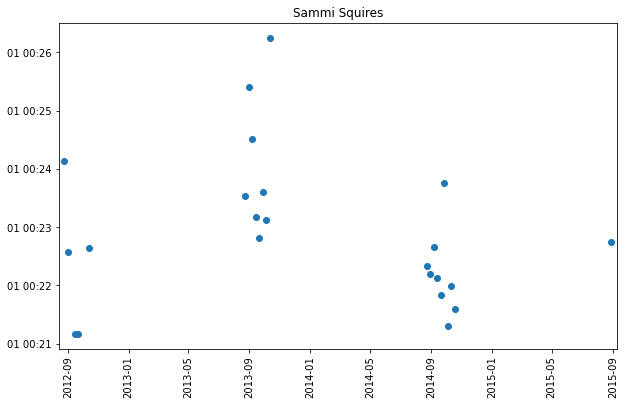

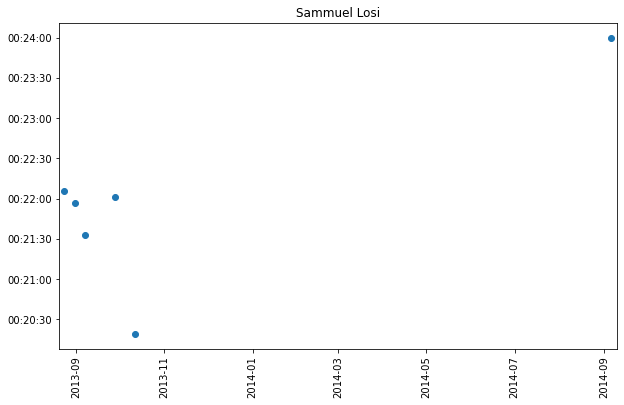

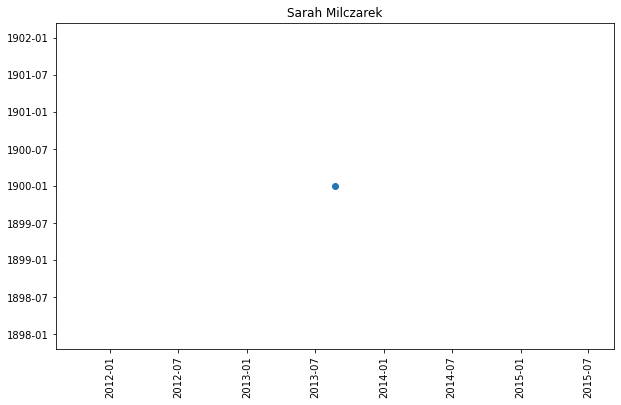

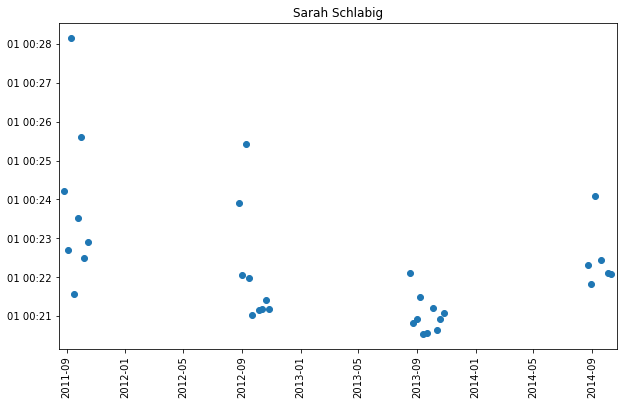

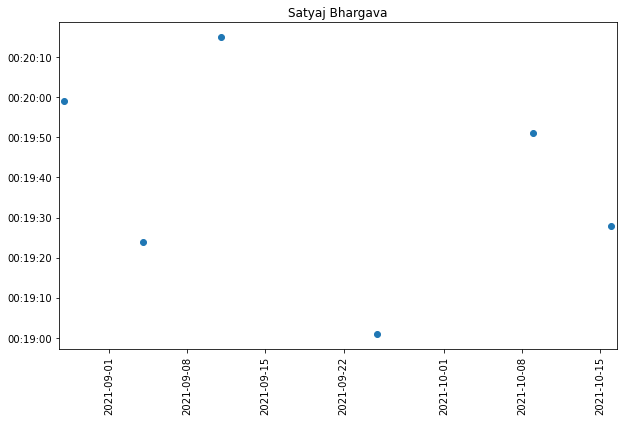

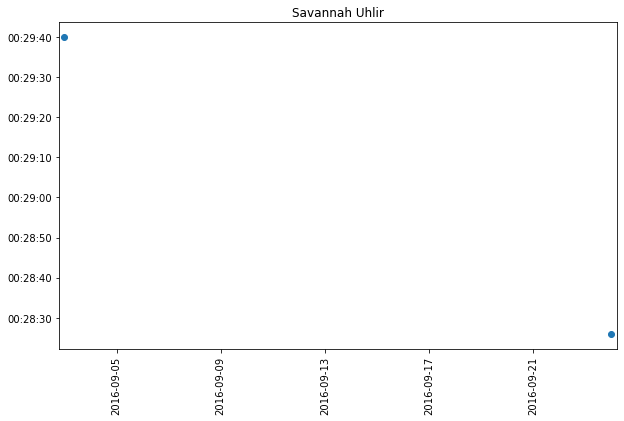

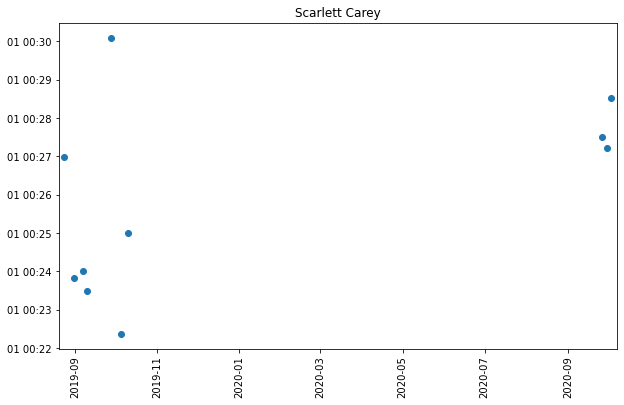

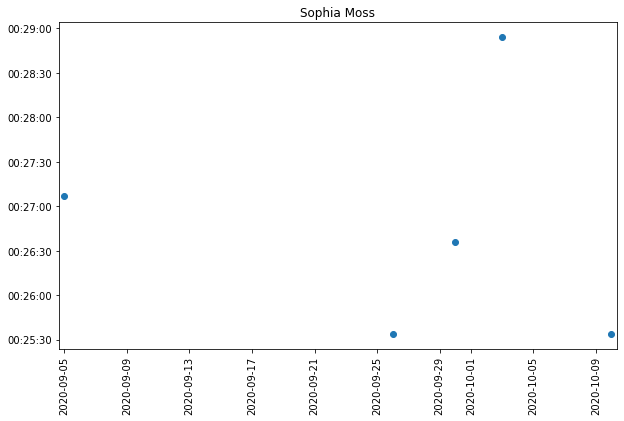

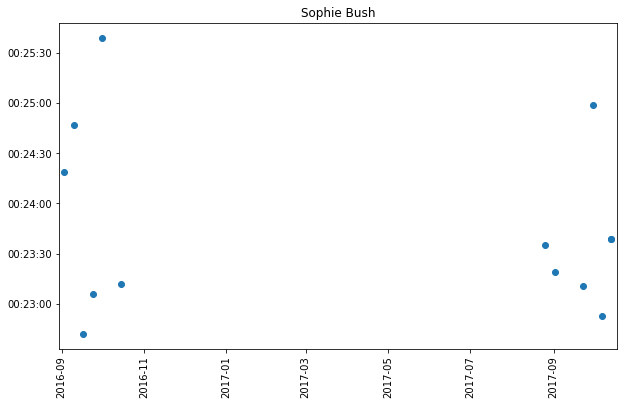

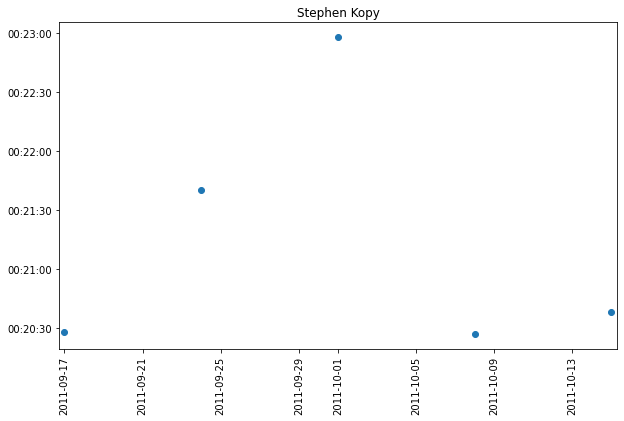

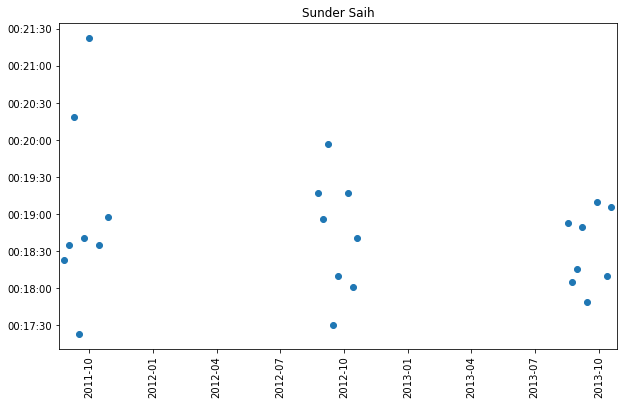

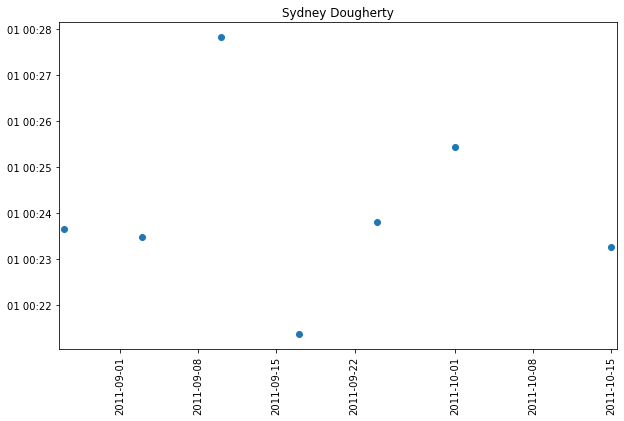

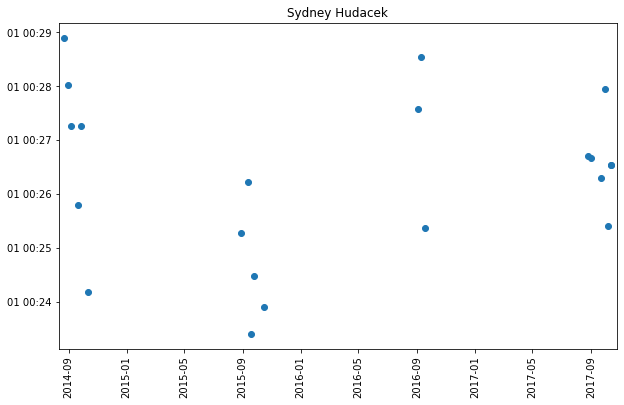

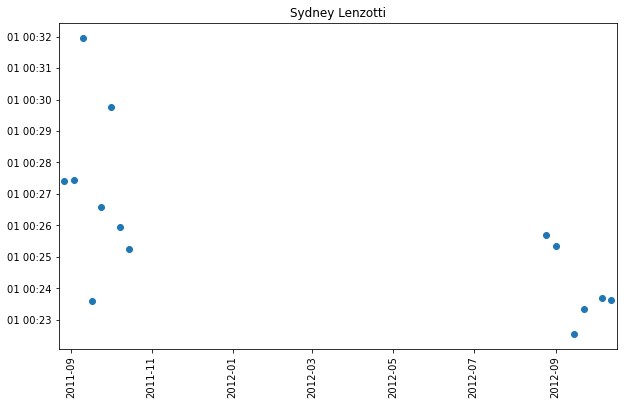

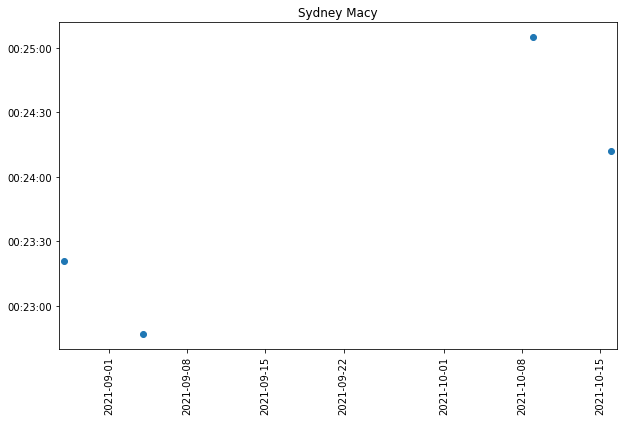

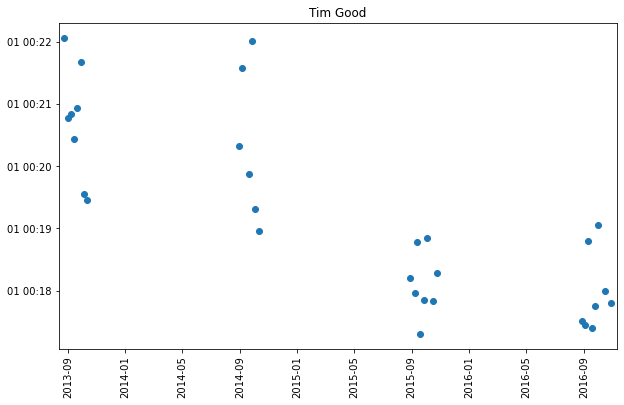

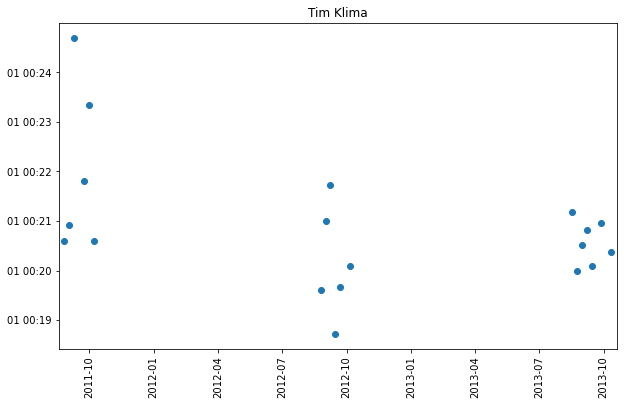

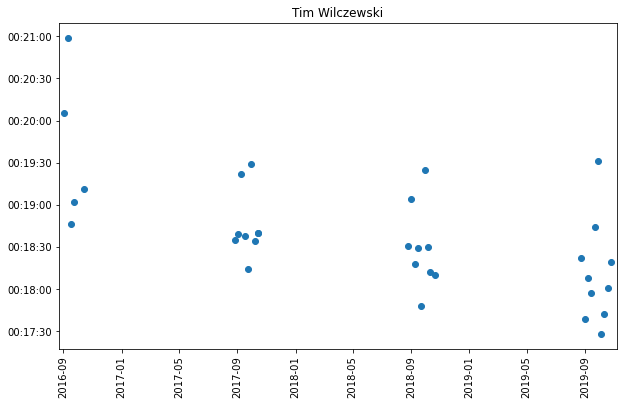

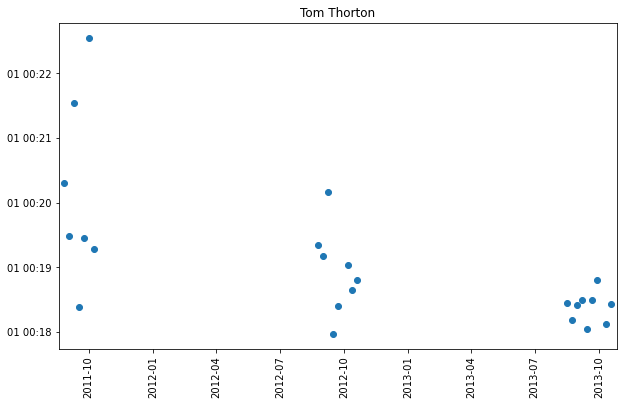

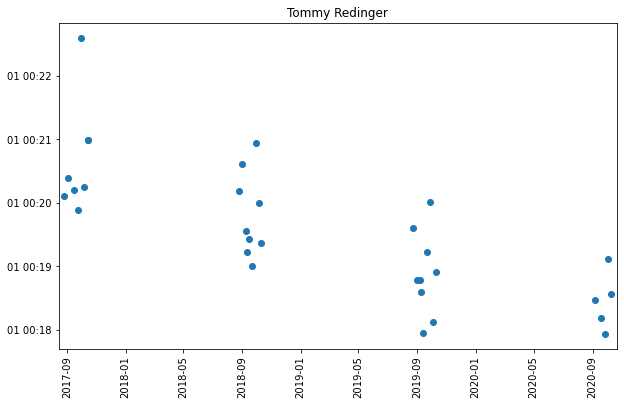

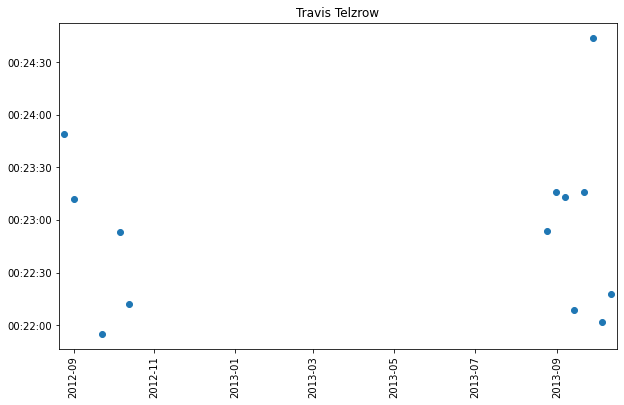

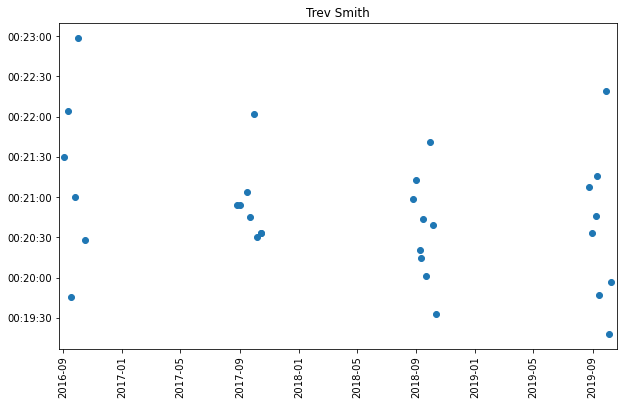

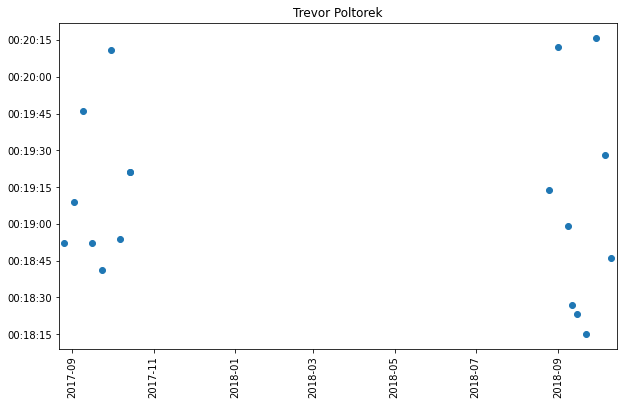

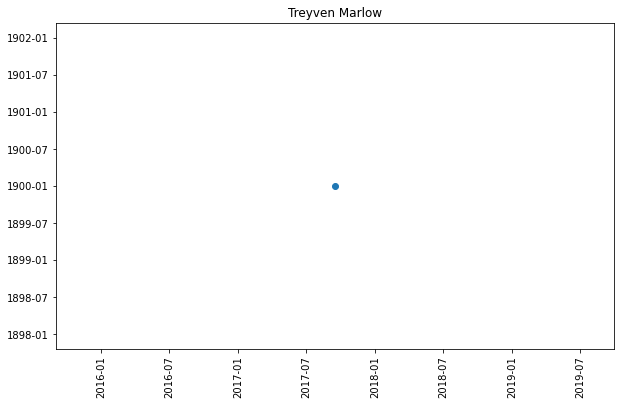

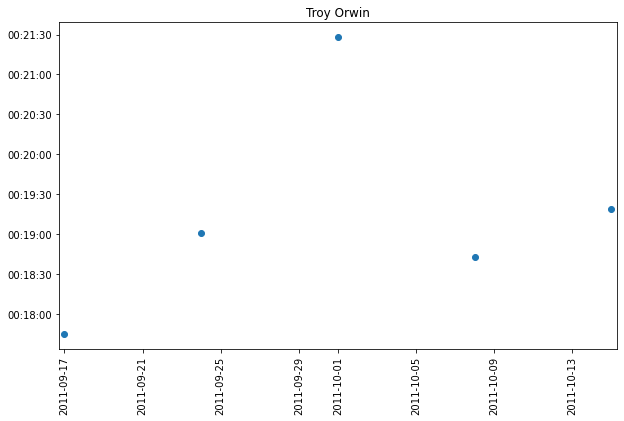

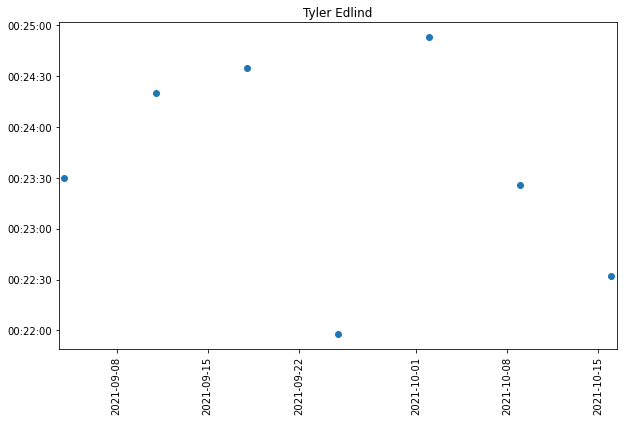

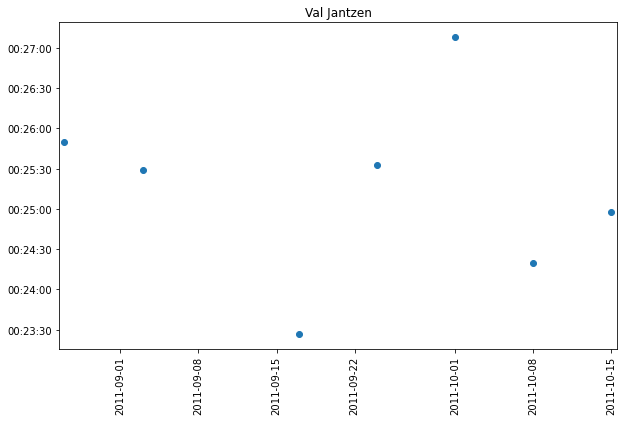

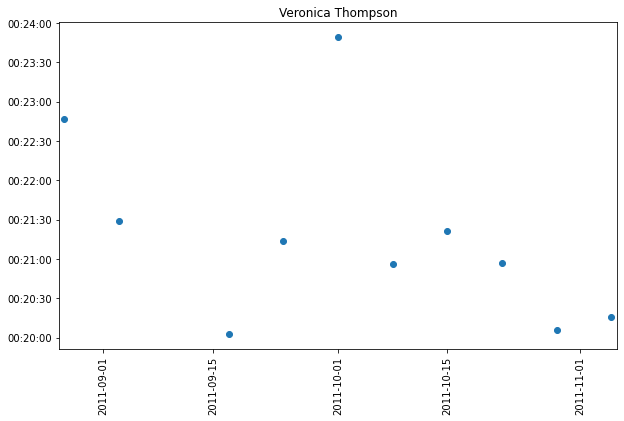

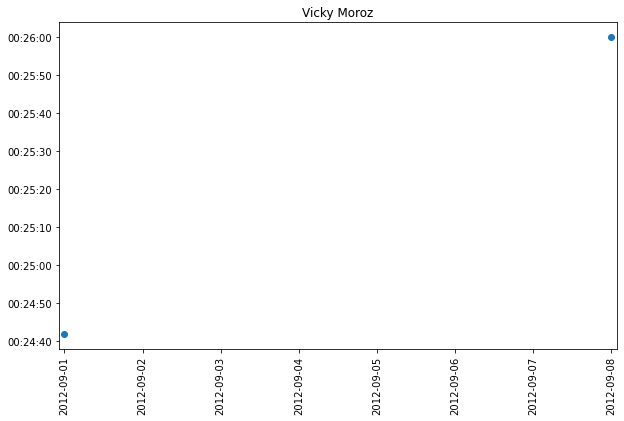

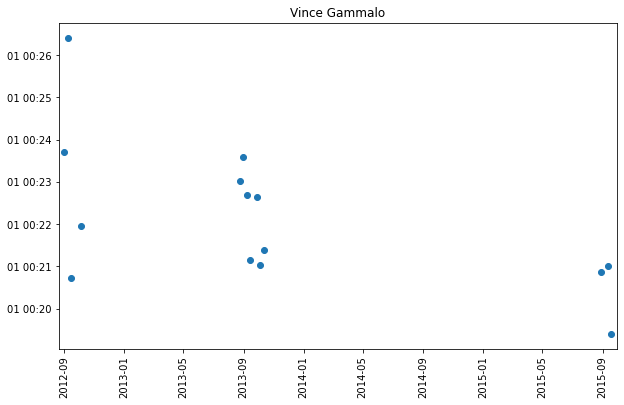

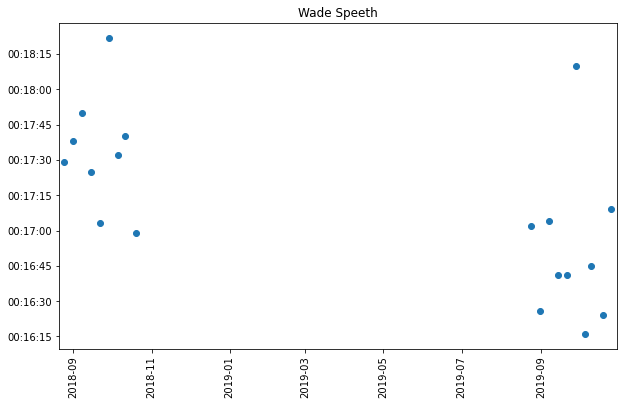

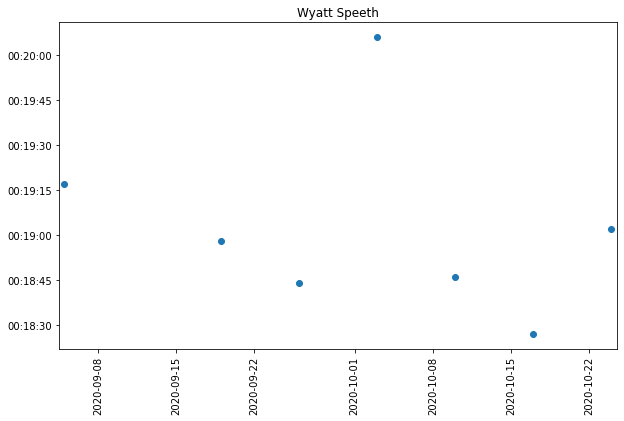

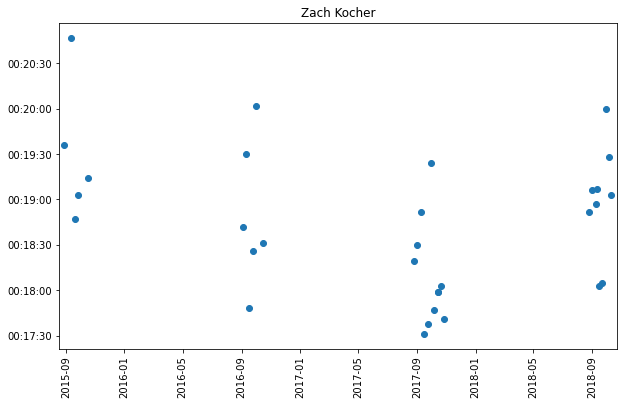

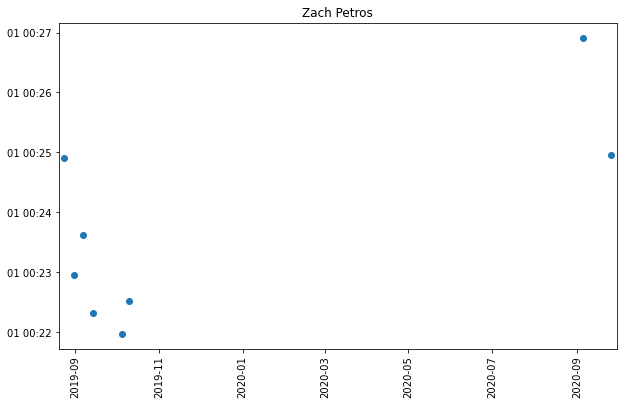

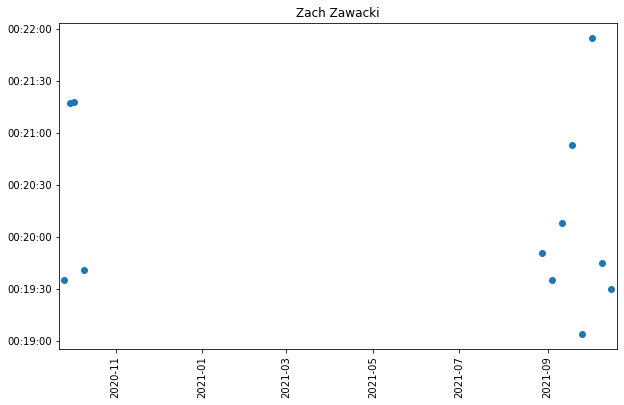

In [311]:
#make the graphs for each athlete
for i in unique_athletes:
    plt.rcParams["figure.figsize"] = (10,6)
    plt.figure()
    aDf = df[df["athlete"] == i]
    plt.title(i)
    plt.margins(x=0.01)
    plt.xticks(rotation='vertical')
    plt.scatter(aDf["date"], aDf["time"])
    

In [162]:
boysDf = df[df["gender"] == "boy"]
girlsDf = df[df["gender"] == "girl"]
unique_dates = []
for i in df["date"]:
    if i not in unique_dates:
        unique_dates.append(i)

In [303]:
#make dataframes for the top nine girls and boys for each race
boysNineDf = pd.DataFrame()
girlsNineDf = pd.DataFrame()

for i in unique_dates:
    newDf = boysDf[boysDf["date"] == i]
    newDf = newDf[:9]
    boysNineDf = boysNineDf.append(newDf)

for i in unique_dates:
    newDf = girlsDf[girlsDf["date"] == i]
    newDf = newDf[:9]
    girlsNineDf = girlsNineDf.append(newDf)

    

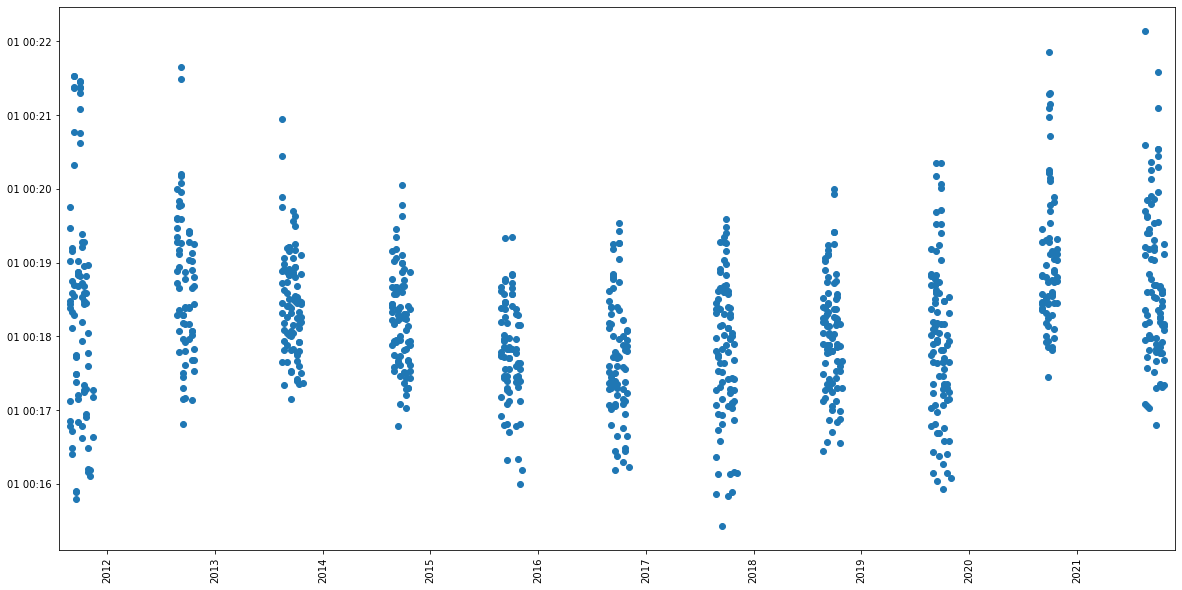

In [249]:
#plot top nine boys
plt.margins(x=0.01)
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = (20,20)
plt.scatter(boysNineDf["date"], boysNineDf["time"])

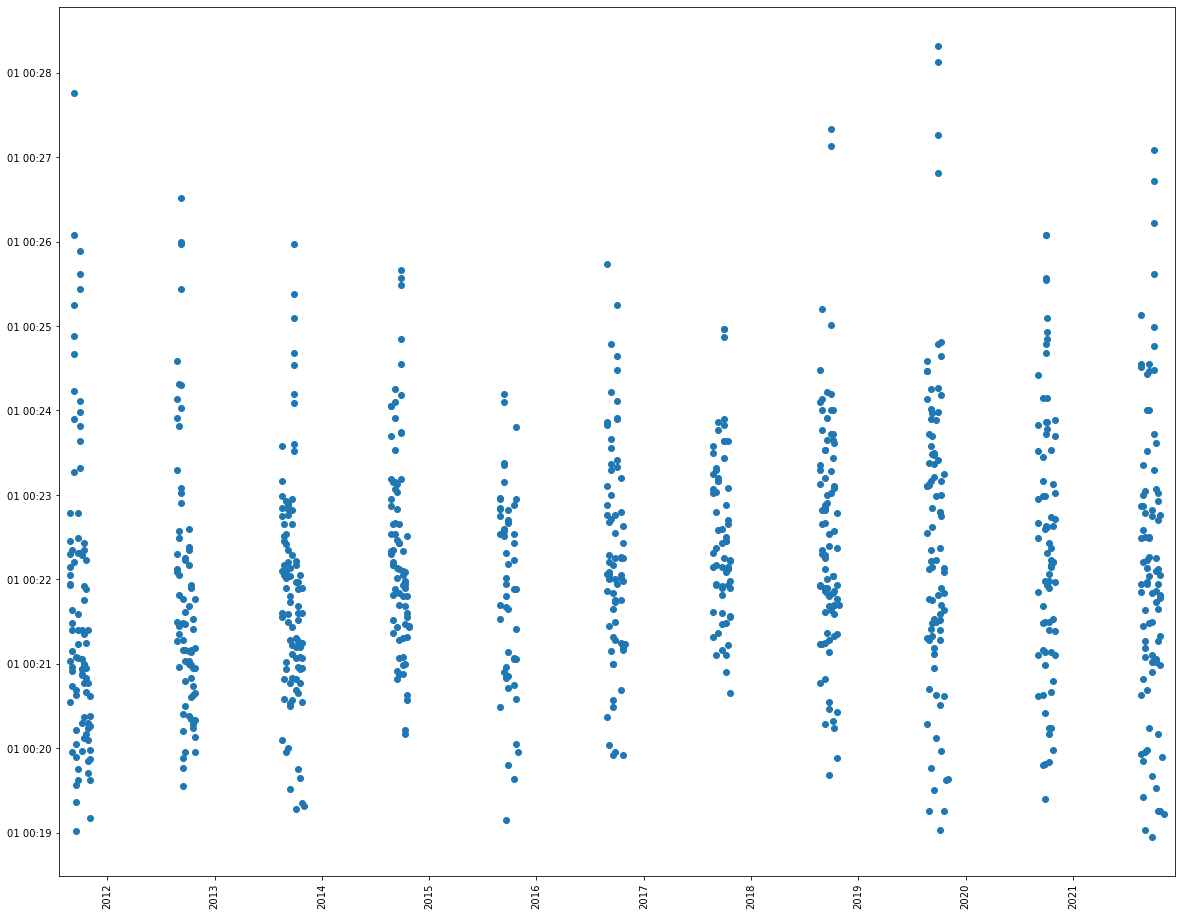

In [306]:
#plot top nine girls
plt.margins(x=0.01)
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(girlsNineDf["date"], girlsNineDf["time"])

In [298]:
av = boysTenDf.groupby(['date']).mean()
plt.rcParams["figure.figsize"] = (20,20)
plt.plot(av)

C:\Users\natha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


NameError: name 'xlt' is not defined

C:\Users\natha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\natha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\natha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, 

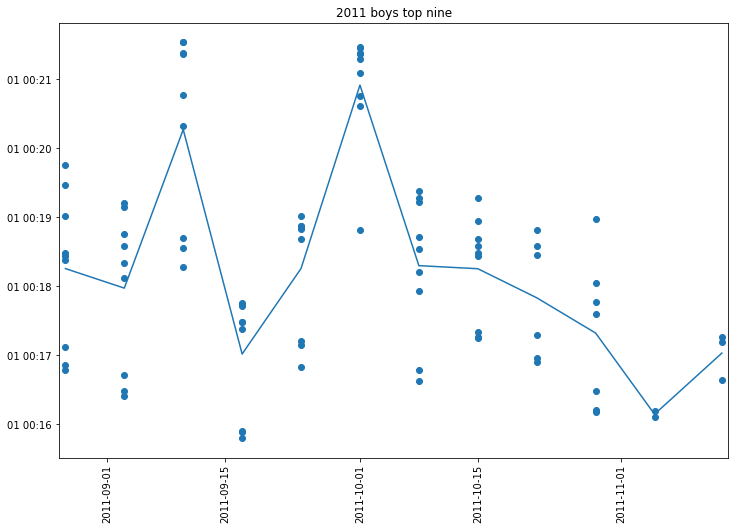

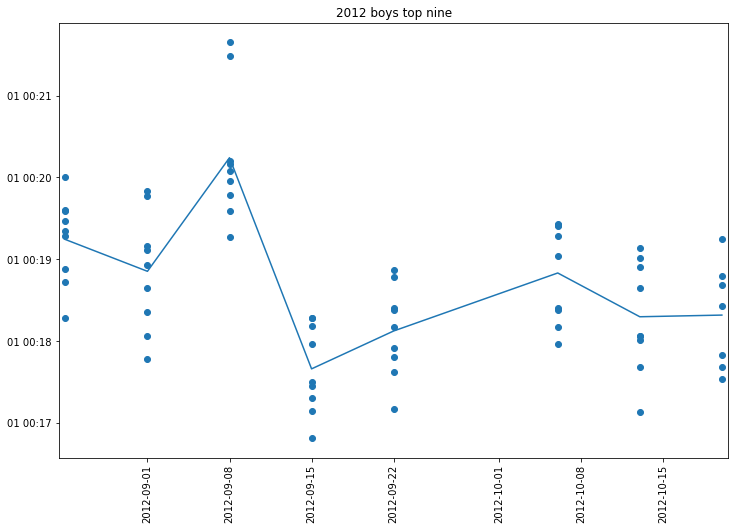

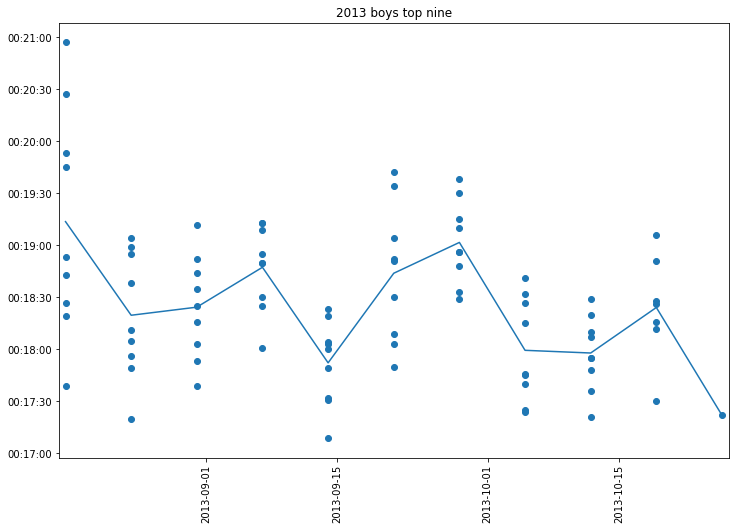

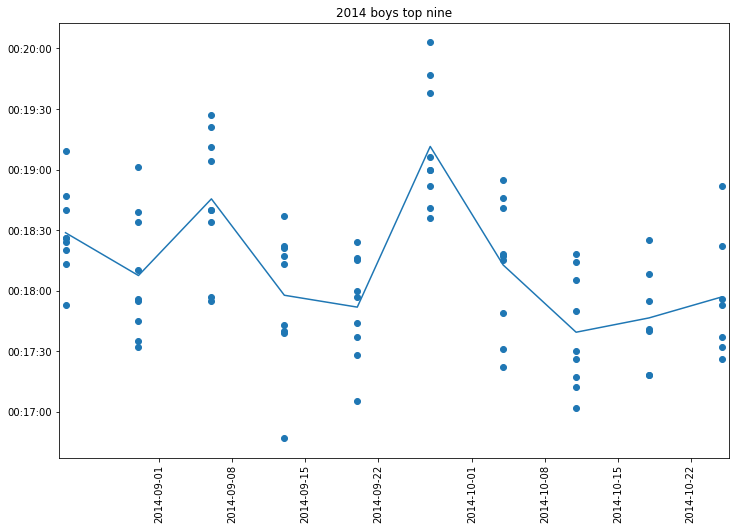

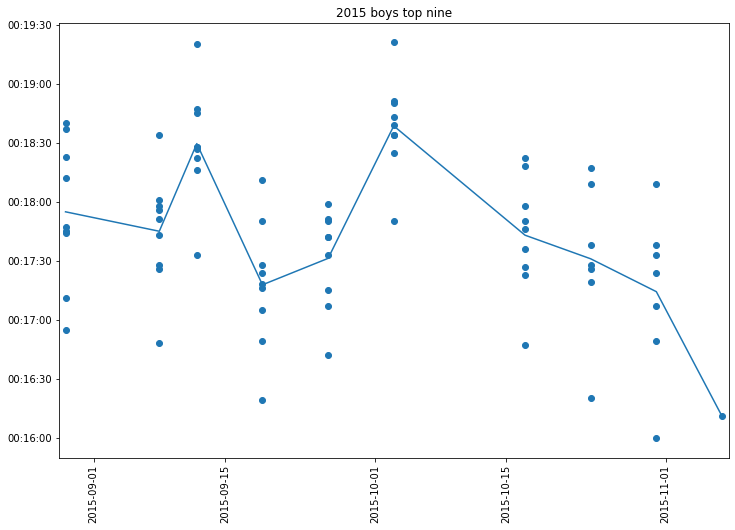

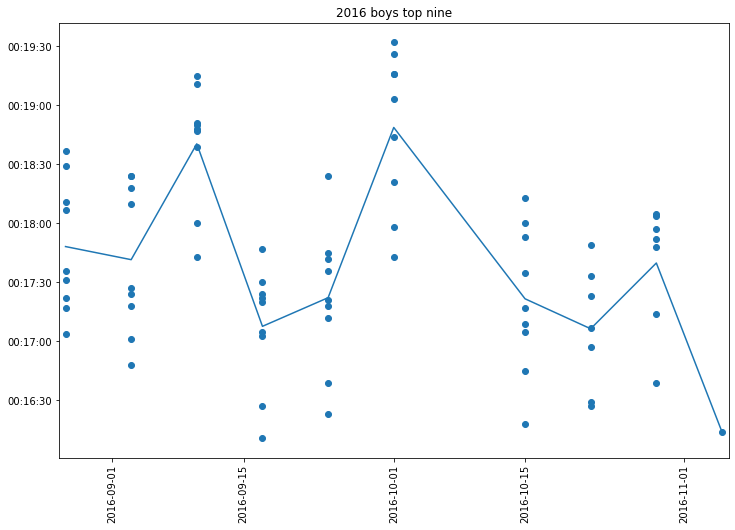

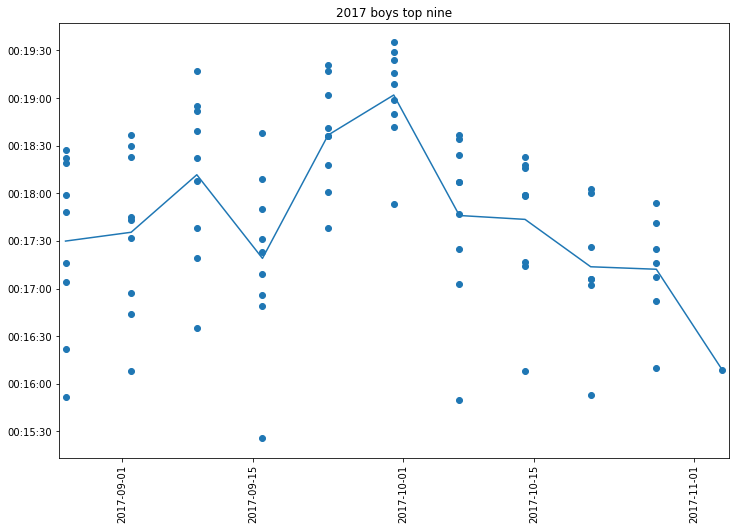

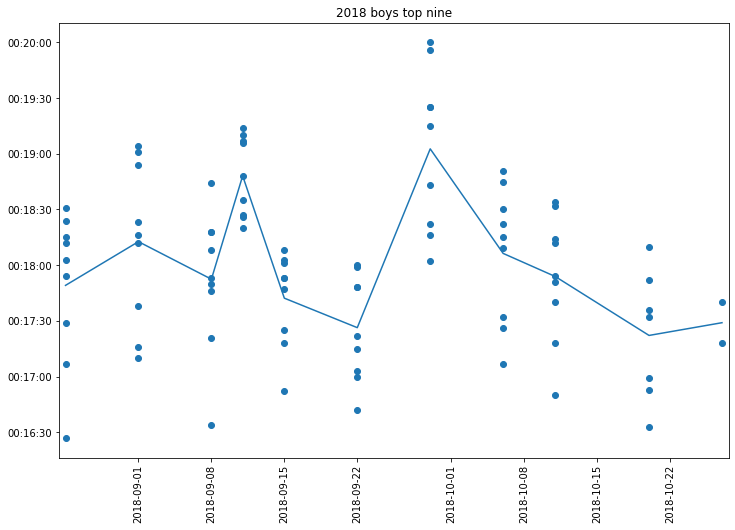

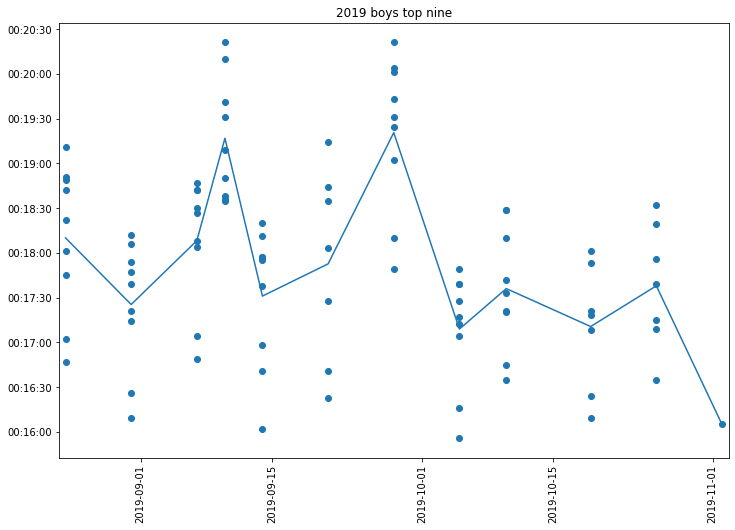

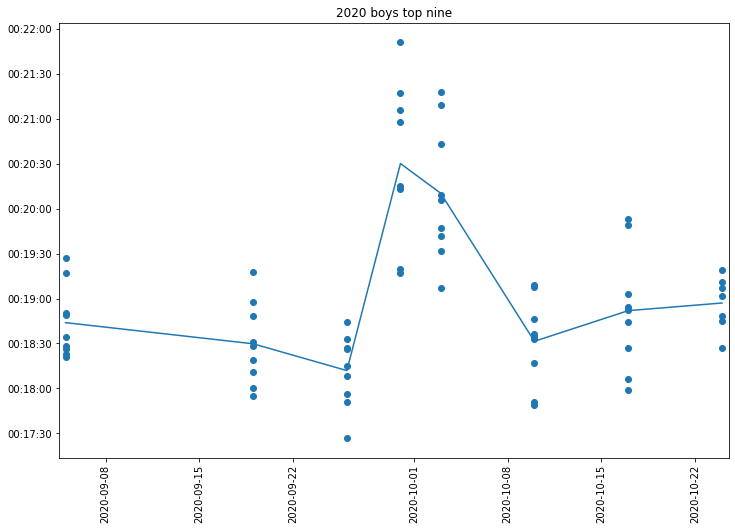

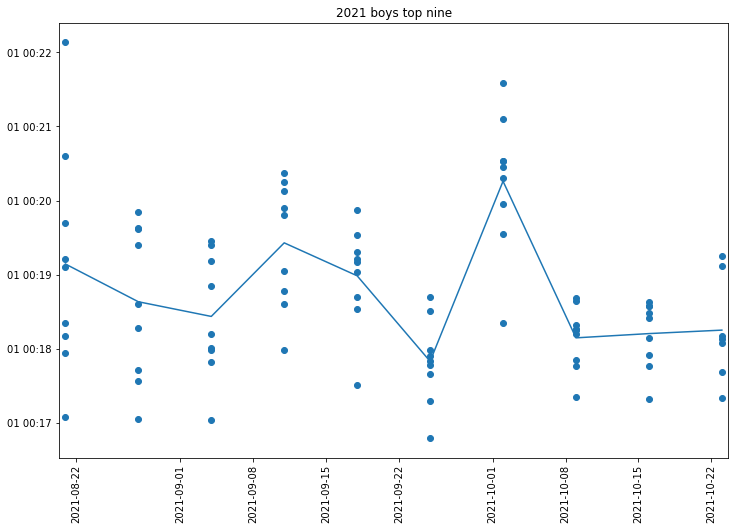

In [317]:
#creates a graph for each year of the top nine boys of each race
boysByYearDf = boysNineDf.groupby(boysNineDf['date'].map(lambda x: x.year))
averageListBoys = []
for i, x in boysByYearDf:
    plt.rcParams["figure.figsize"] = (12,8)
    plt.figure()
    plt.title(str(i) + " boys top nine")
    plt.margins(x=0.01)
    plt.xticks(rotation='vertical')
    plt.scatter(x["date"], x["time"])
    average = x.groupby(['date']).mean()
    averageListBoys.append(average)
    plt.plot(average)



C:\Users\natha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\natha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\natha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, 

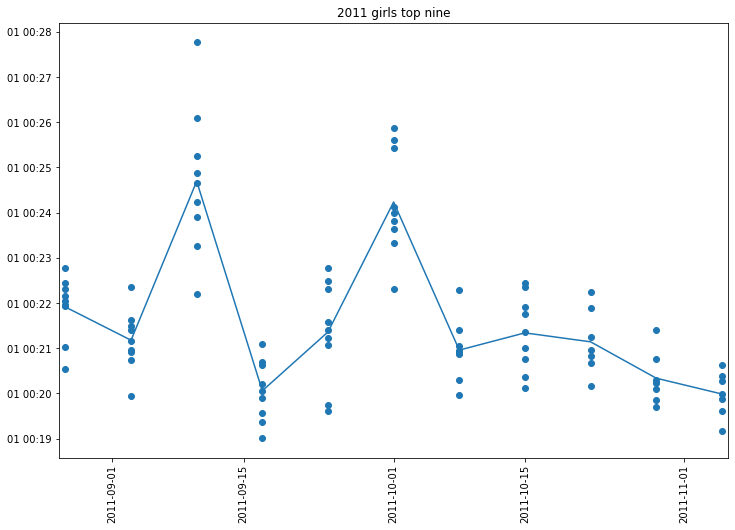

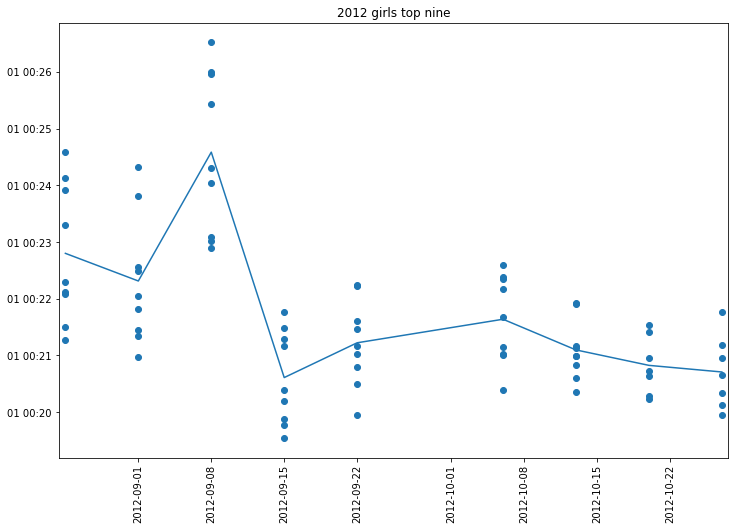

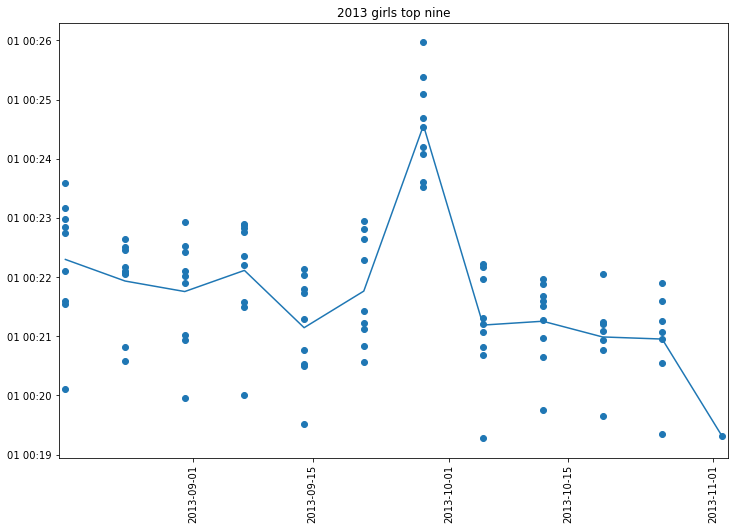

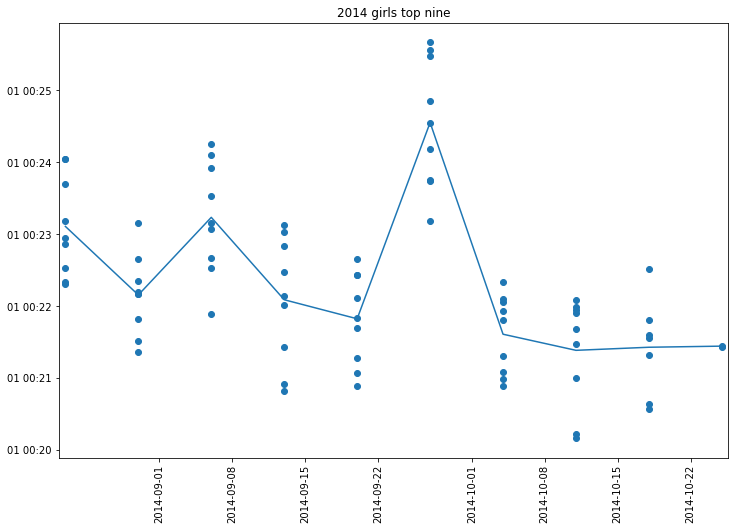

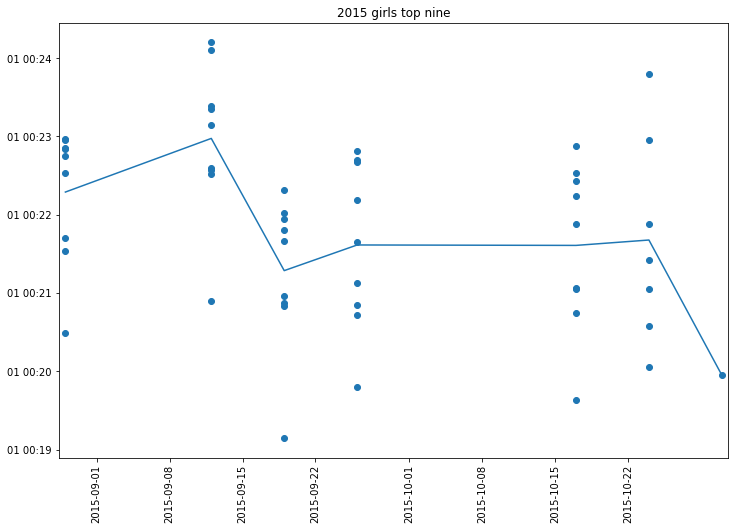

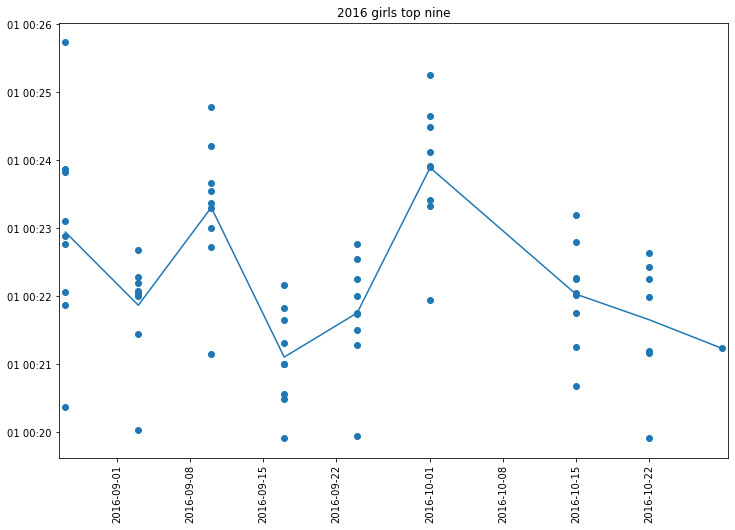

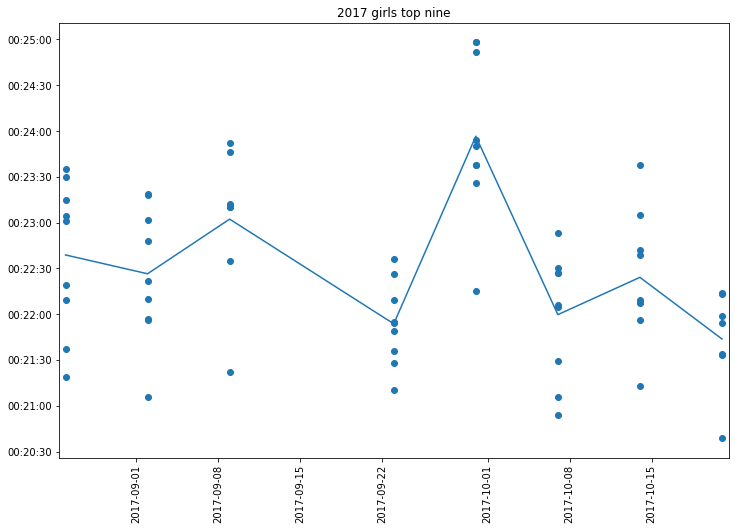

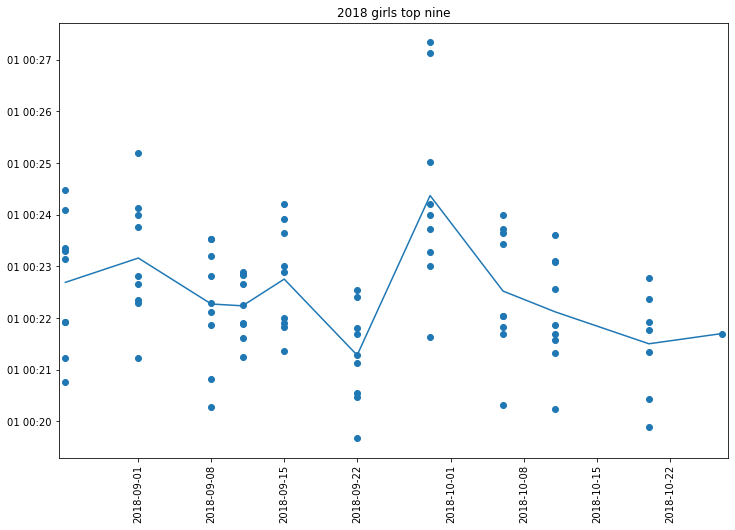

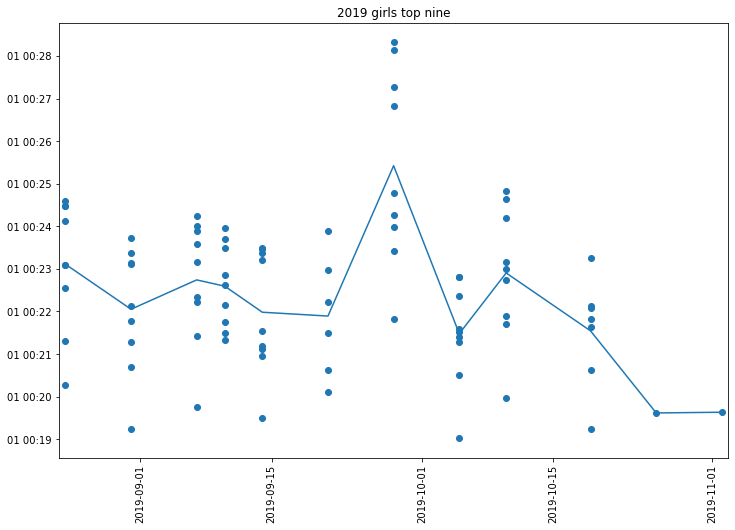

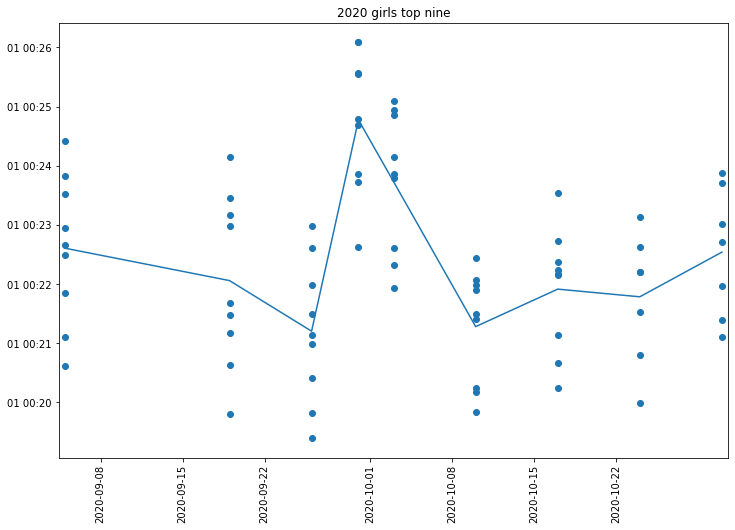

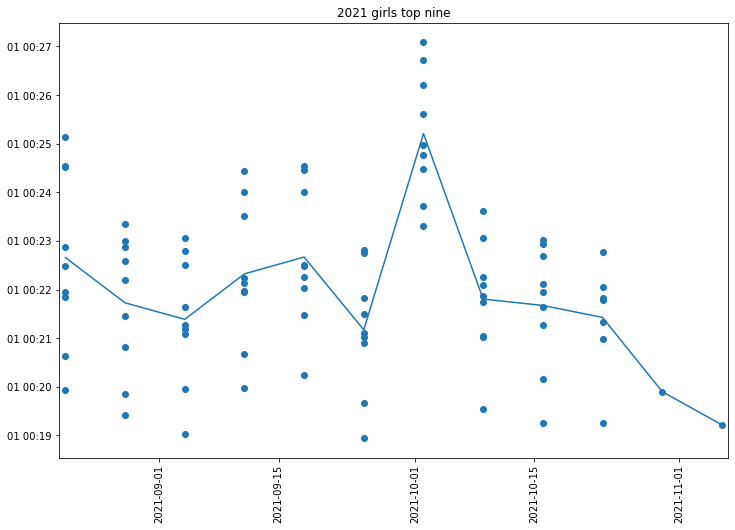

In [315]:
#creates a graph for each year of the top nine boys of each race
girlsByYearDf = girlsNineDf.groupby(girlsNineDf['date'].map(lambda x: x.year))
averageListGirls = []

for i, x in girlsByYearDf:
    plt.rcParams["figure.figsize"] = (12,8)
    plt.figure()
    plt.title(str(i) + " girls top nine")
    plt.margins(x=0.01)
    plt.xticks(rotation='vertical')
    plt.scatter(x["date"], x["time"])
    average = x.groupby(['date']).mean()
    averageListGirls.append(average)
    plt.plot(average)

